# Assessing Avocado Pricing Dynamics Utilizing Climate, Transportation Cost, and Macroeconomic Metrics in California

# Problem Statement:

In recent years, avocados have seen a surge in popularity across social media platforms, leading to an exponential increase in demand and establishing them as one of the most popular fruits globally. Research by Mordor Intelligence (Avocado Market Insights, n.d.) forecasts substantial growth in the avocado market, with the projected market size expected to rise from USD 22.69 billion in 2024 to USD 35.55 billion by 2029. Additionally, the USDA reports annual per capita consumption of avocados exceeding 8 pounds in the North American market, with local production and imports serving as the primary sources of supply (Avocado Market Insights, n.d.).

Given the perishable nature of avocados, maintaining fruit quality heavily depends on a robust supply chain that efficiently manages harvesting, transportation, and distribution processes. As avocado demand continues to escalate, understanding the driving factors behind market expansion becomes imperative.

This project focuses on California, a leading region in both avocado cultivation and consumption, with the specific aim of identifying primary drivers influencing avocado price fluctuations within the state. By analyzing critical components of the avocado supply chain—production, transportation, and consumer behavior—the objective is to develop a robust regression model that not only forecasts future avocado prices but also highlights the importance of each factor influencing these prices. The goal is to achieve a comprehensive understanding of avocado pricing dynamics by incorporating features representing various stages of the supply chain.

### Steps:

1. **Data Collection:**
   - **Production Data:** Collect climatic data from key production regions (Uruapan, Michoacan, Mexico, and Fallbrook, California) from Weather of the World, covering temperature, precipitation, humidity, wind speed, atmospheric pressure, and other relevant factors.
   - **Transportation Cost Data:** Gather energy consumption expenses, including unit prices of electricity, petroleum, and natural gas in California from the U.S. Energy Information Administration (EIA).
   - **Consumer and Economic Data:** Obtain economic variables such as the Consumer Price Index, Personal Consumption Expenditures, Producer Price Index, Inflation Rate, and Unemployment Rate from the Federal Reserve Economic Data (FRED).
   - **Target Variable:** Collect weekly avocado price data for California from the Kaggle dataset "Avocado Prices and Sales Volume 2015-2023."

2. **Data Examination:**
   - Identify and handle missing values and outliers within the dataset.
   - Aggregate data to monthly data points and compute monthly averages for model development.
   - Review correlations between different attributes to understand interdependencies and refine feature selection for model development.

3. **Data Description:**
   - Provide detailed descriptions of the collected data for each component: Avocado Price Data, Plantation Data (Uruapan and Fallbrook), California Energy Data, and Economic Data.

4. **Exploratory Data Analysis (EDA):**
   - **KDE Plots:** Create KDE plots for each attribute to visualize their distributions.
   - **Correlation Analysis:** Generate correlation heatmaps to identify relationships between attributes.
   - **Pairwise Distribution:** Plot pairwise distributions of attributes to examine their interactions.

5. **Model Development:**
   - **Feature Engineering:** Select and engineer relevant features based on EDA findings.
   - **Regression Model:** Develop a regression model to forecast avocado prices, incorporating features representing various stages of the supply chain.

6. **Model Evaluation:**
   - Evaluate the model's performance using appropriate metrics such as RMSE, MAE, and R-squared.
   - Interpret the model to understand the importance of each factor influencing avocado prices.

7. **Conclusion:**
   - Summarize findings and insights derived from the model.
   - Discuss the implications of these findings for avocado pricing dynamics and potential applications in supply chain management.

8. **Report Writing:**
   - Compile the findings, methodologies, and conclusions into a comprehensive project report.
   - Include visualizations, data descriptions, and model interpretations to support the analysis.

By following these steps, the project aims to provide a detailed understanding of the factors driving avocado price fluctuations in California, ultimately aiding in better forecasting and supply chain management strategies.



#  Part I - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
from IPython.core.interactiveshell import InteractiveShell
from statsmodels.tsa.stattools import adfuller


In [2]:
# Setting configurations

# Ignore warnings to avoid cluttering the output
warnings.filterwarnings('ignore')

# Set the plot style to 'ggplot' for aesthetic consistency
plt.style.use('ggplot')

# Configure matplotlib parameters to remove right and top spines, and set figure size
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]

# Set font size for plot labels and titles
rcParams['font.size'] = 16

# Set tick label sizes for both x and y axes
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Set custom color palette for seaborn plots
sns.set_palette(['#74a09e', '#86c1b2', '#98e2c6',
                '#f3c969', '#f2a553', '#d96548', '#c14953'])

# Configure inline figure format for high-resolution displays
%config InlineBackend.figure_format = 'retina'

# Disable Jedi for auto-completion to potentially improve performance in large notebooks
%config Completer.use_jedi = False

# Set maximum column width for pandas DataFrame display
pd.set_option('max_colwidth', 40)

# Display all columns of pandas DataFrames without truncation
pd.options.display.max_columns = None

# Allow all expressions to produce multiple outputs in IPython shell
InteractiveShell.ast_node_interactivity = 'all'

# Set random seed for reproducibility in random number generation
np.random.seed(42)


In [3]:
# Loading Data
input_data = pd.read_excel('Data_project.xls')
input_data.head()


Year_Month  Year  Month  Is_Organic  Unemployment_Level  \
0      201501  2015      1           0                8885   
1      201501  2015      1           1                8885   
2      201502  2015      2           0                8599   
3      201502  2015      2           1                8599   
4      201503  2015      3           0                8515   

   Unemployment_Level_Lead2  Unemployment_Rate  Unemployment_Rate_Lead2  \
0                      9090                5.7                      5.8   
1                      9090                5.7                      5.8   
2                      8717                5.5                      5.6   
3                      8717                5.5                      5.6   
4                      8885                5.4                      5.7   

   Median_Consumer_Price_Index  Median_Consumer_Price_Index_Lead2  \
0                     1.947530                           2.256311   
1                     1.947530                           2.256311   
2                     1.954495                           2.383394   
3                     1.954495                           2.383394   
4                     2.433336                           1.947530   

   Personal_Consumption_Expenditures  Personal_Consumption_Expenditures_Lead2  \
0                            12066.7                                  12083.9   
1                            12066.7                                  12083.9   
2                            12116.6                                  12096.1   
3                            12116.6                                  12096.1   
4                            12176.1                                  12066.7   

   Number_Unemployed_for_27_Weeks_&_over  \
0                                   2774   
1                                   2774   
2                                   2658   
3                                   2658   
4                                   2542   

   Number_Unemployed_for_27_Weeks_&_over_Lead2  \
0                                     2828       
1                                     2828       
2                                     2799       
3                                     2799       
4                                     2774       

   Average_Hourly_Earnings_of_All_Employees  \
0                                    24.75    
1                                    24.75    
2                                    24.79    
3                                    24.79    
4                                    24.86    

   Average_Hourly_Earnings_of_All_Employees_Lead2  \
0                                    24.66          
1                                    24.66          
2                                    24.62          
3                                    24.62          
4                                    24.75          

   Federal_Funds_Effective_Rate  Federal_Funds_Effective_Rate_Lead2  \
0                          0.11                                0.09   
1                          0.11                                0.09   
2                          0.11                                0.12   
3                          0.11                                0.12   
4                          0.11                                0.11   

   Employed_Persons_in_California  Employed_Persons_in_California_Lead2  \
0                        17513360                              17451977   
1                        17513360                              17451977   
2                        17539526                              17484592   
3                        17539526                              17484592   
4                        17566611                              17513360   

   Labor_Force_Participation_Rate_for_California  \
0                                     62.3         
1                                     62.3         
2                                     62.3         
3                      

In [4]:
input_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year_Month                                           216 non-null    int64  
 1   Year                                                 216 non-null    int64  
 2   Month                                                216 non-null    int64  
 3   Is_Organic                                           216 non-null    int64  
 4   Unemployment_Level                                   216 non-null    int64  
 5   Unemployment_Level_Lead2                             216 non-null    int64  
 6   Unemployment_Rate                                    216 non-null    float64
 7   Unemployment_Rate_Lead2                              216 non-null    float64
 8   Median_Consumer_Price_Index                          216 non-null    f

In [5]:
input_data.isnull().sum()


Year_Month                                             0
Year                                                   0
Month                                                  0
Is_Organic                                             0
Unemployment_Level                                     0
Unemployment_Level_Lead2                               0
Unemployment_Rate                                      0
Unemployment_Rate_Lead2                                0
Median_Consumer_Price_Index                            0
Median_Consumer_Price_Index_Lead2                      0
Personal_Consumption_Expenditures                      0
Personal_Consumption_Expenditures_Lead2                0
Number_Unemployed_for_27_Weeks_&_over                  0
Number_Unemployed_for_27_Weeks_&_over_Lead2            0
Average_Hourly_Earnings_of_All_Employees               0
Average_Hourly_Earnings_of_All_Employees_Lead2         0
Federal_Funds_Effective_Rate                           0
Federal_Funds_Effective_Rate_Le

In [6]:
input_data['Is_Organic'].value_counts()


Is_Organic
0    108
1    108
Name: count, dtype: int64

In [7]:
print(f"total numbers of Months: {len(input_data['Year_Month'].unique())}")
input_data['Year_Month'].unique()


total numbers of Months: 108


array([201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508,
       201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604,
       201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612,
       201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204,
       202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212,
       202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308,
       202309, 202310, 202311, 202312])

In [8]:
input_data.columns


Index(['Year_Month', 'Year', 'Month', 'Is_Organic', 'Unemployment_Level',
       'Unemployment_Level_Lead2', 'Unemployment_Rate',
       'Unemployment_Rate_Lead2', 'Median_Consumer_Price_Index',
       'Median_Consumer_Price_Index_Lead2',
       'Personal_Consumption_Expenditures',
       'Personal_Consumption_Expenditures_Lead2',
       'Number_Unemployed_for_27_Weeks_&_over',
       'Number_Unemployed_for_27_Weeks_&_over_Lead2',
       'Average_Hourly_Earnings_of_All_Employees',
       'Average_Hourly_Earnings_of_All_Employees_Lead2',
       'Federal_Funds_Effective_Rate', 'Federal_Funds_Effective_Rate_Lead2',
       'Employed_Persons_in_California',
       'Employed_Persons_in_California_Lead2',
       'Labor_Force_Participation_Rate_for_California',
       'Labor_Force_Participation_Rate_for_California_Lead2',
       'California_Gas_Price', 'California_NG_Price',
       'California_Electricity_Price', 'Temperature_Uruapan',
       'Sea_Level_Pressure_Uruapan', 'Humidity_Uruapan', '

In [9]:
# Column Groups
avocado_col = ['Year', 'Month', 'Is_Organic',
               'Avocado_Volume', 'Avocado_Price']
eco_cols = [
    'Unemployment_Level', 'Unemployment_Rate', 'Median_Consumer_Price_Index',
    'Personal_Consumption_Expenditures', 'Number_Unemployed_for_27_Weeks_&_over',
    'Average_Hourly_Earnings_of_All_Employees', 'Federal_Funds_Effective_Rate',
    'Employed_Persons_in_California', 'Labor_Force_Participation_Rate_for_California'
]
eco_lead2_cols = [
    'Unemployment_Level_Lead2', 'Unemployment_Rate_Lead2', 'Median_Consumer_Price_Index_Lead2',
    'Personal_Consumption_Expenditures_Lead2', 'Number_Unemployed_for_27_Weeks_&_over_Lead2',
    'Average_Hourly_Earnings_of_All_Employees_Lead2', 'Federal_Funds_Effective_Rate_Lead2',
    'Employed_Persons_in_California_Lead2', 'Labor_Force_Participation_Rate_for_California_Lead2'
]
weather_fallbrook = [
    'Temperature_Fallbrook', 'Sea_Level_Pressure_Fallbrook', 'Humidity_Fallbrook',
    'Wind_Speed_Fallbrook', 'Visibility_Fallbrook', 'Dew_point_temperature_Fallbrook'
]
weather_uruapan = [
    'Temperature_Uruapan', 'Sea_Level_Pressure_Uruapan', 'Humidity_Uruapan',
    'Wind_Speed_Uruapan', 'Visibility_Uruapan', 'Dew_point_temperature_Uruapan'
]
ca_energy = ['California_Gas_Price',
             'California_NG_Price', 'California_Electricity_Price']


# Avocado Price Data

In [10]:
# Descriptive Statistics for Avocado Data
with pd.option_context('float_format', '{:f}'.format):
    input_data[avocado_col].describe().T


count           mean            std          min  \
Year           216.000000    2019.000000       2.587987  2015.000000   
Month          216.000000       6.500000       3.460071     1.000000   
Is_Organic     216.000000       0.500000       0.501161     0.000000   
Avocado_Volume 216.000000 3036990.358403 2852572.101494 82368.292500   
Avocado_Price  216.000000       1.509203       0.355675     0.825000   

                         25%            50%            75%            max  
Year             2017.000000    2019.000000    2021.000000    2023.000000  
Month               3.750000       6.500000       9.250000      12.000000  
Is_Organic          0.000000       0.500000       1.000000       1.000000  
Avocado_Volume 222202.941875 2169131.171000 5841954.779500 7653057.877500  
Avocado_Price       1.223255       1.481788       1.790987       2.325000

In [11]:
# Preparing Avocado Price Data
input_data_price = input_data[['Year_Month',
                               'Is_Organic', 'Avocado_Price']].copy()
input_data_price['Type'] = np.where(
    input_data_price['Is_Organic'] == 0, 'Conventional', 'Organic')
input_data_price['date_column'] = pd.to_datetime(
    input_data_price['Year_Month'], format='%Y%m')


<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='date_column', ylabel='Avocado_Price'>

Text(0.5, 1.0, '\nAvocado Price Overtime: Organic & Conventional\n')

Text(0.5, 0, 'Year_Month')

Text(0, 0.5, 'Price')

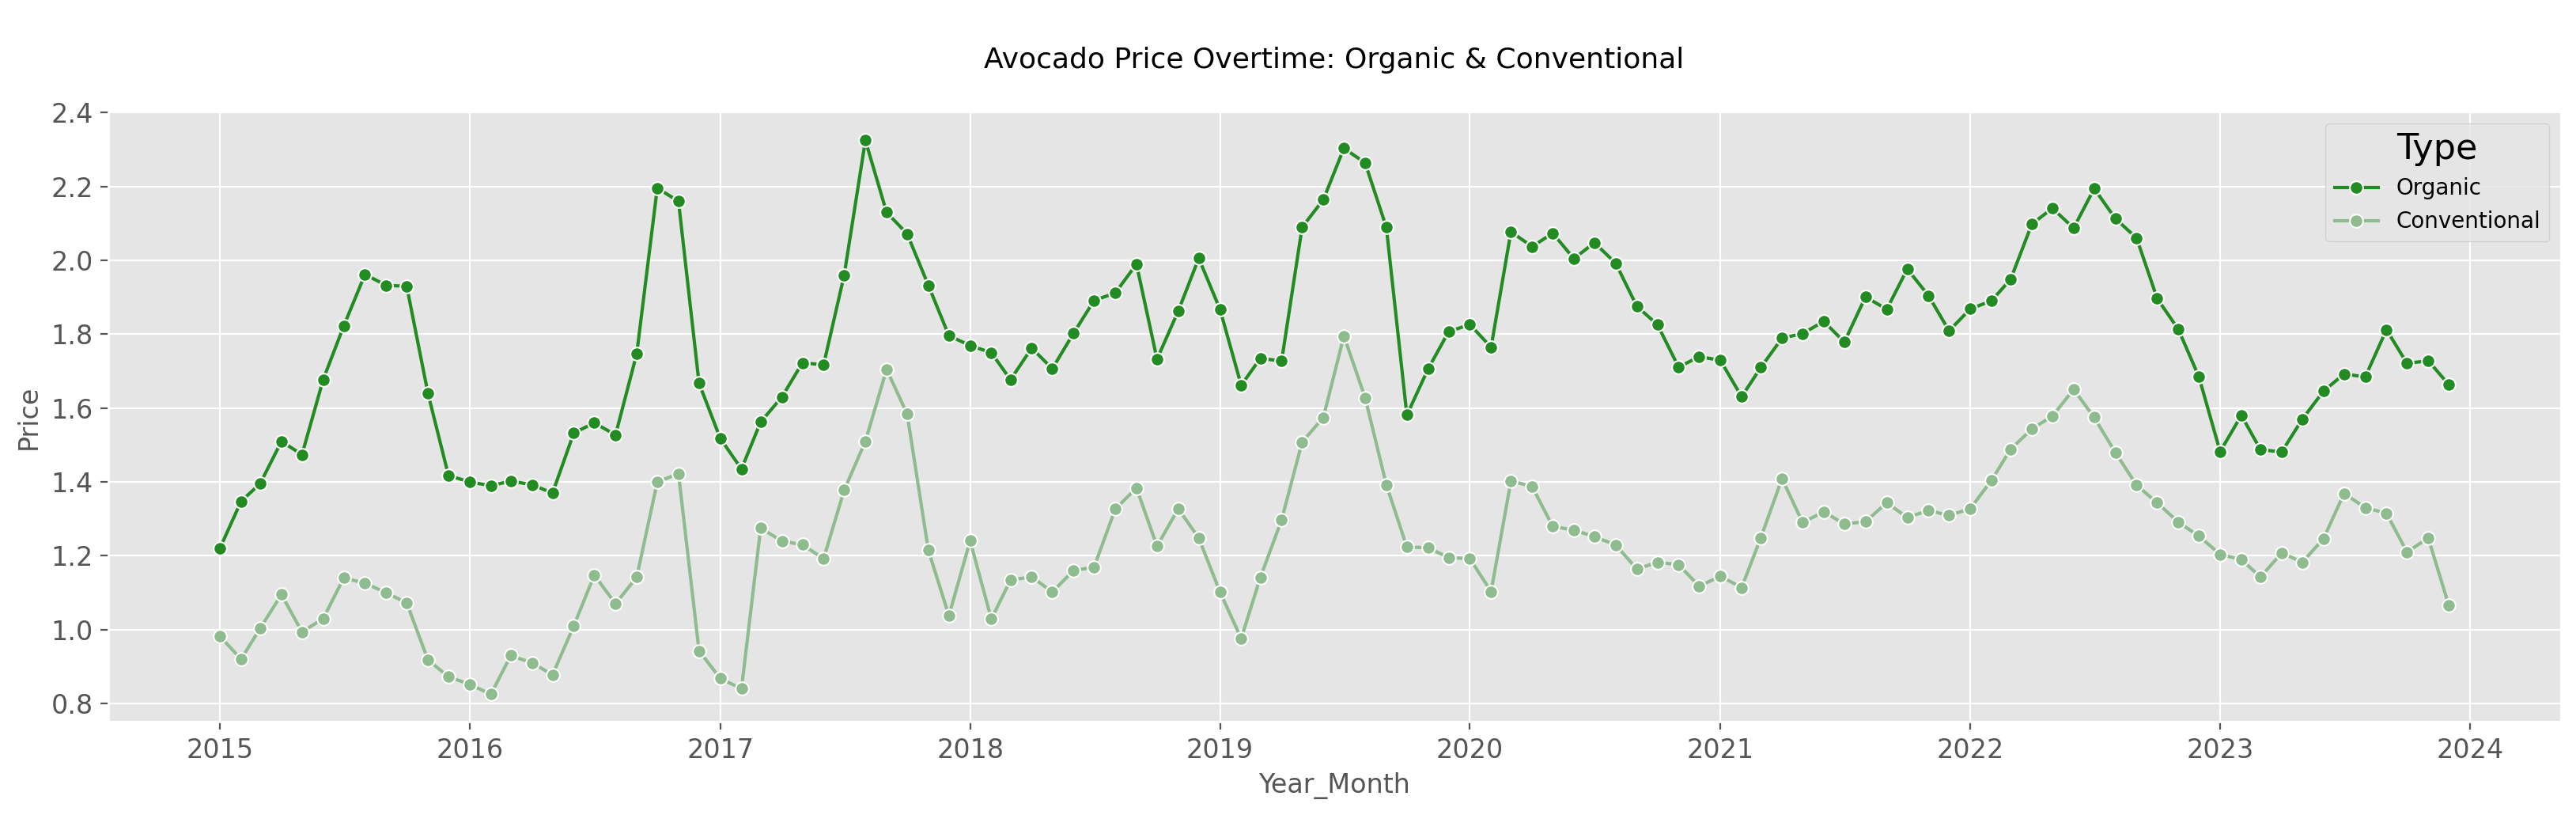

In [12]:
# Plotting Avocado Prices Over Time
plt.figure(figsize=(20, 5))
sns.lineplot(
    x='date_column', y='Avocado_Price', data=input_data_price, hue='Type',
    marker='o', palette={'Organic': 'forestgreen', 'Conventional': 'darkseagreen'},
    hue_order=['Organic', 'Conventional']
)
plt.title('\nAvocado Price Overtime: Organic & Conventional\n', fontsize=13)
plt.xlabel('Year_Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Type', fontsize=10)
plt.show()


In [13]:
# ADF Test
result = adfuller(input_data_price['Avocado_Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -3.0788845531376032
p-value: 0.028155805053984274


# Economic Data

In [14]:
# Descriptive Statistics for Economic Data
with pd.option_context('float_format', '{:f}'.format):
    input_data[eco_cols].describe().T


count            mean  \
Unemployment_Level                       216.000000     7666.101852   
Unemployment_Rate                        216.000000        4.752778   
Median_Consumer_Price_Index              216.000000        3.436477   
Personal_Consumption_Expenditures        216.000000    14777.619444   
Number_Unemployed_for_27_Weeks_&_over    216.000000     1828.305556   
Average_Hourly_Earnings_of_All_Employees 216.000000       28.668981   
Federal_Funds_Effective_Rate             216.000000        1.409167   
Employed_Persons_in_California           216.000000 18030973.333333   
Labor_Force_Participation_Rate_for_Ca... 216.000000       61.912037   

                                                   std             min  \
Unemployment_Level                         2812.828794     5698.000000   
Unemployment_Rate                             1.808068        3.400000   
Median_Consumer_Price_Index                   1.710645        1.092895   
Personal_Consumption_Expenditures          2070.833871    12066.700000   
Number_Unemployed_for_27_Weeks_&_over       808.172057      965.000000   
Average_Hourly_Earnings_of_All_Employees      2.887263       24.750000   
Federal_Funds_Effective_Rate                  1.572856        0.050000   
Employed_Persons_in_California           602621.626383 15643297.000000   
Labor_Force_Participation_Rate_for_Ca...      0.665945       59.600000   

                                                     25%             50%  \
Unemployment_Level                           6070.000000     6753.500000   
Unemployment_Rate                               3.700000        4.200000   
Median_Consumer_Price_Index                     2.293325        2.897937   
Personal_Consumption_Expenditures           13127.025000    14201.500000   
Number_Unemployed_for_27_Weeks_&_over        1262.250000     1553.500000   
Average_Hourly_Earnings_of_All_Employees       26.155000       27.985000   
Federal_Funds_Effective_Rate                    0.120000        0.845000   
Employed_Persons_in_California           17752987.000000 18286905.500000   
Labor_Force_Participation_Rate_for_Ca...       61.800000       62.100000   

                                                     75%             max  
Unemployment_Level                           7968.750000    23090.000000  
Unemployment_Rate                               5.025000       14.800000  
Median_Consumer_Price_Index                     4.134864        8.048036  
Personal_Consumption_Expenditures           16452.625000    19013.700000  
Number_Unemployed_for_27_Weeks_&_over        2127.000000     4174.000000  
Average_Hourly_Earnings_of_All_Employees       31.000000       34.340000  
Federal_Funds_Effective_Rate                    2.145000        5.330000  
Employed_Persons_in_California           18419367.500000 18732265.000000  
Labor_Force_Participation_Rate_for_Ca...       62.300000       63.000000

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '\nCorrelation Heatmap of Economic Factors\n')

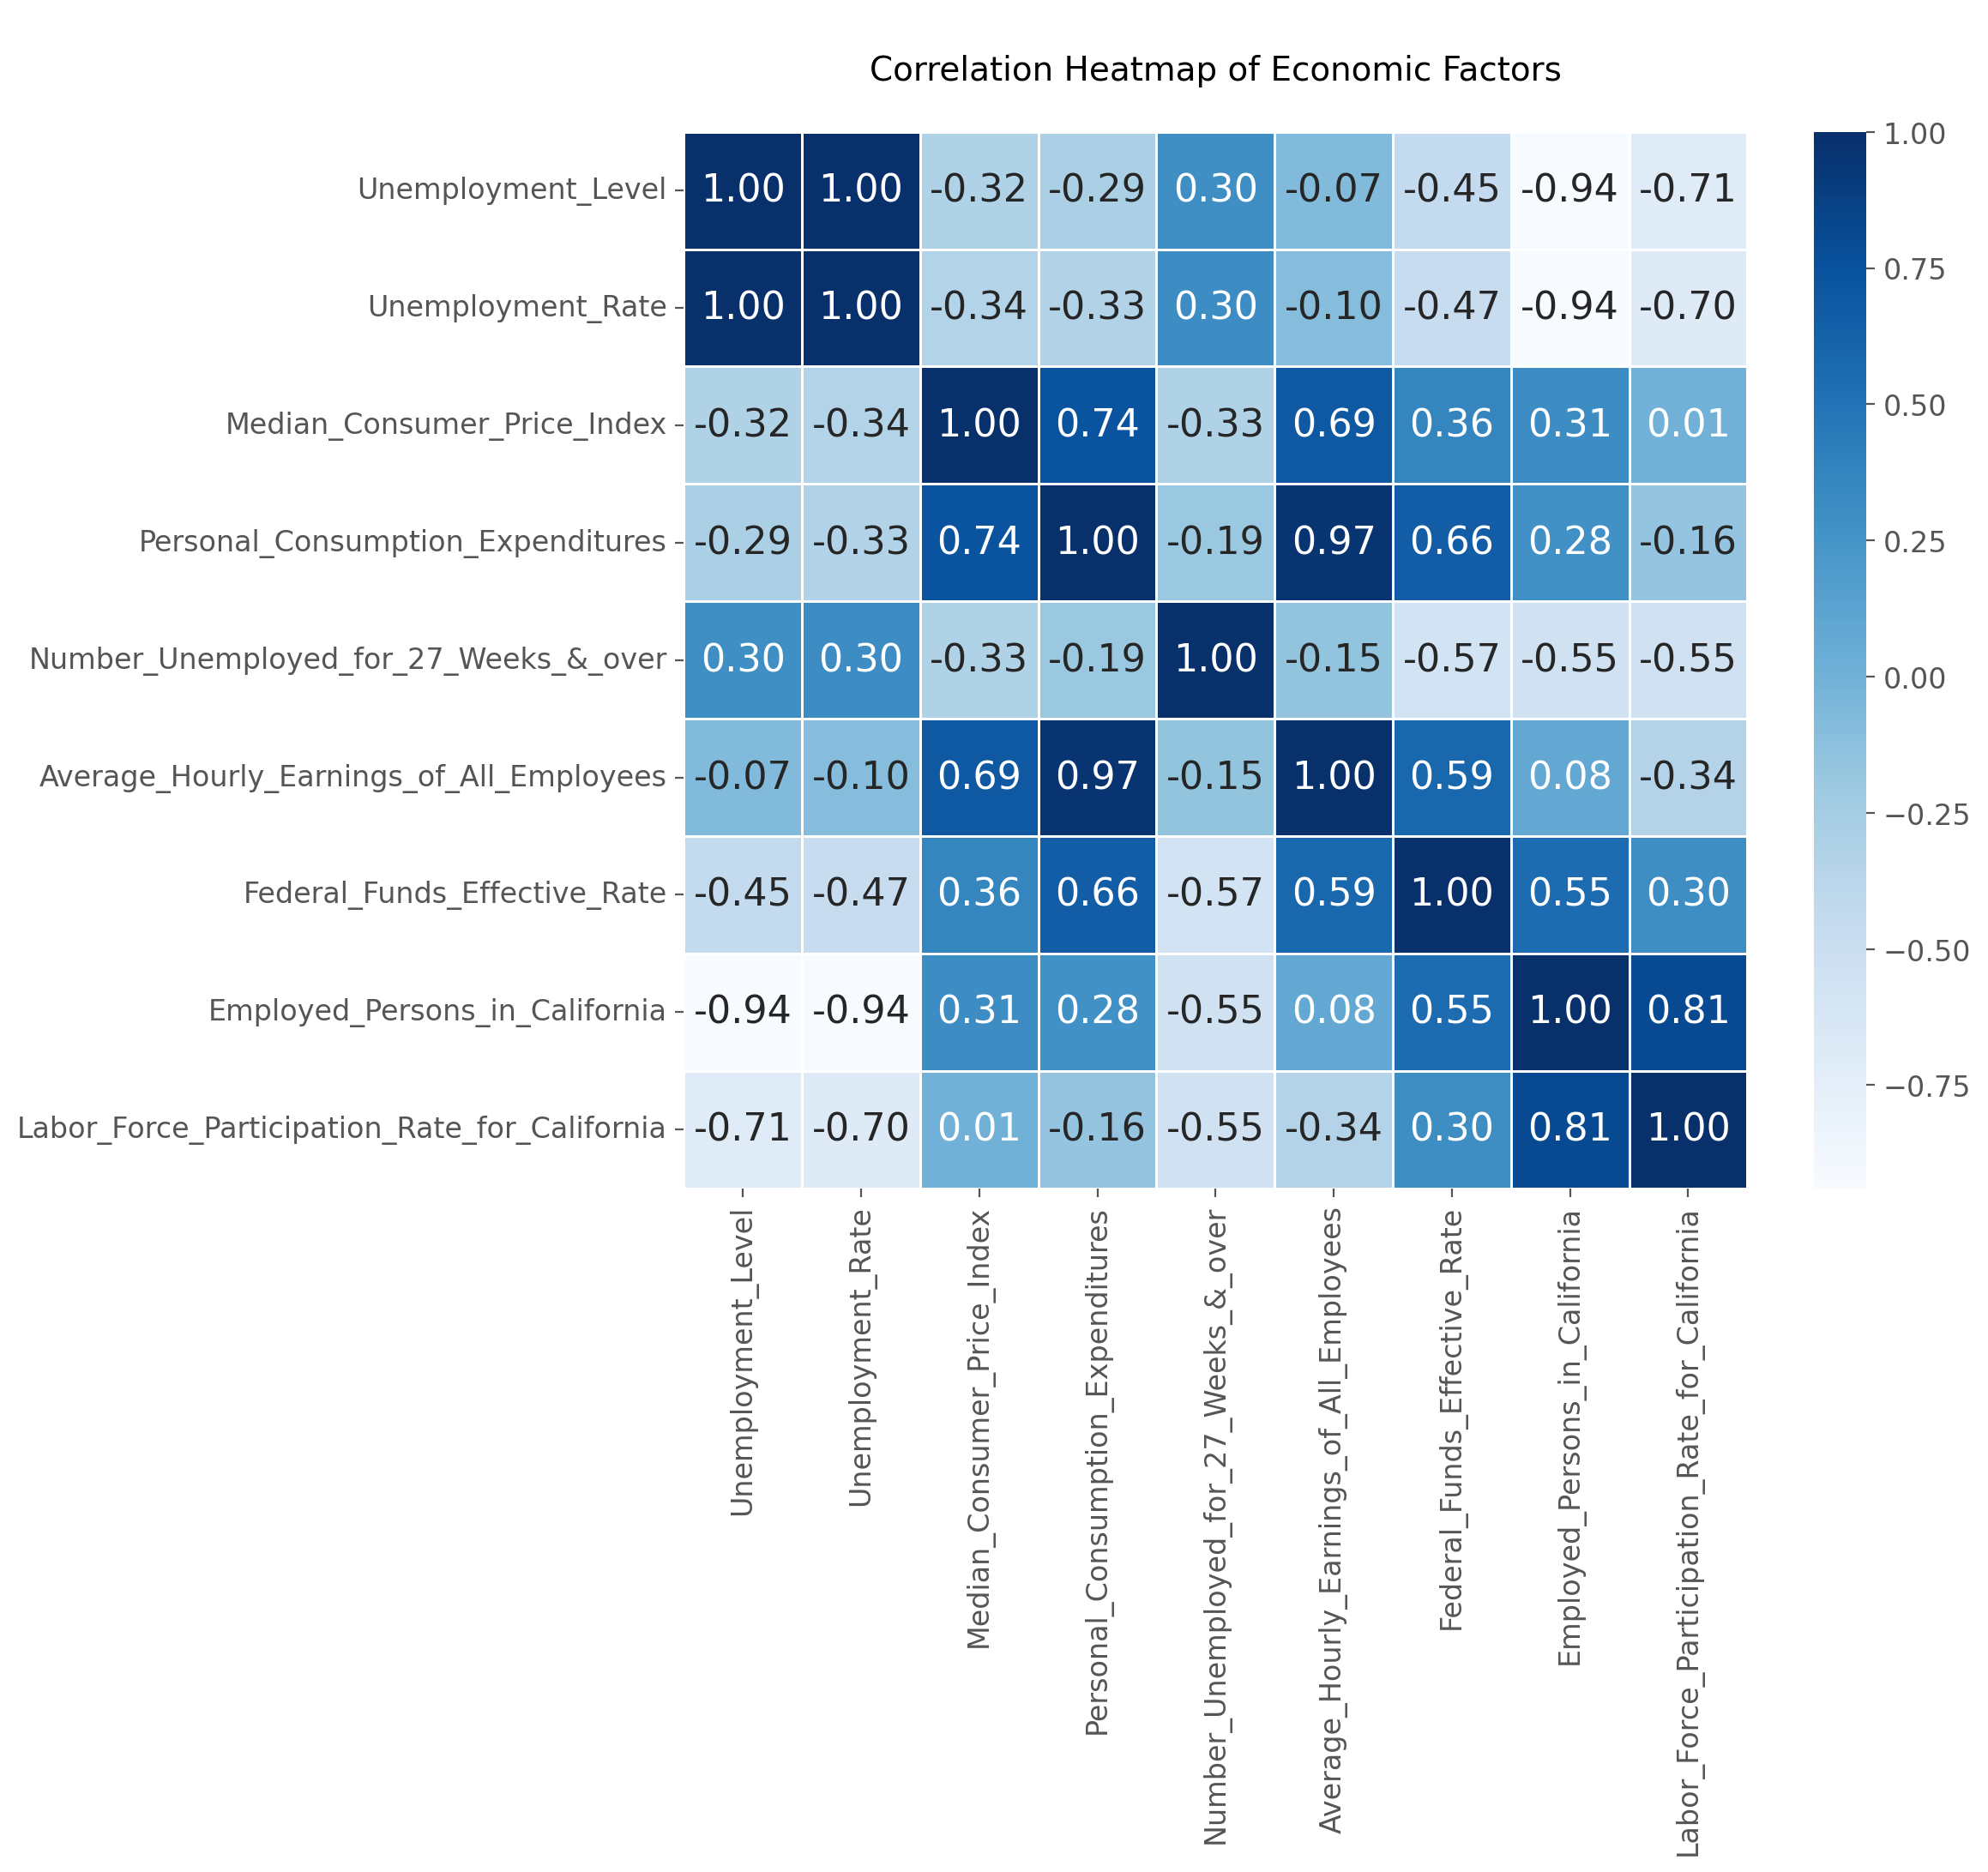

In [15]:
# Correlation Heatmap for Economic Data
plt.figure(figsize=(10, 8))
sns.heatmap(input_data[eco_cols].corr(), annot=True,
            cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('\nCorrelation Heatmap of Economic Factors\n', fontsize=14)
plt.show()


In [16]:
# KDE Plots for Economic Data
eco_cols_new = [
    'Unemployment_Rate', 'Median_Consumer_Price_Index', 'Personal_Consumption_Expenditures',
    'Number_Unemployed_for_27_Weeks_&_over', 'Federal_Funds_Effective_Rate',
    'Labor_Force_Participation_Rate_for_California'
]


<Axes: xlabel='Unemployment_Rate', ylabel='Density'>

<Axes: xlabel='Unemployment_Rate', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Unemployment_Rate')

Text(0.5, 0, 'Unemployment_Rate')

Text(0, 0.5, 'Density')

<Axes: xlabel='Median_Consumer_Price_Index', ylabel='Density'>

<Axes: xlabel='Median_Consumer_Price_Index', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Median_Consumer_Price_Index')

Text(0.5, 0, 'Median_Consumer_Price_Index')

Text(0, 0.5, 'Density')

<Axes: xlabel='Personal_Consumption_Expenditures', ylabel='Density'>

<Axes: xlabel='Personal_Consumption_Expenditures', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Personal_Consumption_Expenditures')

Text(0.5, 0, 'Personal_Consumption_Expenditures')

Text(0, 0.5, 'Density')

<Axes: xlabel='Number_Unemployed_for_27_Weeks_&_over', ylabel='Density'>

<Axes: xlabel='Number_Unemployed_for_27_Weeks_&_over', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Number_Unemployed_for_27_Weeks_&_over')

Text(0.5, 0, 'Number_Unemployed_for_27_Weeks_&_over')

Text(0, 0.5, 'Density')

<Axes: xlabel='Federal_Funds_Effective_Rate', ylabel='Density'>

<Axes: xlabel='Federal_Funds_Effective_Rate', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Federal_Funds_Effective_Rate')

Text(0.5, 0, 'Federal_Funds_Effective_Rate')

Text(0, 0.5, 'Density')

<Axes: xlabel='Labor_Force_Participation_Rate_for_California', ylabel='Density'>

<Axes: xlabel='Labor_Force_Participation_Rate_for_California', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Labor_Force_Participation_Rate_for_California')

Text(0.5, 0, 'Labor_Force_Participation_Rate_for_California')

Text(0, 0.5, 'Density')

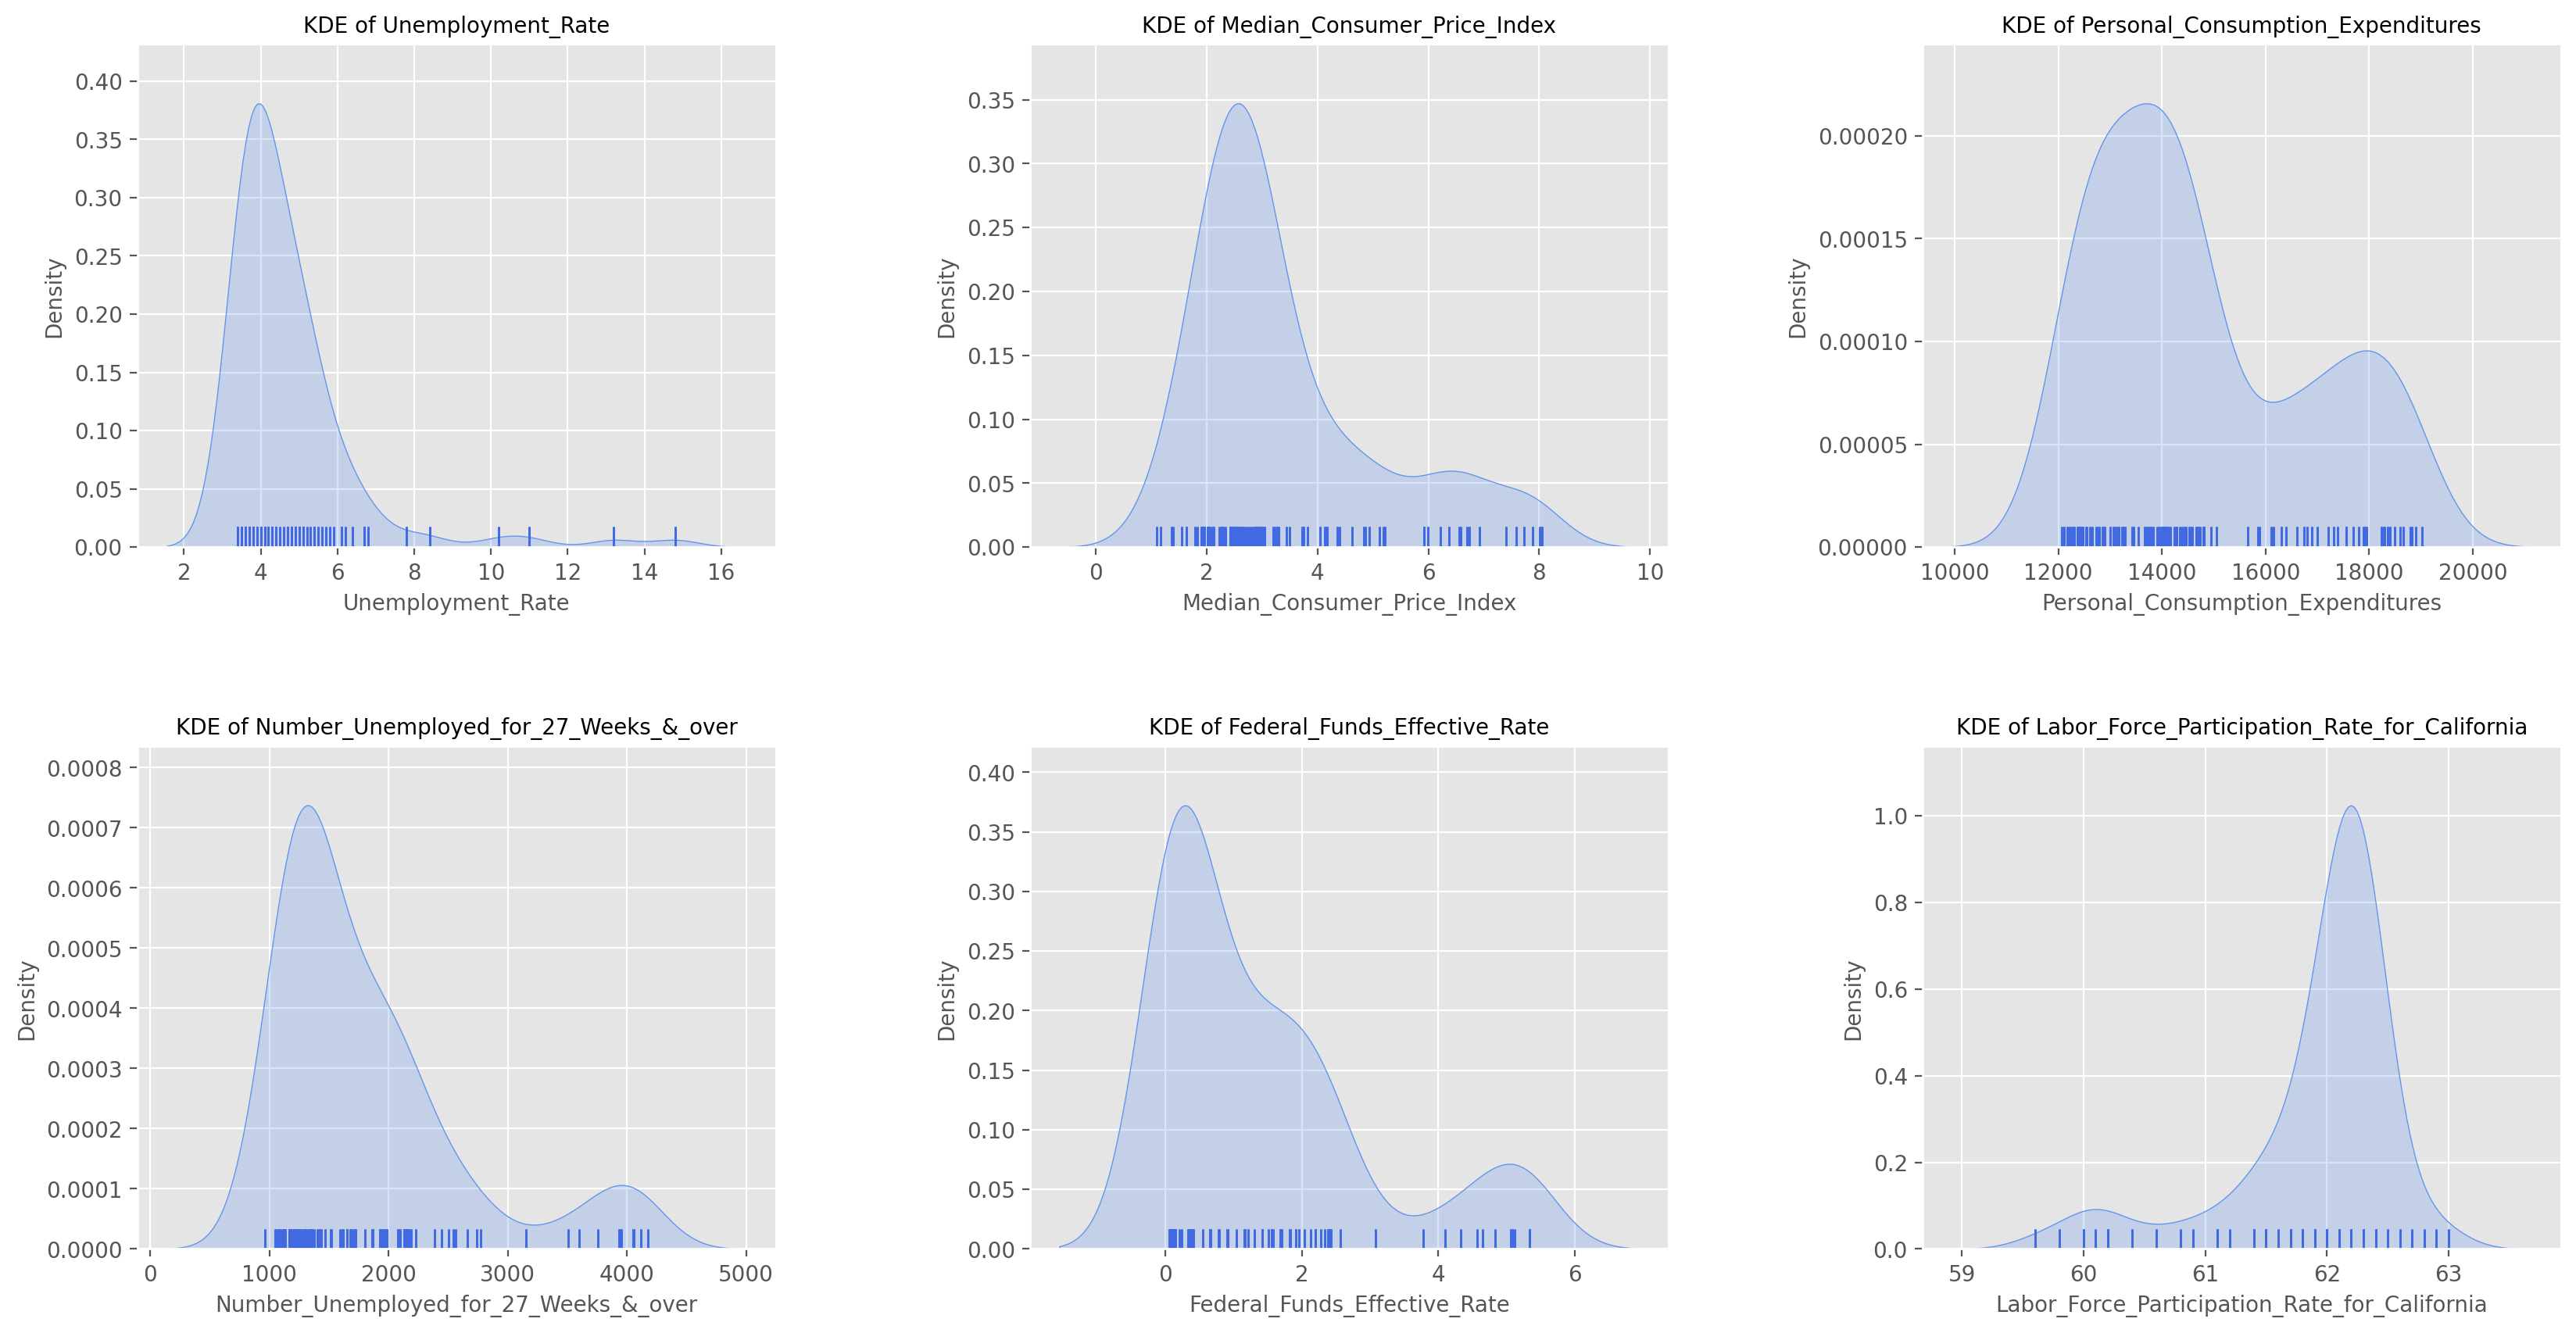

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(eco_cols_new):
    row, col_idx = divmod(i, 3)
    sns.kdeplot(data=input_data, x=col,
                ax=axes[row, col_idx], color='cornflowerblue', fill=True)
    sns.rugplot(input_data[col], ax=axes[row, col_idx],
                color='royalblue', linewidth=1, height=0.04)
    axes[row, col_idx].set_title(f'KDE of {col}', fontsize=10)
    axes[row, col_idx].tick_params(axis='both', which='major', labelsize=10)
    axes[row, col_idx].set_xlabel(col, fontsize=10)
    axes[row, col_idx].set_ylabel('Density', fontsize=10)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


Text(0.5, 1.06, '\nPairwise Distribution of Economic Factors\n\n')

Text(51.9861111111111, 0.5, 'Unemployment_Rate')

Text(78.3611111111111, 0.5, 'Median_Consumer_Price_Index')

Text(36.2361111111111, 0.5, 'Personal_Consumption_Expenditures')

Text(46.8611111111111, 0.5, 'Number_Unemployed_for_27_Weeks_&_over')

Text(78.3611111111111, 0.5, 'Federal_Funds_Effective_Rate')

Text(67.8611111111111, 0.5, 'Labor_Force_Participation_Rate_for_California')

Text(0.5, 52.11111111111096, 'Unemployment_Rate')

Text(0.5, 52.11111111111096, 'Median_Consumer_Price_Index')

Text(0.5, 52.11111111111096, 'Personal_Consumption_Expenditures')

Text(0.5, 52.11111111111096, 'Number_Unemployed_for_27_Weeks_&_over')

Text(0.5, 52.11111111111096, 'Federal_Funds_Effective_Rate')

Text(0.5, 52.11111111111096, 'Labor_Force_Participation_Rate_for_California')

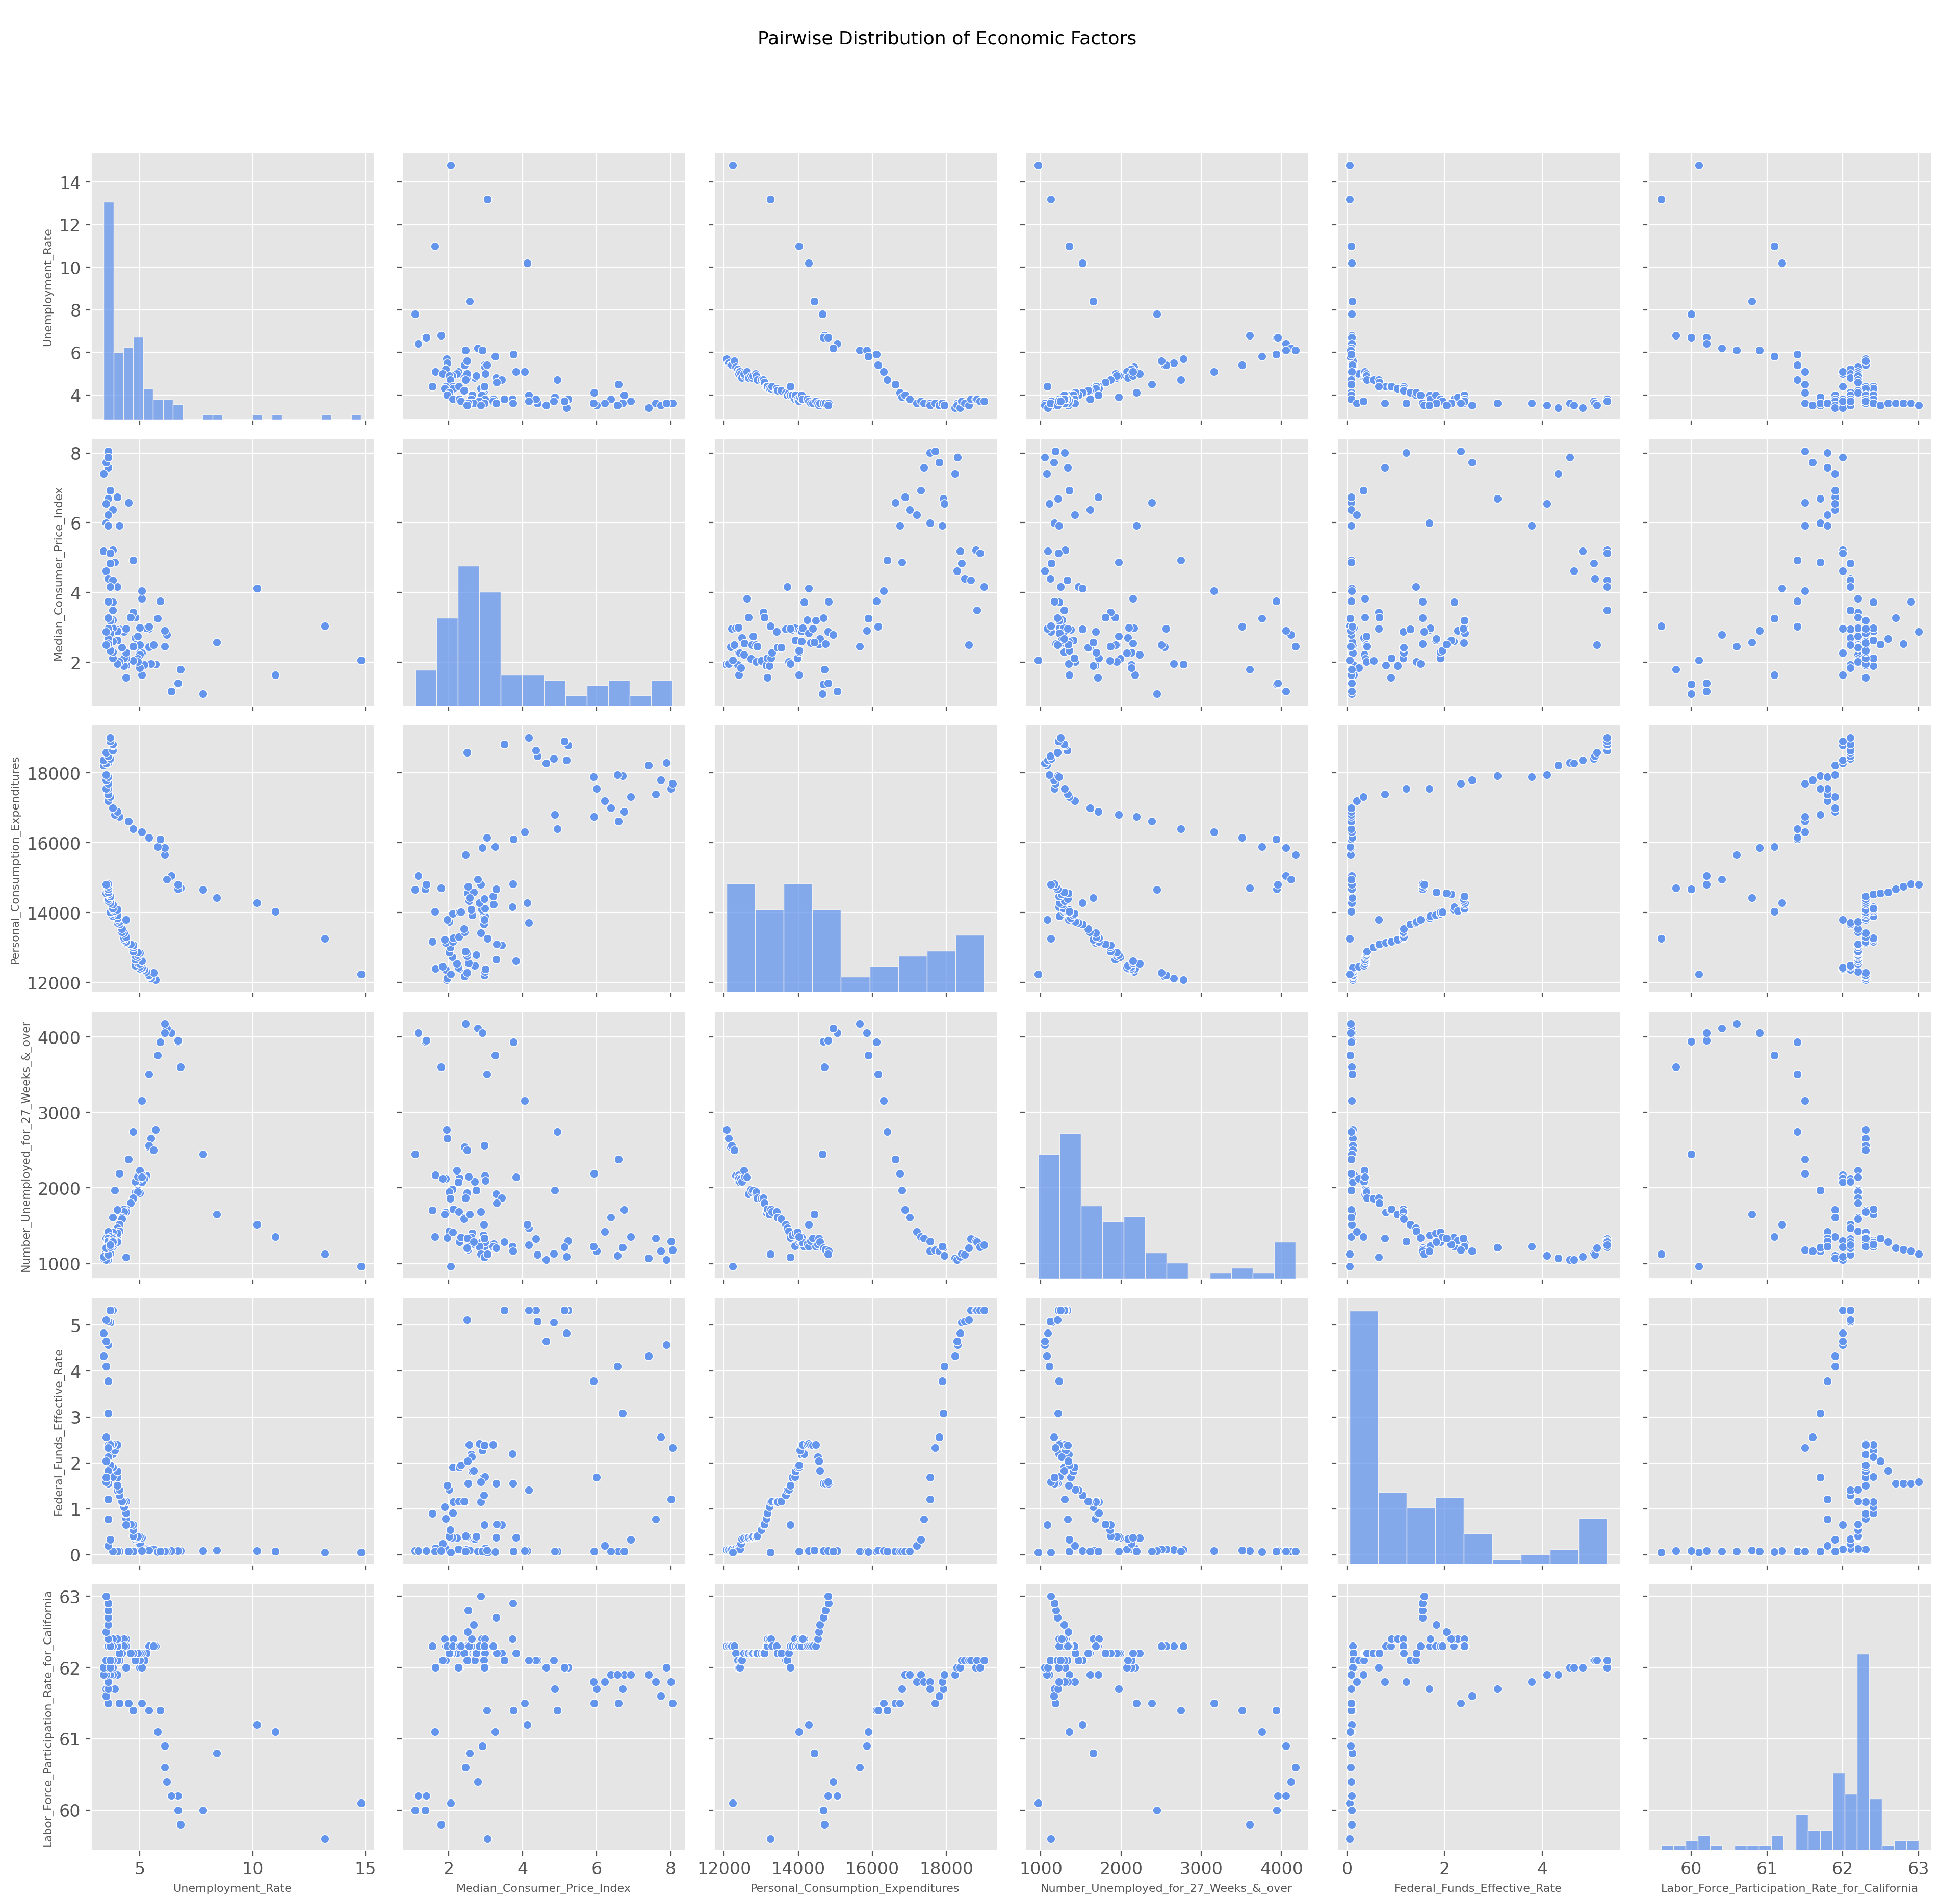

In [18]:
# Pairplot for Economic Data
pairplot = sns.pairplot(input_data[eco_cols_new], plot_kws={
                        'color': 'cornflowerblue'}, diag_kws={'color': 'cornflowerblue'})
pairplot.fig.suptitle(
    '\nPairwise Distribution of Economic Factors\n\n', fontsize=13, y=1.06)
pairplot.fig.set_size_inches(20, 18)
# Adjust the font size of the leftmost y-axis labels
for i, ax in enumerate(pairplot.axes[:, 0]):
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Adjust the font size of the bottom x-axis labels
for ax in pairplot.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
plt.show()


# Fallbrook weather data

In [19]:
# Descriptive Statistics for Fallbrook Weather Data
with pd.option_context('float_format', '{:f}'.format):
    input_data[weather_fallbrook].describe().T


count       mean       std        min  \
Temperature_Fallbrook           216.000000  17.055303  3.596314   9.760880   
Sea_Level_Pressure_Fallbrook    216.000000 742.658457  1.427656 740.314450   
Humidity_Fallbrook              216.000000  66.793920 10.396502  31.916667   
Wind_Speed_Fallbrook            216.000000   1.857397  0.312388   1.186298   
Visibility_Fallbrook            216.000000  14.792203  0.627279  13.053333   
Dew_point_temperature_Fallbrook 216.000000   9.192613  5.230041  -4.534498   

                                       25%        50%        75%        max  
Temperature_Fallbrook            14.216468  16.461810  20.562465  23.619718  
Sea_Level_Pressure_Fallbrook    741.386022 742.240842 743.934006 745.576340  
Humidity_Fallbrook               61.128533  69.056502  74.600565  85.405244  
Wind_Speed_Fallbrook              1.617894   1.809621   2.091785   2.660128  
Visibility_Fallbrook             14.414525  14.882023  15.236255  15.897059  
Dew_point_temperature_Fallbrook   4.933694   8.579012  13.898736  16.815232

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '\nCorrelation Heatmap of Fallbrook Weather Factors\n')

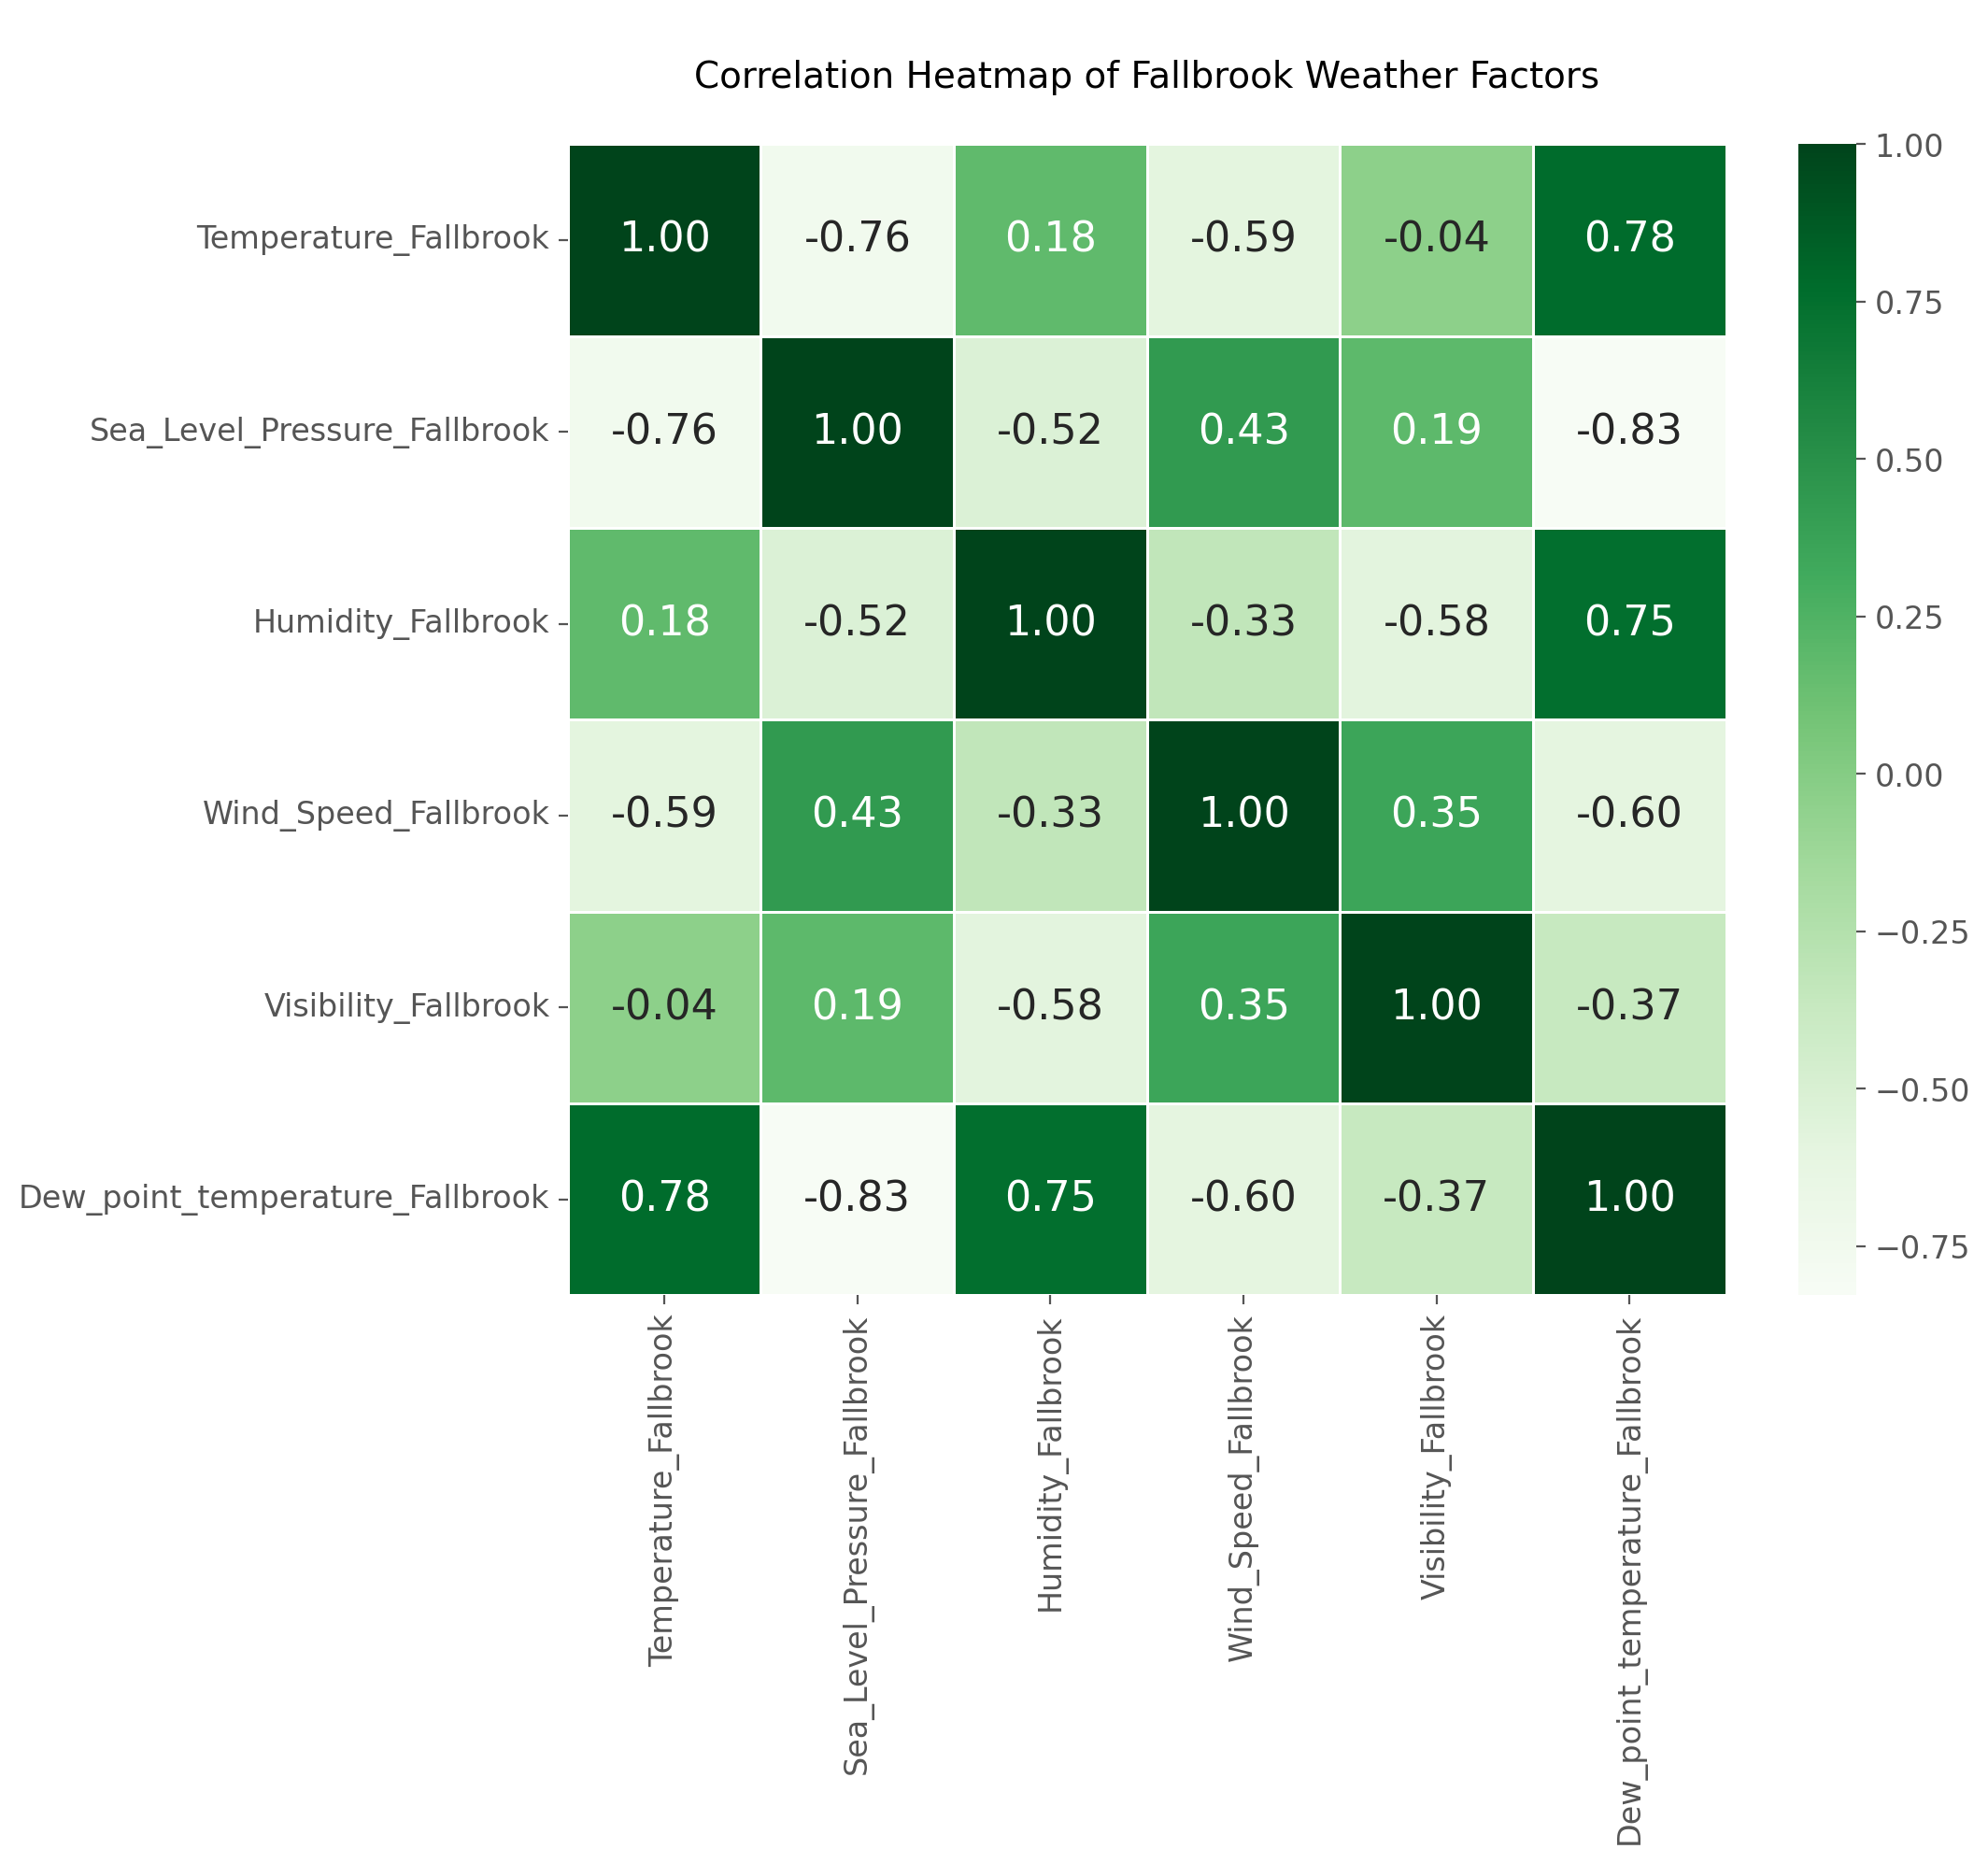

In [20]:
# Correlation Heatmap for Fallbrook Weather Data
plt.figure(figsize=(10, 8))
sns.heatmap(input_data[weather_fallbrook].corr(),
            annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('\nCorrelation Heatmap of Fallbrook Weather Factors\n', fontsize=14)
plt.show()


<Axes: xlabel='Temperature_Fallbrook', ylabel='Density'>

<Axes: xlabel='Temperature_Fallbrook', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Temperature_Fallbrook')

Text(0.5, 0, 'Temperature_Fallbrook')

Text(0, 0.5, 'Density')

<Axes: xlabel='Sea_Level_Pressure_Fallbrook', ylabel='Density'>

<Axes: xlabel='Sea_Level_Pressure_Fallbrook', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Sea_Level_Pressure_Fallbrook')

Text(0.5, 0, 'Sea_Level_Pressure_Fallbrook')

Text(0, 0.5, 'Density')

<Axes: xlabel='Humidity_Fallbrook', ylabel='Density'>

<Axes: xlabel='Humidity_Fallbrook', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Humidity_Fallbrook')

Text(0.5, 0, 'Humidity_Fallbrook')

Text(0, 0.5, 'Density')

<Axes: xlabel='Wind_Speed_Fallbrook', ylabel='Density'>

<Axes: xlabel='Wind_Speed_Fallbrook', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Wind_Speed_Fallbrook')

Text(0.5, 0, 'Wind_Speed_Fallbrook')

Text(0, 0.5, 'Density')

<Axes: xlabel='Visibility_Fallbrook', ylabel='Density'>

<Axes: xlabel='Visibility_Fallbrook', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Visibility_Fallbrook')

Text(0.5, 0, 'Visibility_Fallbrook')

Text(0, 0.5, 'Density')

<Axes: xlabel='Dew_point_temperature_Fallbrook', ylabel='Density'>

<Axes: xlabel='Dew_point_temperature_Fallbrook', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Dew_point_temperature_Fallbrook')

Text(0.5, 0, 'Dew_point_temperature_Fallbrook')

Text(0, 0.5, 'Density')

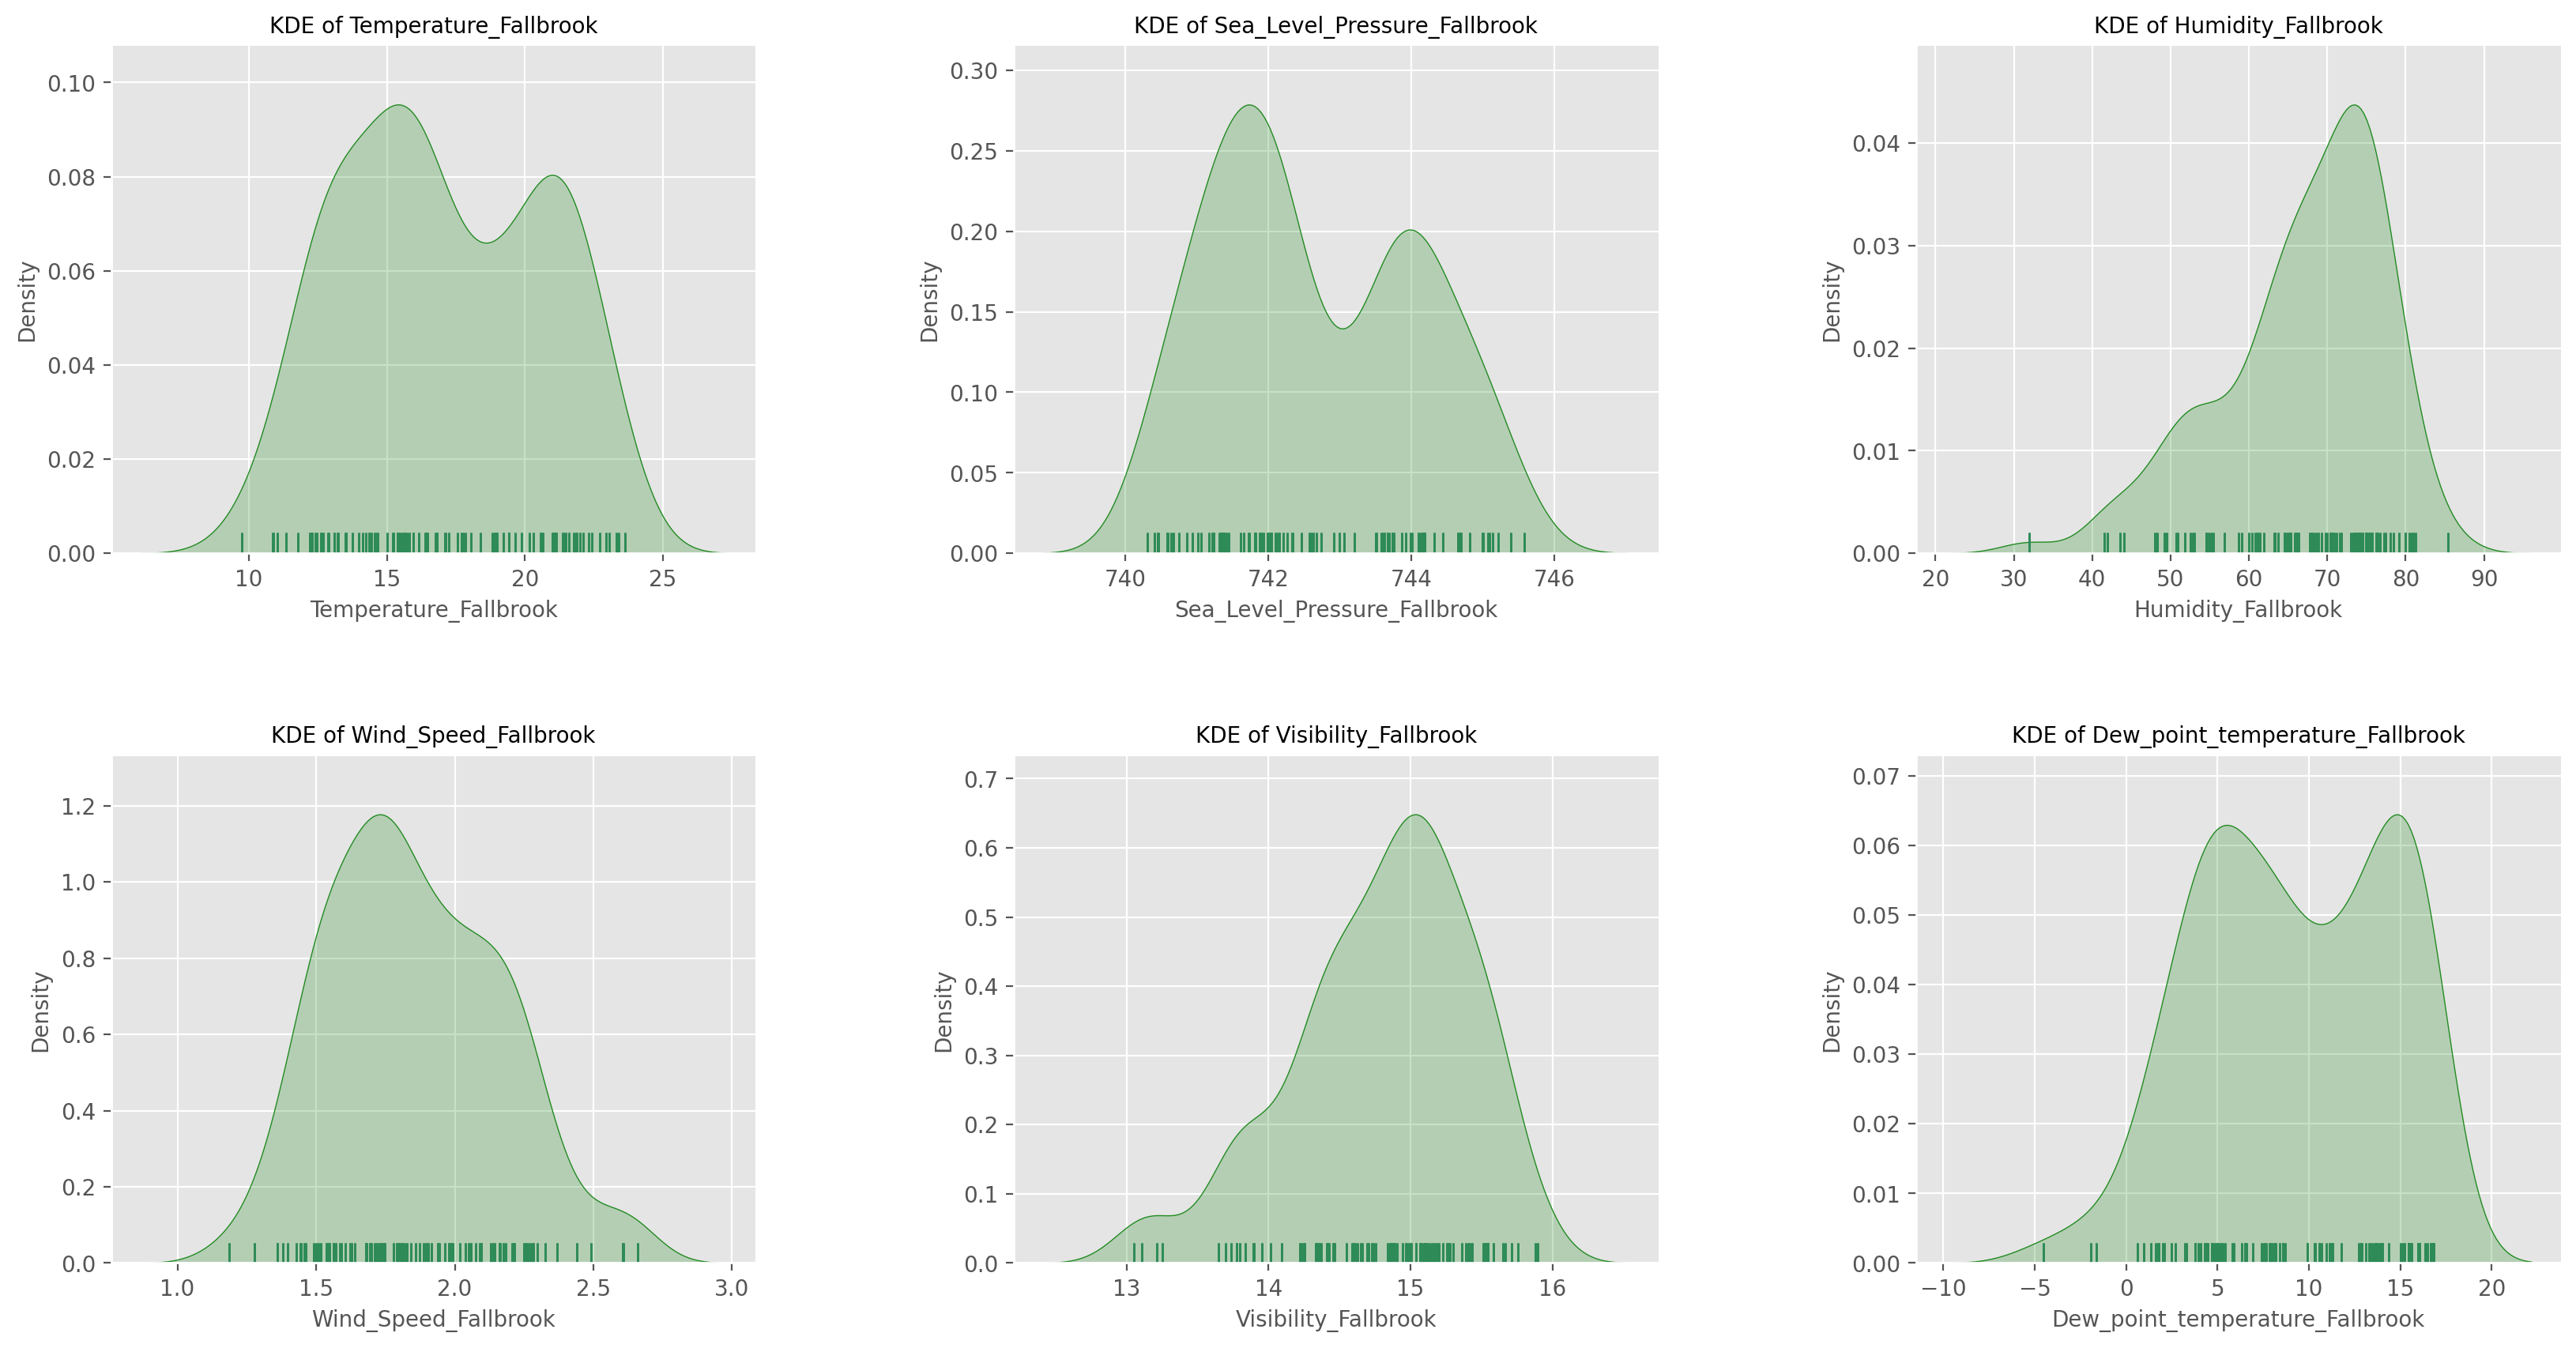

In [21]:
# KDE Plots for Fallbrook Weather Data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(weather_fallbrook):
    row, col_idx = divmod(i, 3)
    sns.kdeplot(data=input_data, x=col,
                ax=axes[row, col_idx], color='forestgreen', fill=True)
    sns.rugplot(input_data[col], ax=axes[row, col_idx],
                color='seagreen', linewidth=1, height=0.04)
    axes[row, col_idx].set_title(f'KDE of {col}', fontsize=10)
    axes[row, col_idx].tick_params(axis='both', which='major', labelsize=10)
    axes[row, col_idx].set_xlabel(col, fontsize=10)
    axes[row, col_idx].set_ylabel('Density', fontsize=10)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


Text(0.5, 1.06, '\nPairwise Distribution of Fallbrook Weather Factors\n\n')

Text(67.8611111111111, 0.5, 'Temperature_Fallbrook')

Text(57.3611111111111, 0.5, 'Sea_Level_Pressure_Fallbrook')

Text(67.8611111111111, 0.5, 'Humidity_Fallbrook')

Text(62.6111111111111, 0.5, 'Wind_Speed_Fallbrook')

Text(67.7361111111111, 0.5, 'Visibility_Fallbrook')

Text(64.6111111111111, 0.5, 'Dew_point_temperature_Fallbrook')

Text(0.5, 52.11111111111096, 'Temperature_Fallbrook')

Text(0.5, 52.11111111111096, 'Sea_Level_Pressure_Fallbrook')

Text(0.5, 52.11111111111096, 'Humidity_Fallbrook')

Text(0.5, 52.11111111111096, 'Wind_Speed_Fallbrook')

Text(0.5, 52.11111111111096, 'Visibility_Fallbrook')

Text(0.5, 52.11111111111096, 'Dew_point_temperature_Fallbrook')

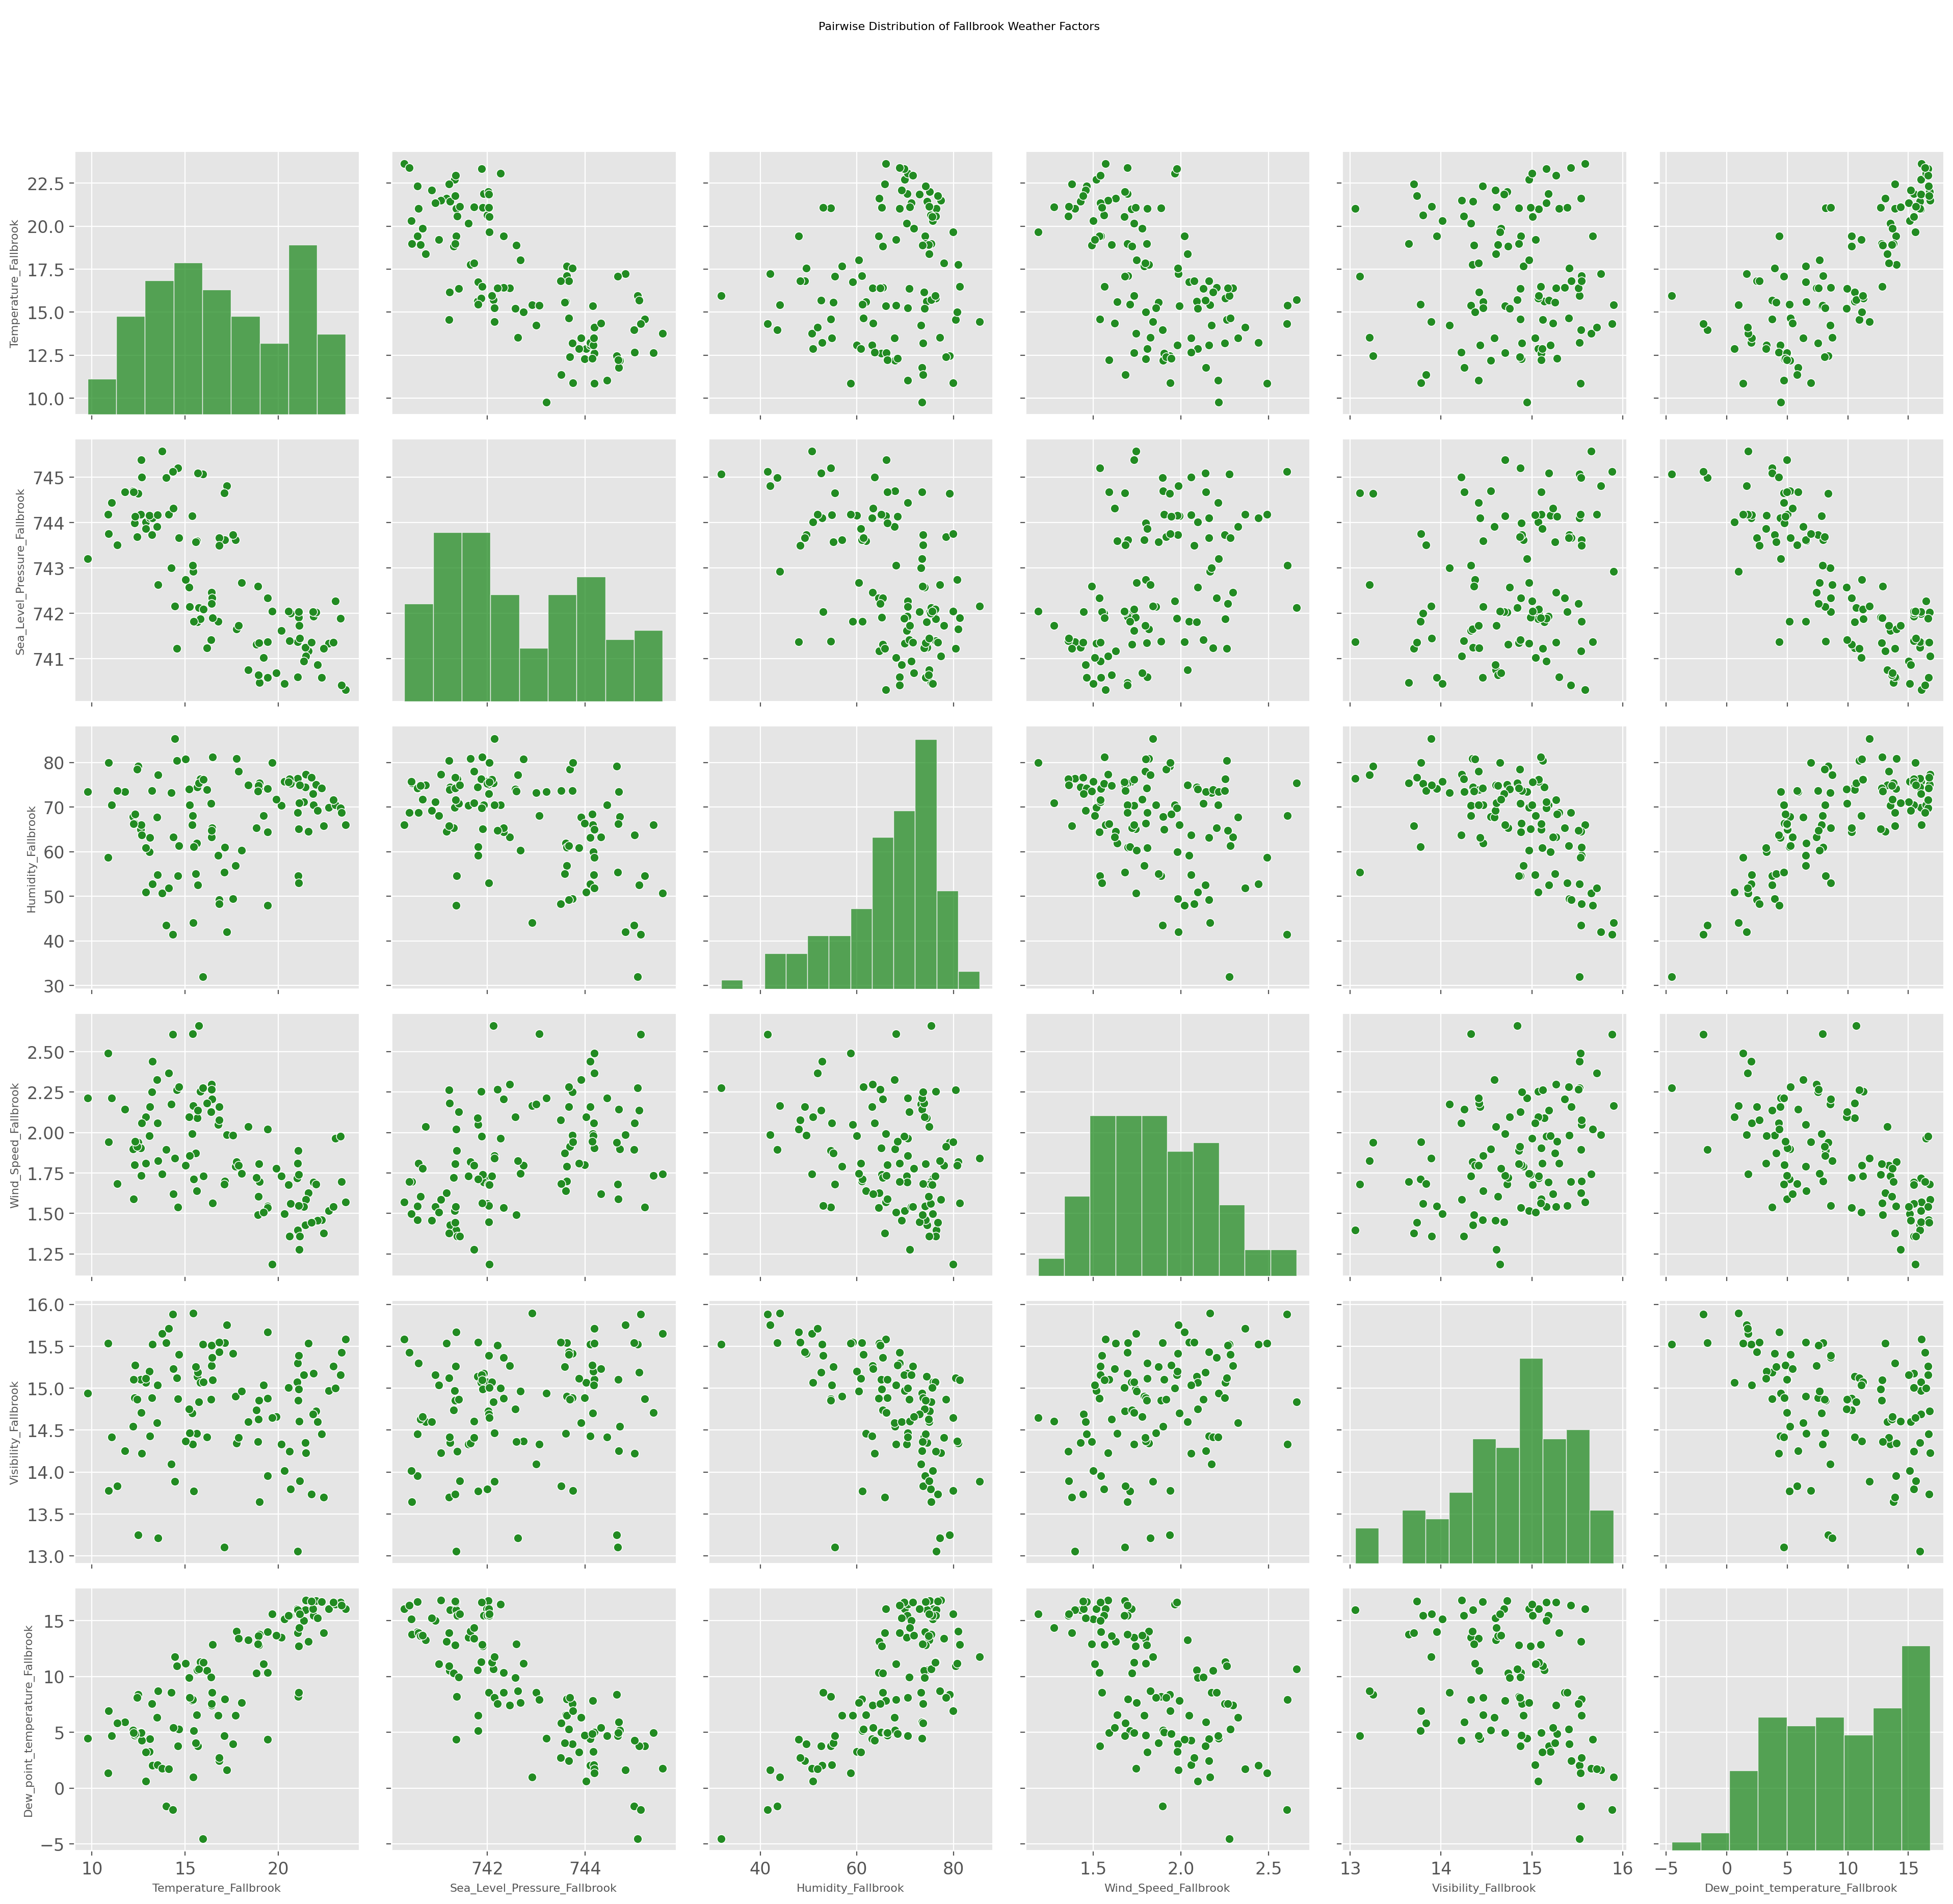

In [22]:
# Pairplot for Fallbrook Weather Data
pairplot = sns.pairplot(input_data[weather_fallbrook], plot_kws={
                        'color': 'forestgreen'}, diag_kws={'color': 'forestgreen'})
pairplot.fig.suptitle(
    '\nPairwise Distribution of Fallbrook Weather Factors\n\n', fontsize=8, y=1.06)
pairplot.fig.set_size_inches(20, 18)
# Adjust the font size of the leftmost y-axis labels
for i, ax in enumerate(pairplot.axes[:, 0]):
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Adjust the font size of the bottom x-axis labels
for ax in pairplot.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
plt.show()


In [23]:
# Descriptive Statistics for Uruapan Weather Data
with pd.option_context('float_format', '{:f}'.format):
    input_data[weather_uruapan].describe().T


count       mean       std        min  \
Temperature_Uruapan           216.000000  20.603093  1.415372  17.280303   
Sea_Level_Pressure_Uruapan    216.000000 635.813458  0.572428 634.337121   
Humidity_Uruapan              216.000000  67.251374 13.404664  36.744063   
Wind_Speed_Uruapan            216.000000   1.799516  0.314965   0.967662   
Visibility_Uruapan            216.000000  13.408285  2.519041   7.799501   
Dew_point_temperature_Uruapan 216.000000  13.461364  3.381558   5.142480   

                                     25%        50%        75%        max  
Temperature_Uruapan            19.741589  20.443585  21.600767  24.635443  
Sea_Level_Pressure_Uruapan    635.451312 635.816259 636.230783 637.113317  
Humidity_Uruapan               57.362114  68.695882  79.500787  85.725191  
Wind_Speed_Uruapan              1.561724   1.754706   2.009551   2.506596  
Visibility_Uruapan             11.546415  13.192788  14.922268  20.525341  
Dew_point_temperature_Uruapan  10.256261  13.792843  16.698894  17.846154

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '\nCorrelation Heatmap of Uruapan Weather Factors\n')

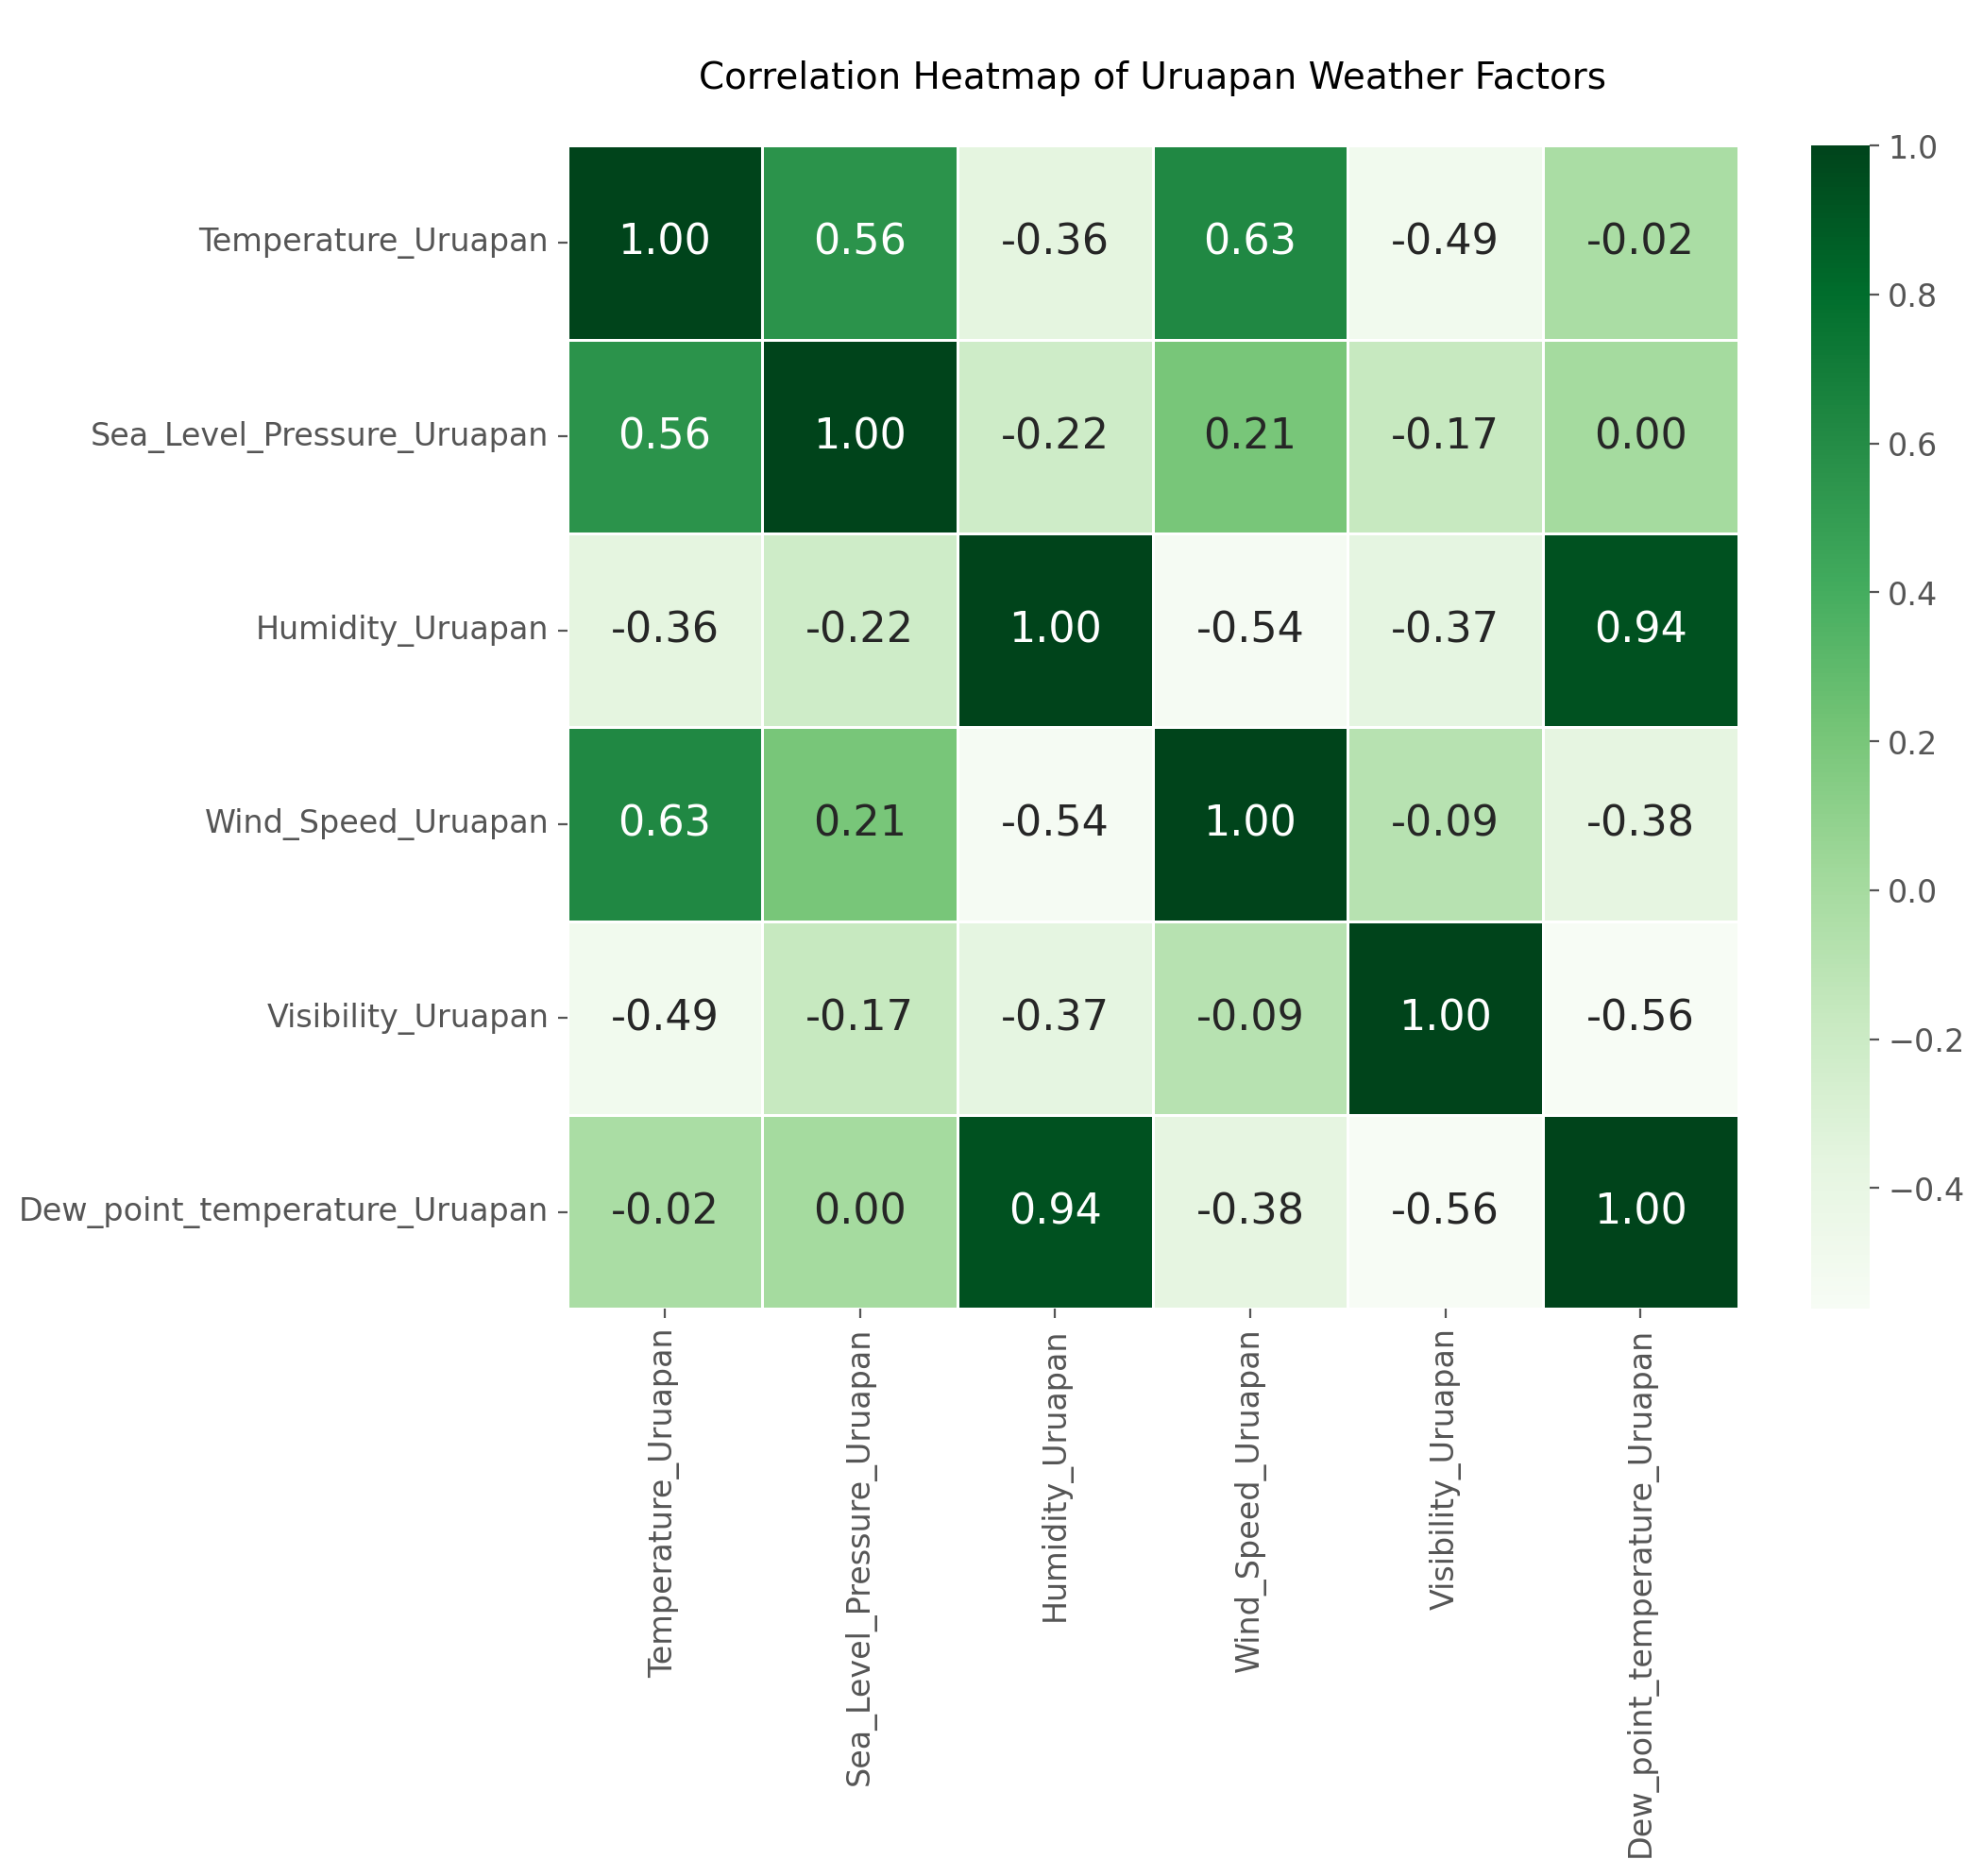

In [24]:
# Correlation Heatmap for Uruapan Weather Data
plt.figure(figsize=(10, 8))
sns.heatmap(input_data[weather_uruapan].corr(),
            annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('\nCorrelation Heatmap of Uruapan Weather Factors\n', fontsize=14)
plt.show()


<Axes: xlabel='Temperature_Uruapan', ylabel='Density'>

<Axes: xlabel='Temperature_Uruapan', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Temperature_Uruapan')

Text(0.5, 0, 'Temperature_Uruapan')

Text(0, 0.5, 'Density')

<Axes: xlabel='Sea_Level_Pressure_Uruapan', ylabel='Density'>

<Axes: xlabel='Sea_Level_Pressure_Uruapan', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Sea_Level_Pressure_Uruapan')

Text(0.5, 0, 'Sea_Level_Pressure_Uruapan')

Text(0, 0.5, 'Density')

<Axes: xlabel='Humidity_Uruapan', ylabel='Density'>

<Axes: xlabel='Humidity_Uruapan', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Humidity_Uruapan')

Text(0.5, 0, 'Humidity_Uruapan')

Text(0, 0.5, 'Density')

<Axes: xlabel='Wind_Speed_Uruapan', ylabel='Density'>

<Axes: xlabel='Wind_Speed_Uruapan', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Wind_Speed_Uruapan')

Text(0.5, 0, 'Wind_Speed_Uruapan')

Text(0, 0.5, 'Density')

<Axes: xlabel='Visibility_Uruapan', ylabel='Density'>

<Axes: xlabel='Visibility_Uruapan', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Visibility_Uruapan')

Text(0.5, 0, 'Visibility_Uruapan')

Text(0, 0.5, 'Density')

<Axes: xlabel='Dew_point_temperature_Uruapan', ylabel='Density'>

<Axes: xlabel='Dew_point_temperature_Uruapan', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Dew_point_temperature_Uruapan')

Text(0.5, 0, 'Dew_point_temperature_Uruapan')

Text(0, 0.5, 'Density')

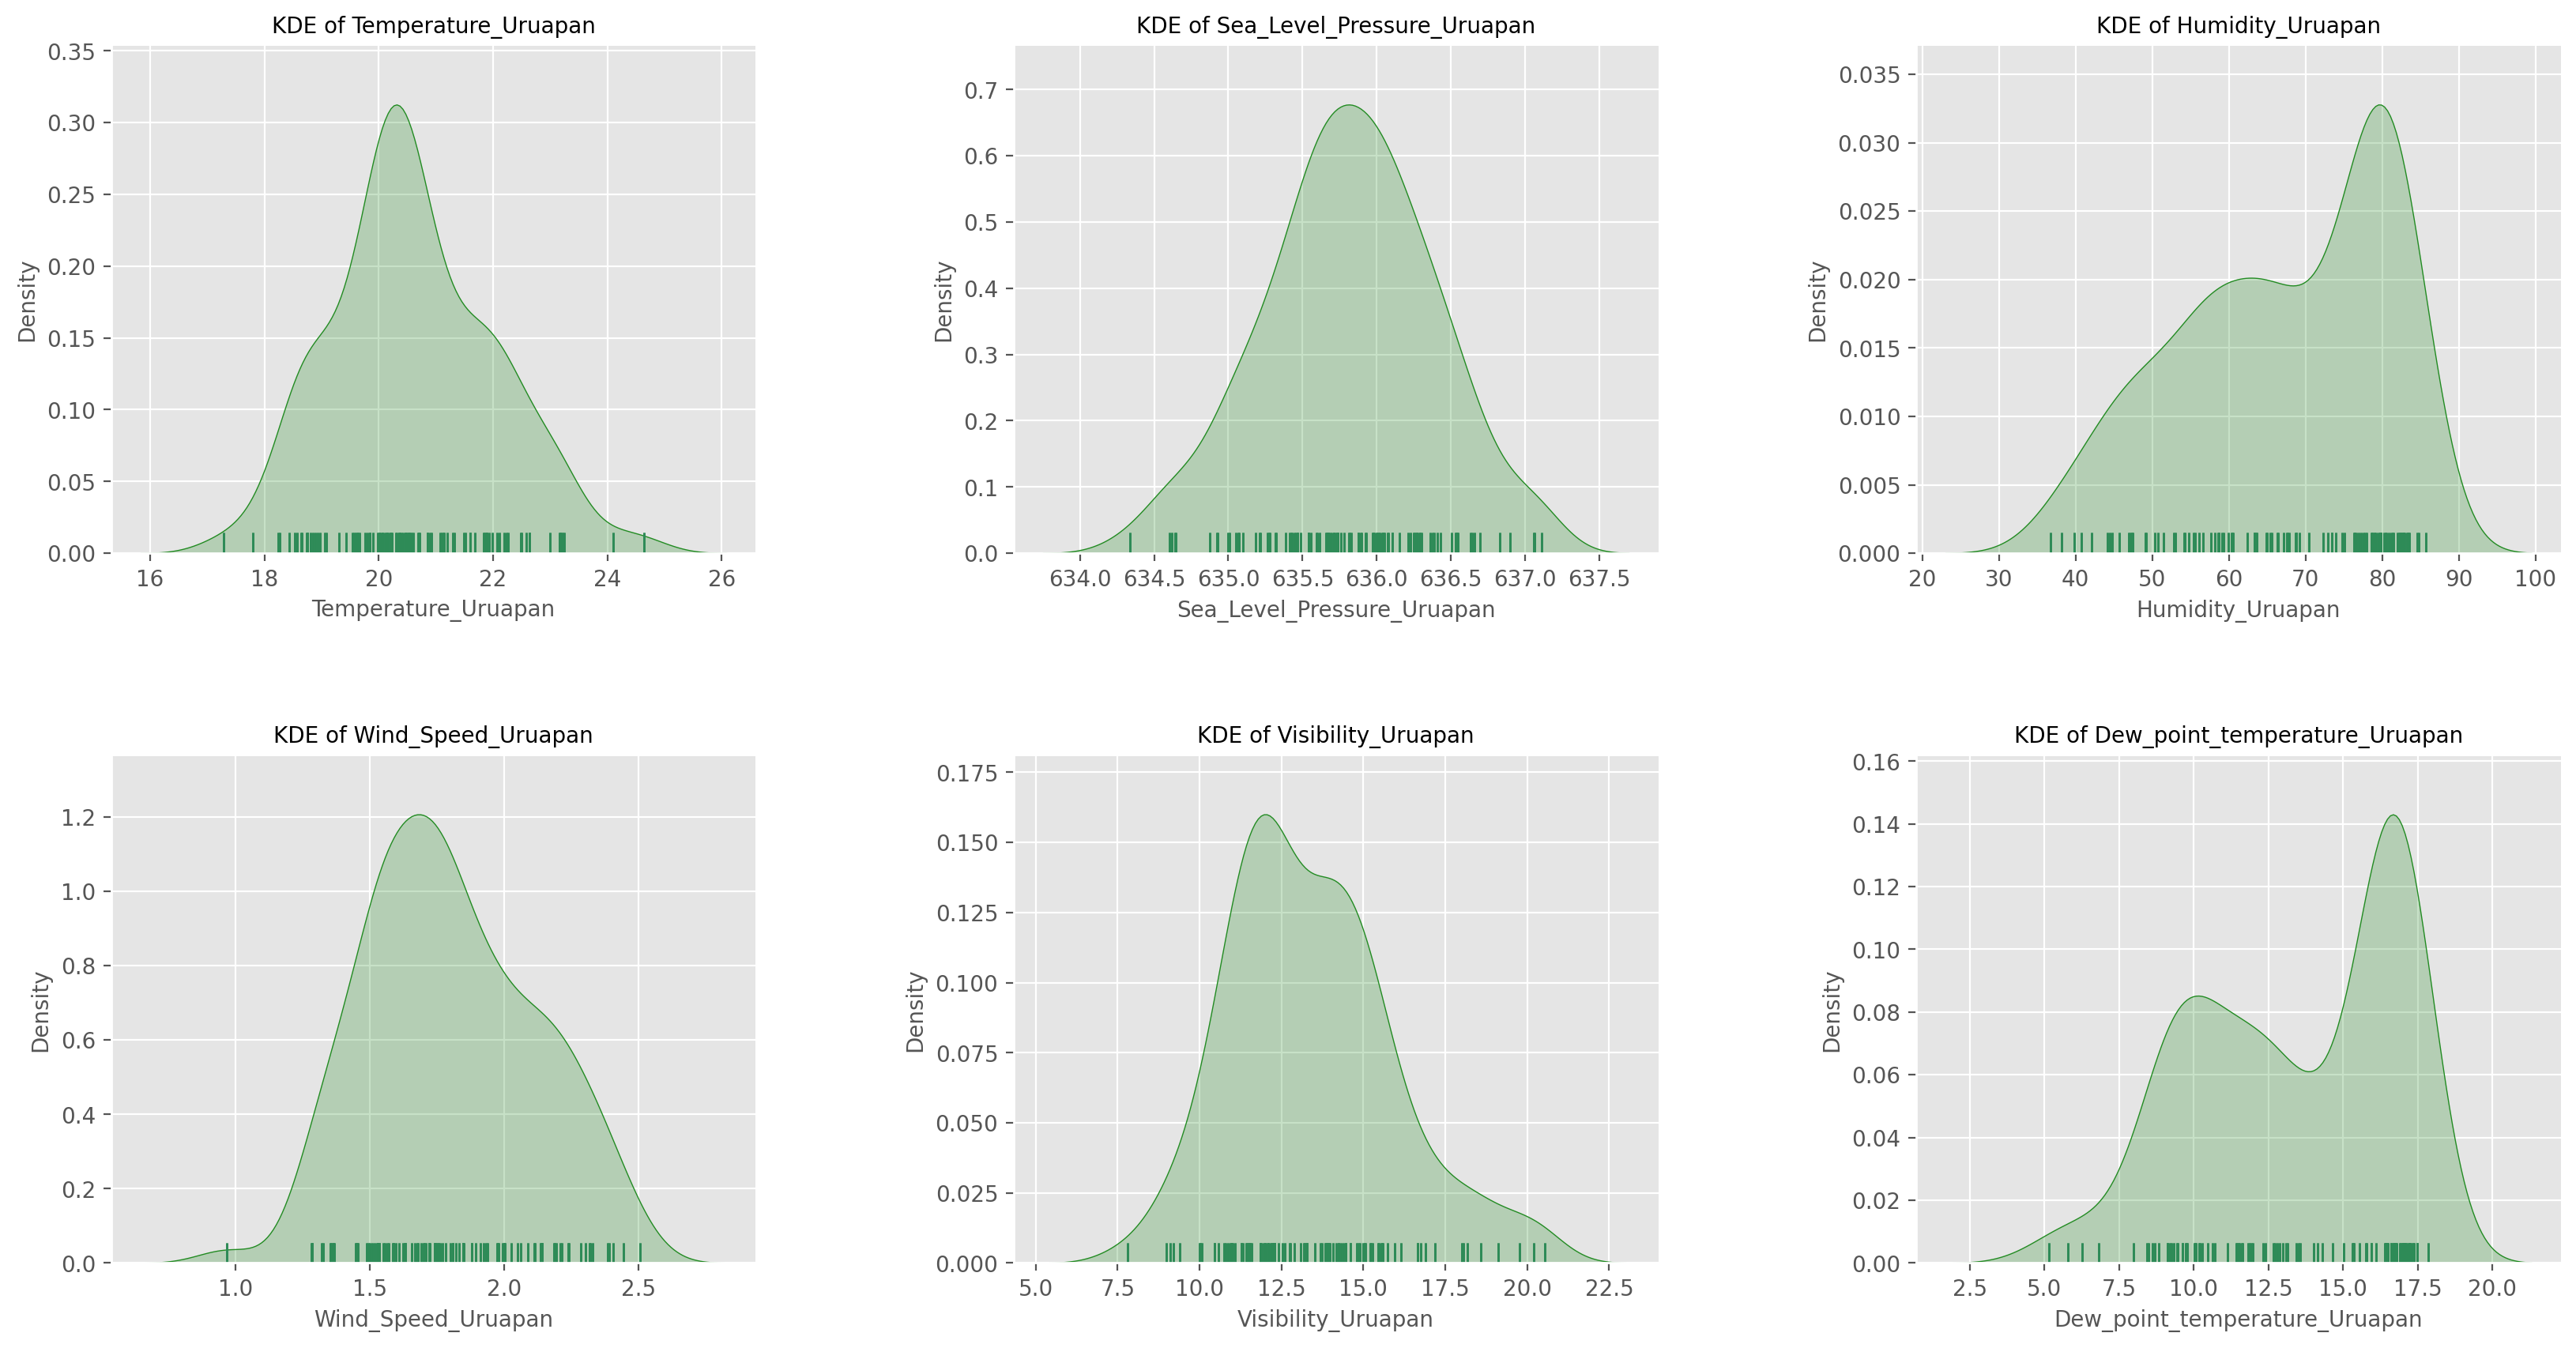

In [25]:
# KDE Plots for Uruapan Weather Data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(weather_uruapan):
    row, col_idx = divmod(i, 3)
    sns.kdeplot(data=input_data, x=col,
                ax=axes[row, col_idx], color='forestgreen', fill=True)
    sns.rugplot(input_data[col], ax=axes[row, col_idx],
                color='seagreen', linewidth=1, height=0.04)
    axes[row, col_idx].set_title(f'KDE of {col}', fontsize=10)
    axes[row, col_idx].tick_params(axis='both', which='major', labelsize=10)
    axes[row, col_idx].set_xlabel(col, fontsize=10)
    axes[row, col_idx].set_ylabel('Density', fontsize=10)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


Text(0.5, 1.06, '\nPairwise Distribution of Uruapan Weather Factors\n\n')

Text(67.7361111111111, 0.5, 'Temperature_Uruapan')

Text(57.3611111111111, 0.5, 'Sea_Level_Pressure_Uruapan')

Text(67.9861111111111, 0.5, 'Humidity_Uruapan')

Text(62.6111111111111, 0.5, 'Wind_Speed_Uruapan')

Text(51.9861111111111, 0.5, 'Visibility_Uruapan')

Text(51.9861111111111, 0.5, 'Dew_point_temperature_Uruapan')

Text(0.5, 52.11111111111096, 'Temperature_Uruapan')

Text(0.5, 52.11111111111096, 'Sea_Level_Pressure_Uruapan')

Text(0.5, 52.11111111111096, 'Humidity_Uruapan')

Text(0.5, 52.11111111111096, 'Wind_Speed_Uruapan')

Text(0.5, 52.11111111111096, 'Visibility_Uruapan')

Text(0.5, 52.11111111111096, 'Dew_point_temperature_Uruapan')

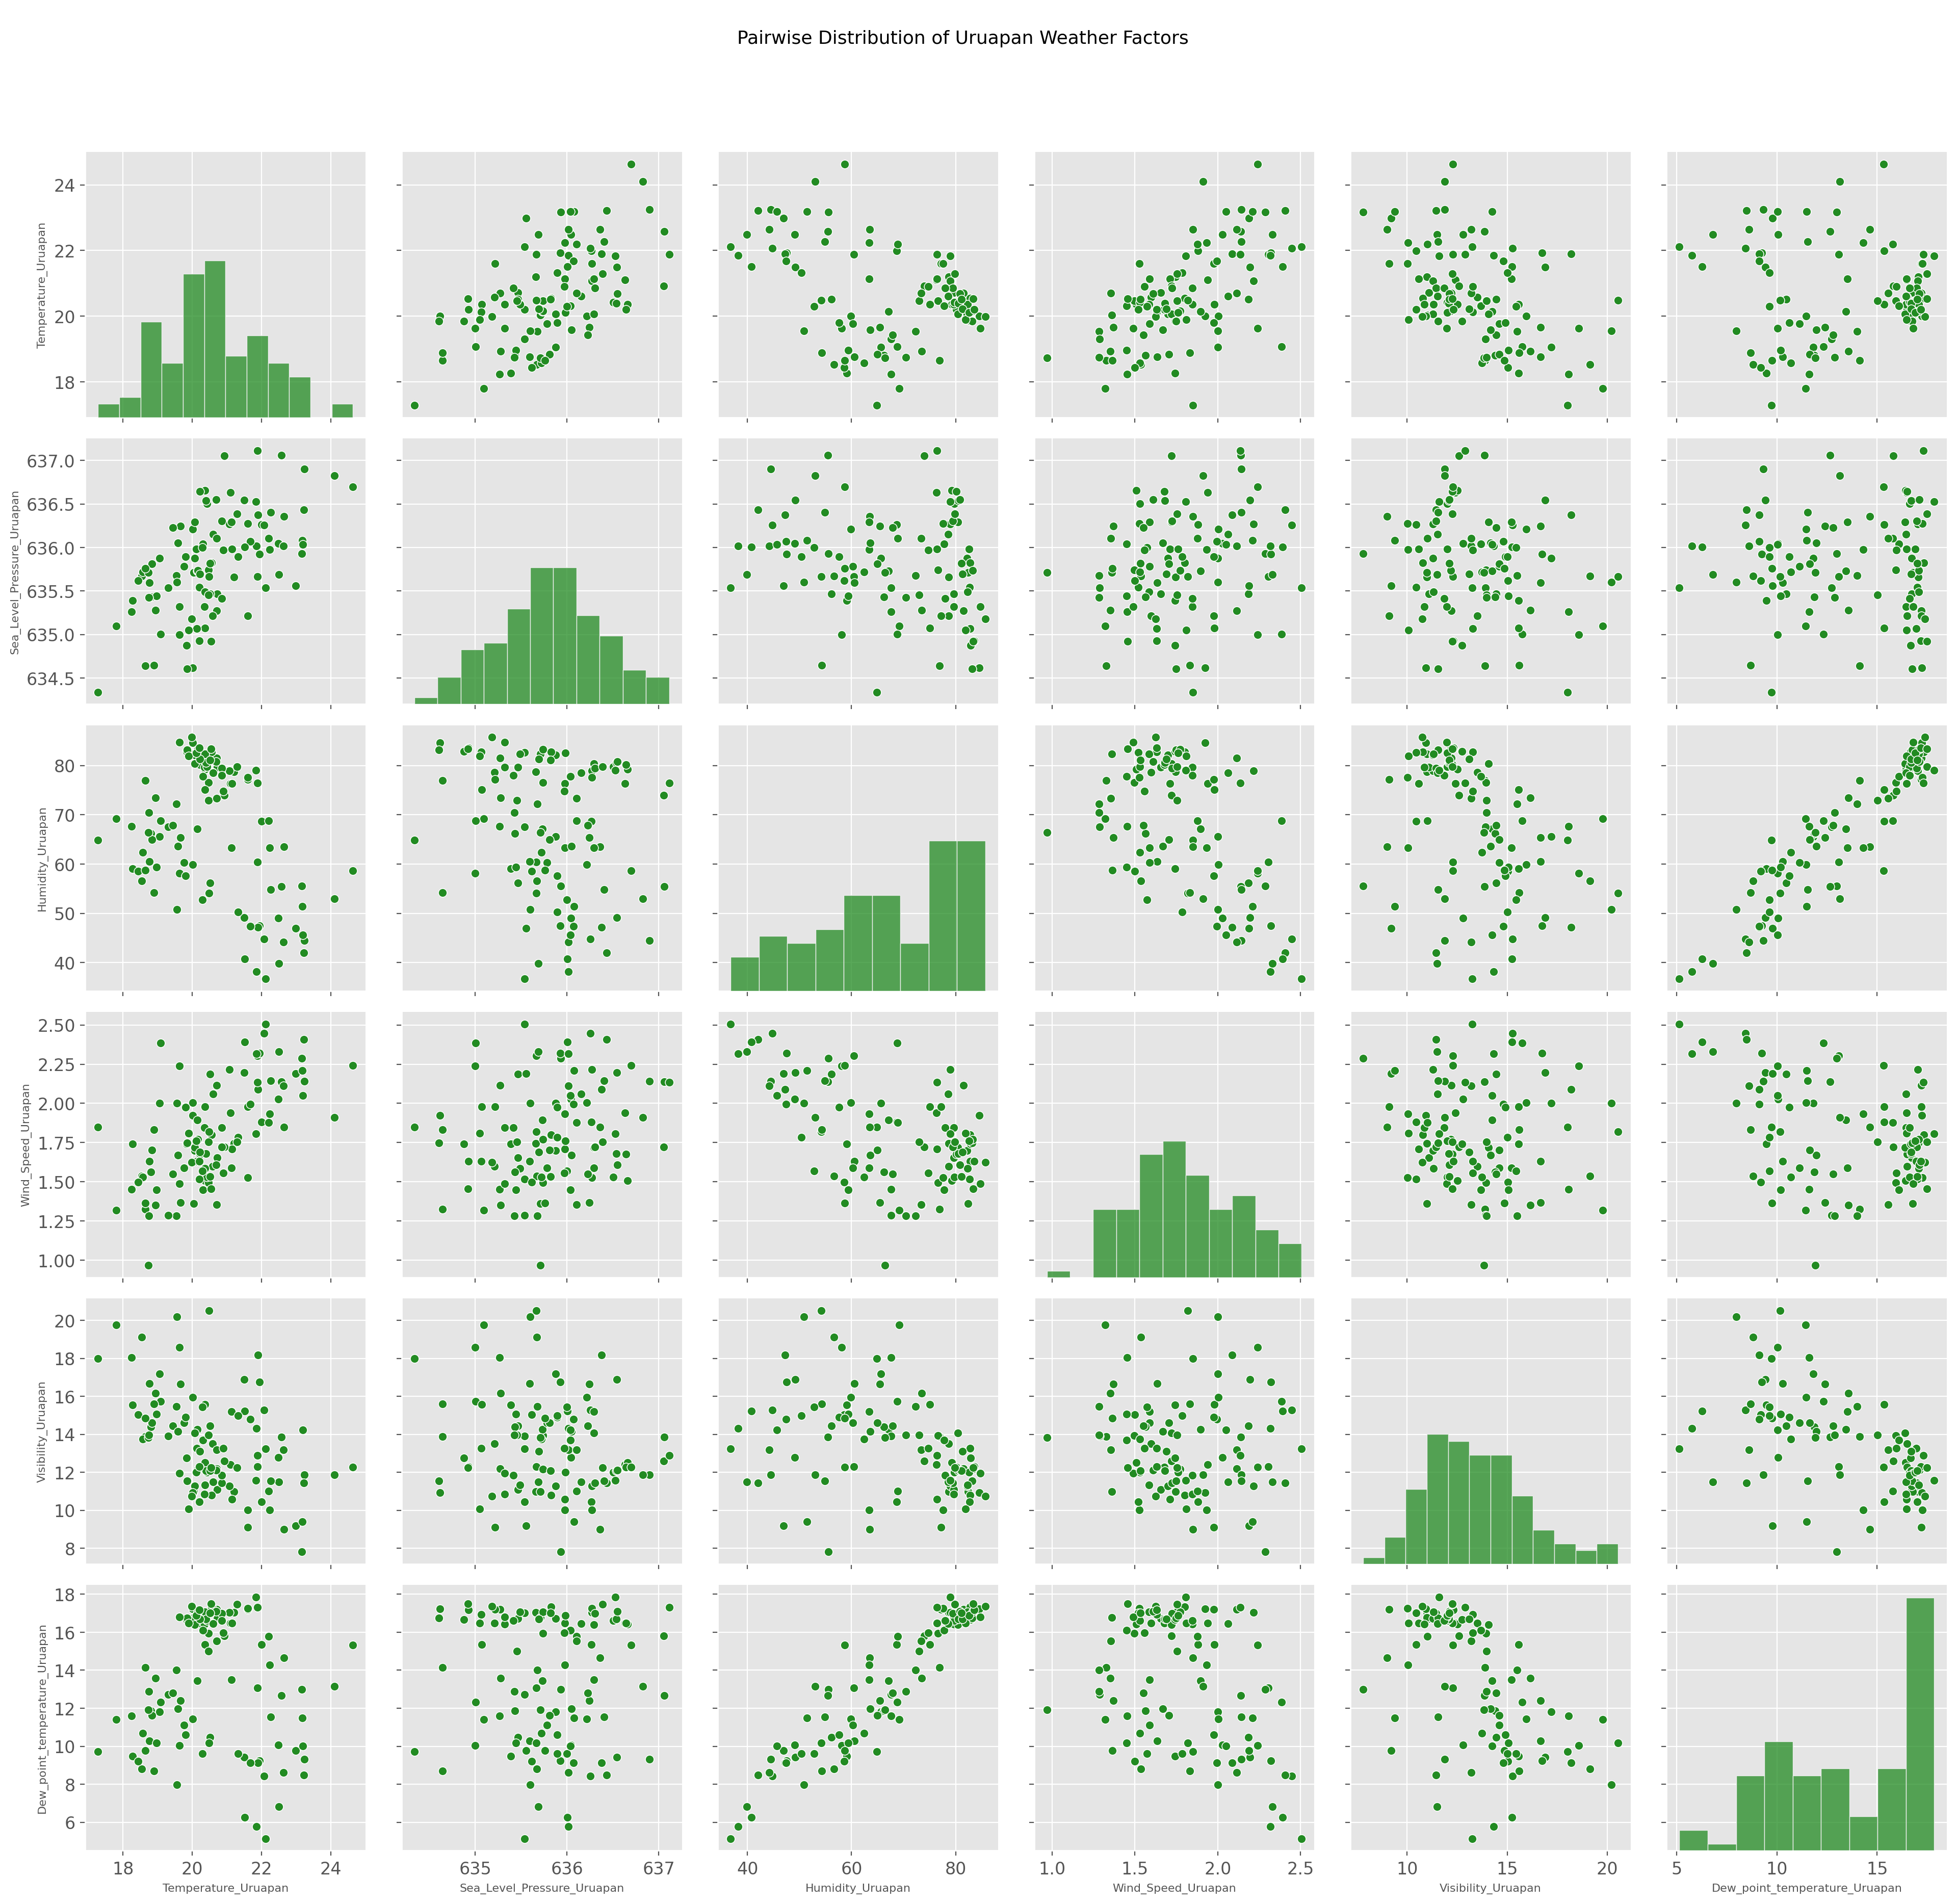

In [26]:
# Pairplot for Uruapan Weather Data
pairplot = sns.pairplot(input_data[weather_uruapan], plot_kws={
                        'color': 'forestgreen'}, diag_kws={'color': 'forestgreen'})
pairplot.fig.suptitle(
    '\nPairwise Distribution of Uruapan Weather Factors\n\n', fontsize=13, y=1.06)
pairplot.fig.set_size_inches(20, 18)
# Adjust the font size of the leftmost y-axis labels
for i, ax in enumerate(pairplot.axes[:, 0]):
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Adjust the font size of the bottom x-axis labels
for ax in pairplot.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
plt.show()


# Energy Data in California

In [27]:
# Descriptive Statistics for CA Energy Data
with pd.option_context('float_format', '{:f}'.format):
    input_data[ca_energy].describe().T


count      mean      std       min  \
California_Gas_Price         216.000000  3.757833 0.894529  2.477000   
California_NG_Price          216.000000 11.070895 3.149315  0.000000   
California_Electricity_Price 216.000000 18.180000 3.393409 12.600000   

                                   25%       50%       75%       max  
California_Gas_Price          3.095750  3.555500  4.331250  6.294000  
California_NG_Price           9.085833  9.953333 12.345833 22.953333  
California_Electricity_Price 15.497500 17.310000 20.007500 27.740000

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '\nCorrelation Heatmap of California Energy Factors\n')

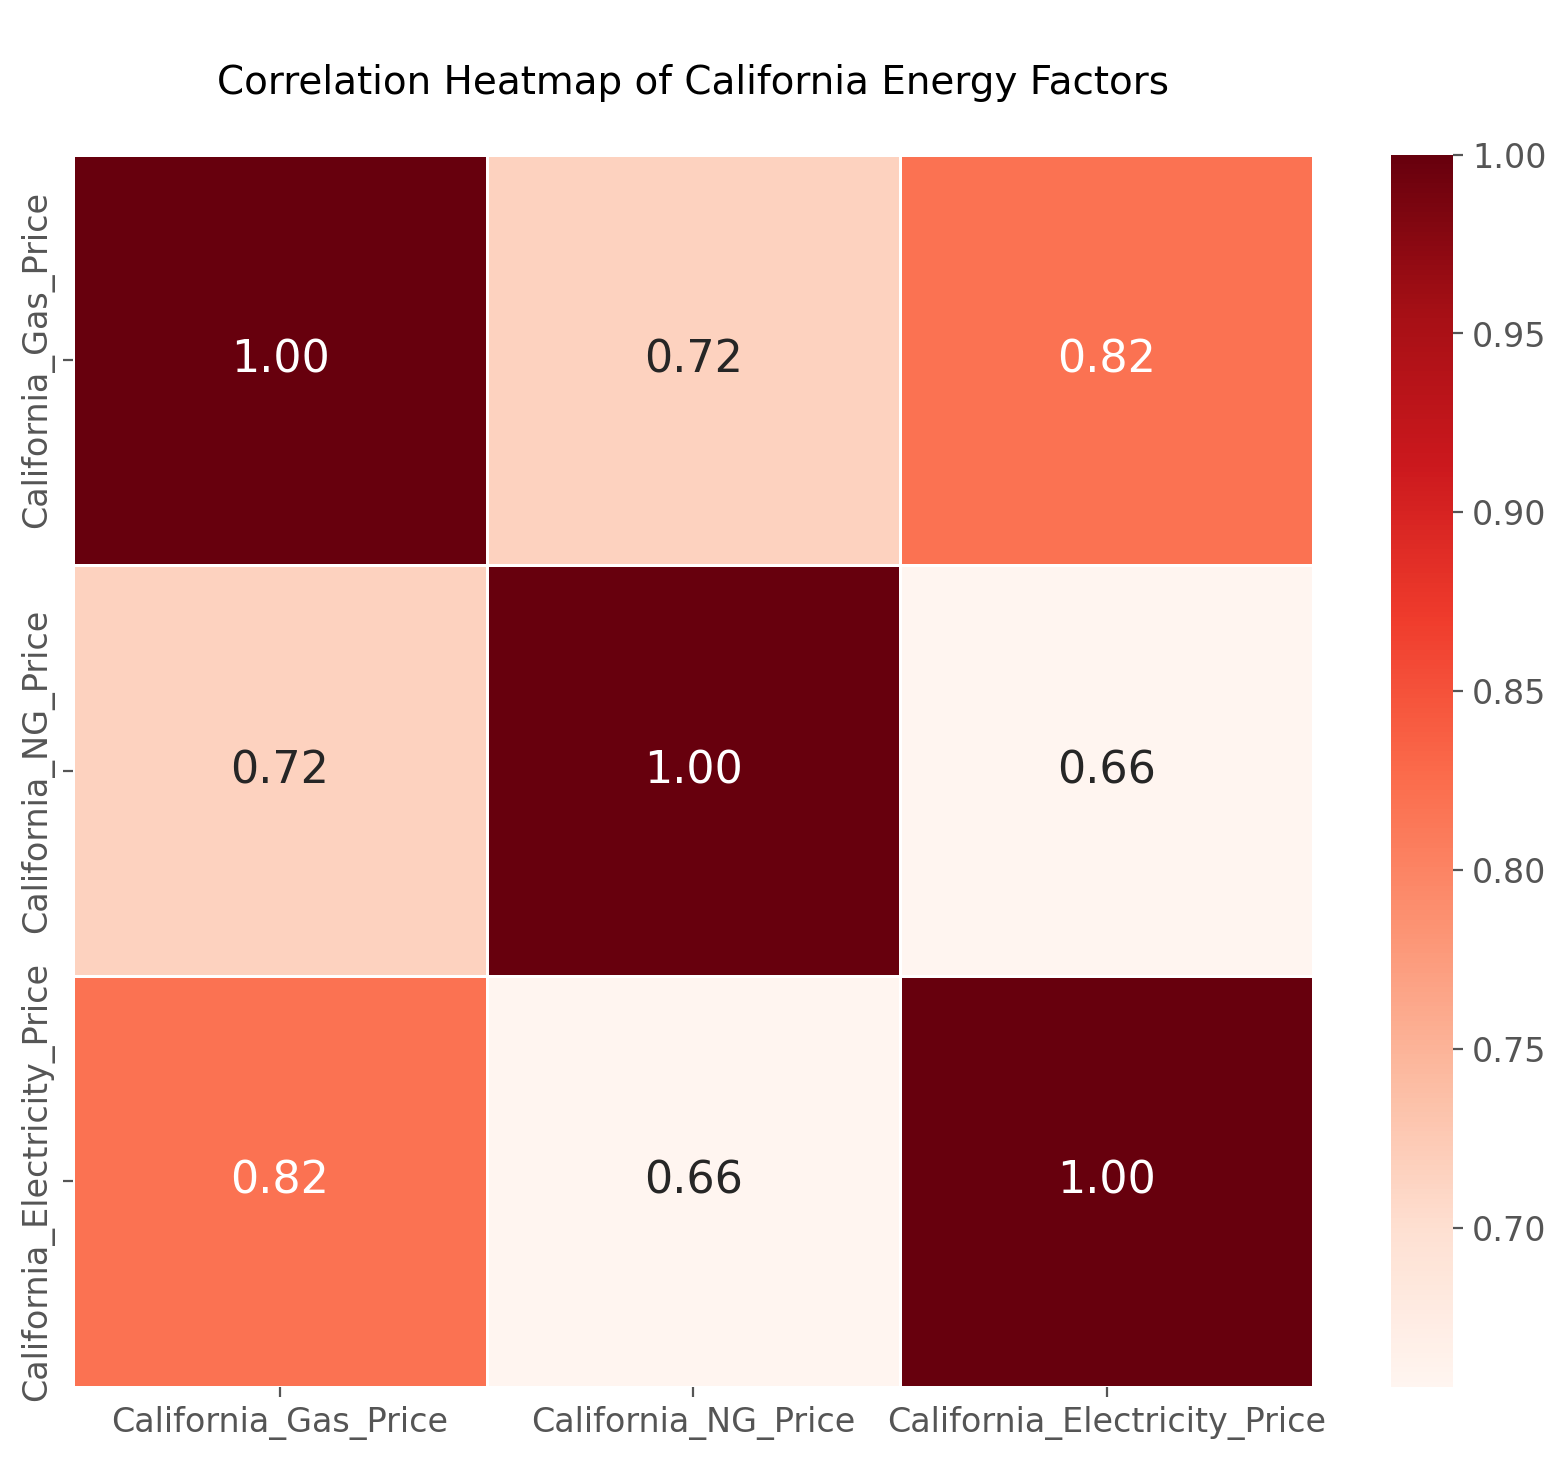

In [28]:
# Correlation Heatmap for CA Energy Data
plt.figure(figsize=(10, 8))
sns.heatmap(input_data[ca_energy].corr(), annot=True,
            cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title('\nCorrelation Heatmap of California Energy Factors\n', fontsize=14)
plt.show()


<Axes: xlabel='California_Gas_Price', ylabel='Density'>

<Axes: xlabel='California_Gas_Price', ylabel='Density'>

Text(0.5, 1.0, 'KDE of California_Gas_Price')

Text(0.5, 0, 'California_Gas_Price')

Text(0, 0.5, 'Density')

<Axes: xlabel='California_NG_Price', ylabel='Density'>

<Axes: xlabel='California_NG_Price', ylabel='Density'>

Text(0.5, 1.0, 'KDE of California_NG_Price')

Text(0.5, 0, 'California_NG_Price')

Text(0, 0.5, 'Density')

<Axes: xlabel='California_Electricity_Price', ylabel='Density'>

<Axes: xlabel='California_Electricity_Price', ylabel='Density'>

Text(0.5, 1.0, 'KDE of California_Electricity_Price')

Text(0.5, 0, 'California_Electricity_Price')

Text(0, 0.5, 'Density')

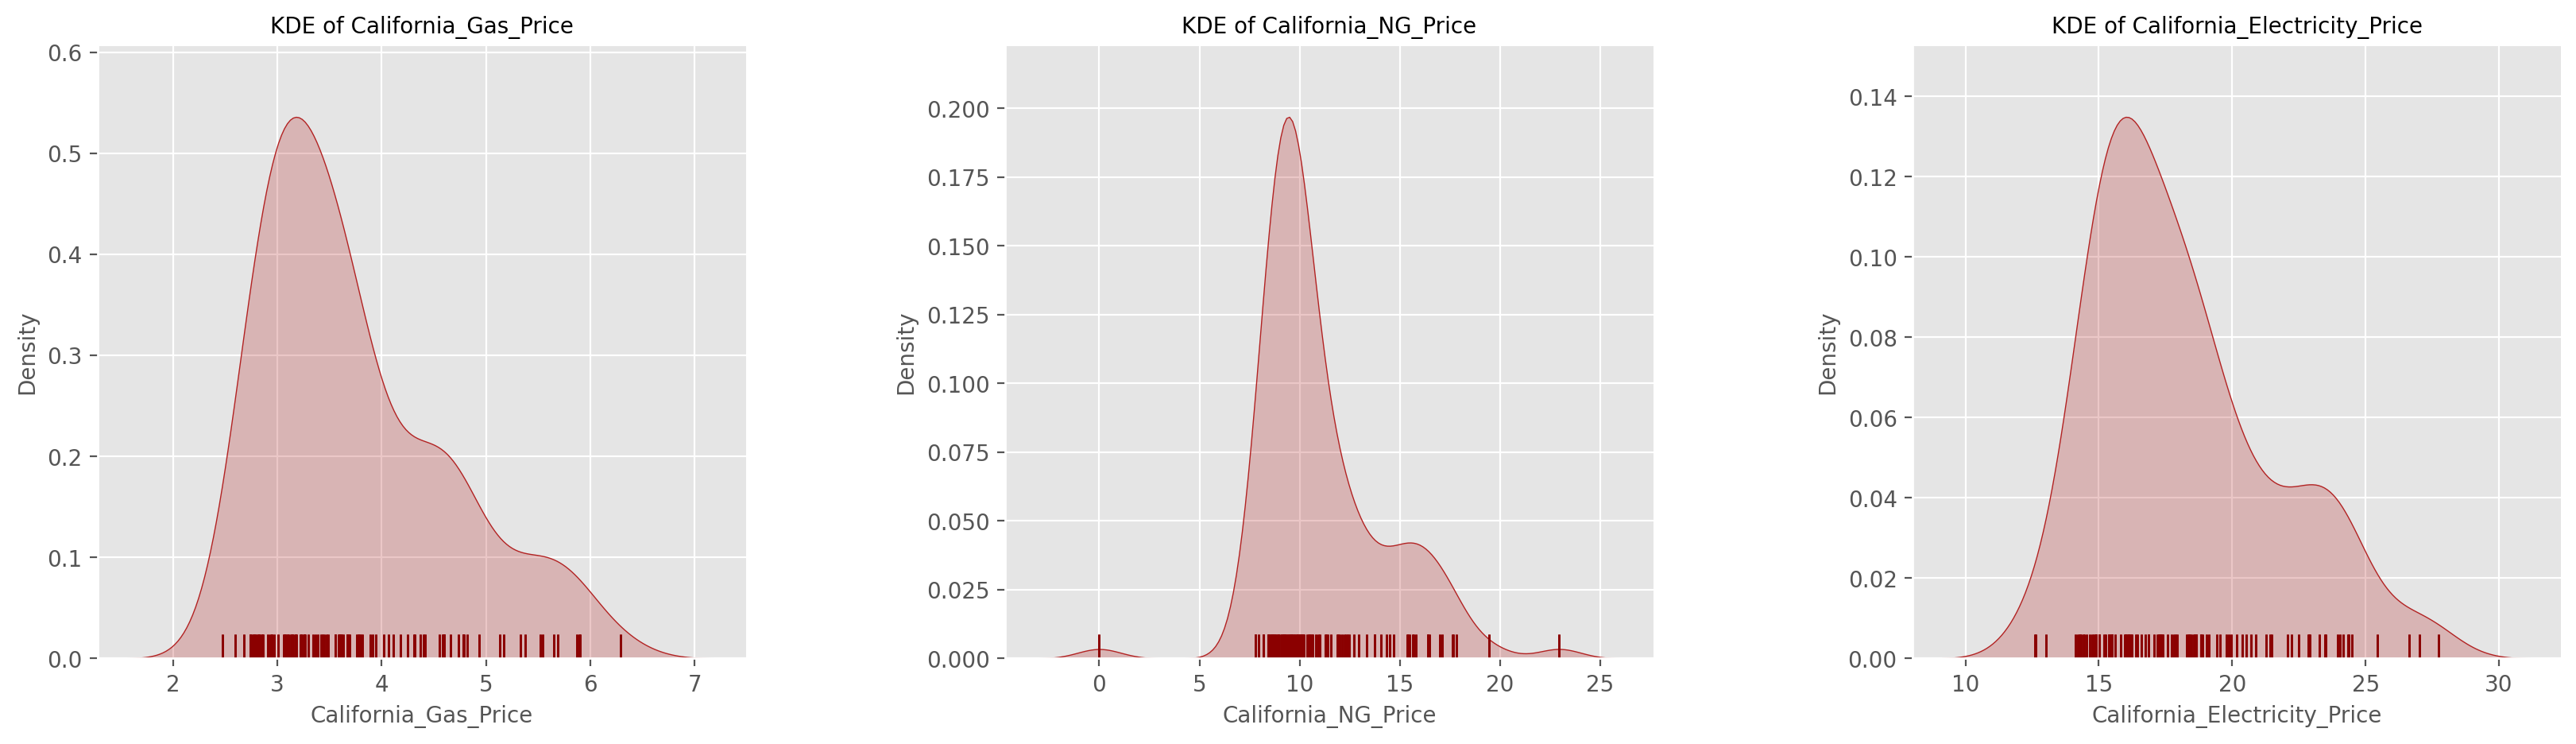

In [29]:
# KDE Plots for CA Energy Data
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(ca_energy):
    sns.kdeplot(data=input_data, x=col,
                ax=axes[i], color='firebrick', fill=True)
    sns.rugplot(input_data[col], ax=axes[i],
                color='darkred', linewidth=1, height=0.04)
    axes[i].set_title(f'KDE of {col}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


Text(0.5, 1.06, '\nPairwise Distribution of California Energy Factors\n\n')

Text(60.361111111111114, 0.5, 'California_Gas_Price')

Text(49.861111111111114, 0.5, 'California_NG_Price')

Text(49.861111111111114, 0.5, 'California_Electricity_Price')

Text(0.5, 44.61111111111103, 'California_Gas_Price')

Text(0.5, 44.61111111111103, 'California_NG_Price')

Text(0.5, 44.61111111111103, 'California_Electricity_Price')

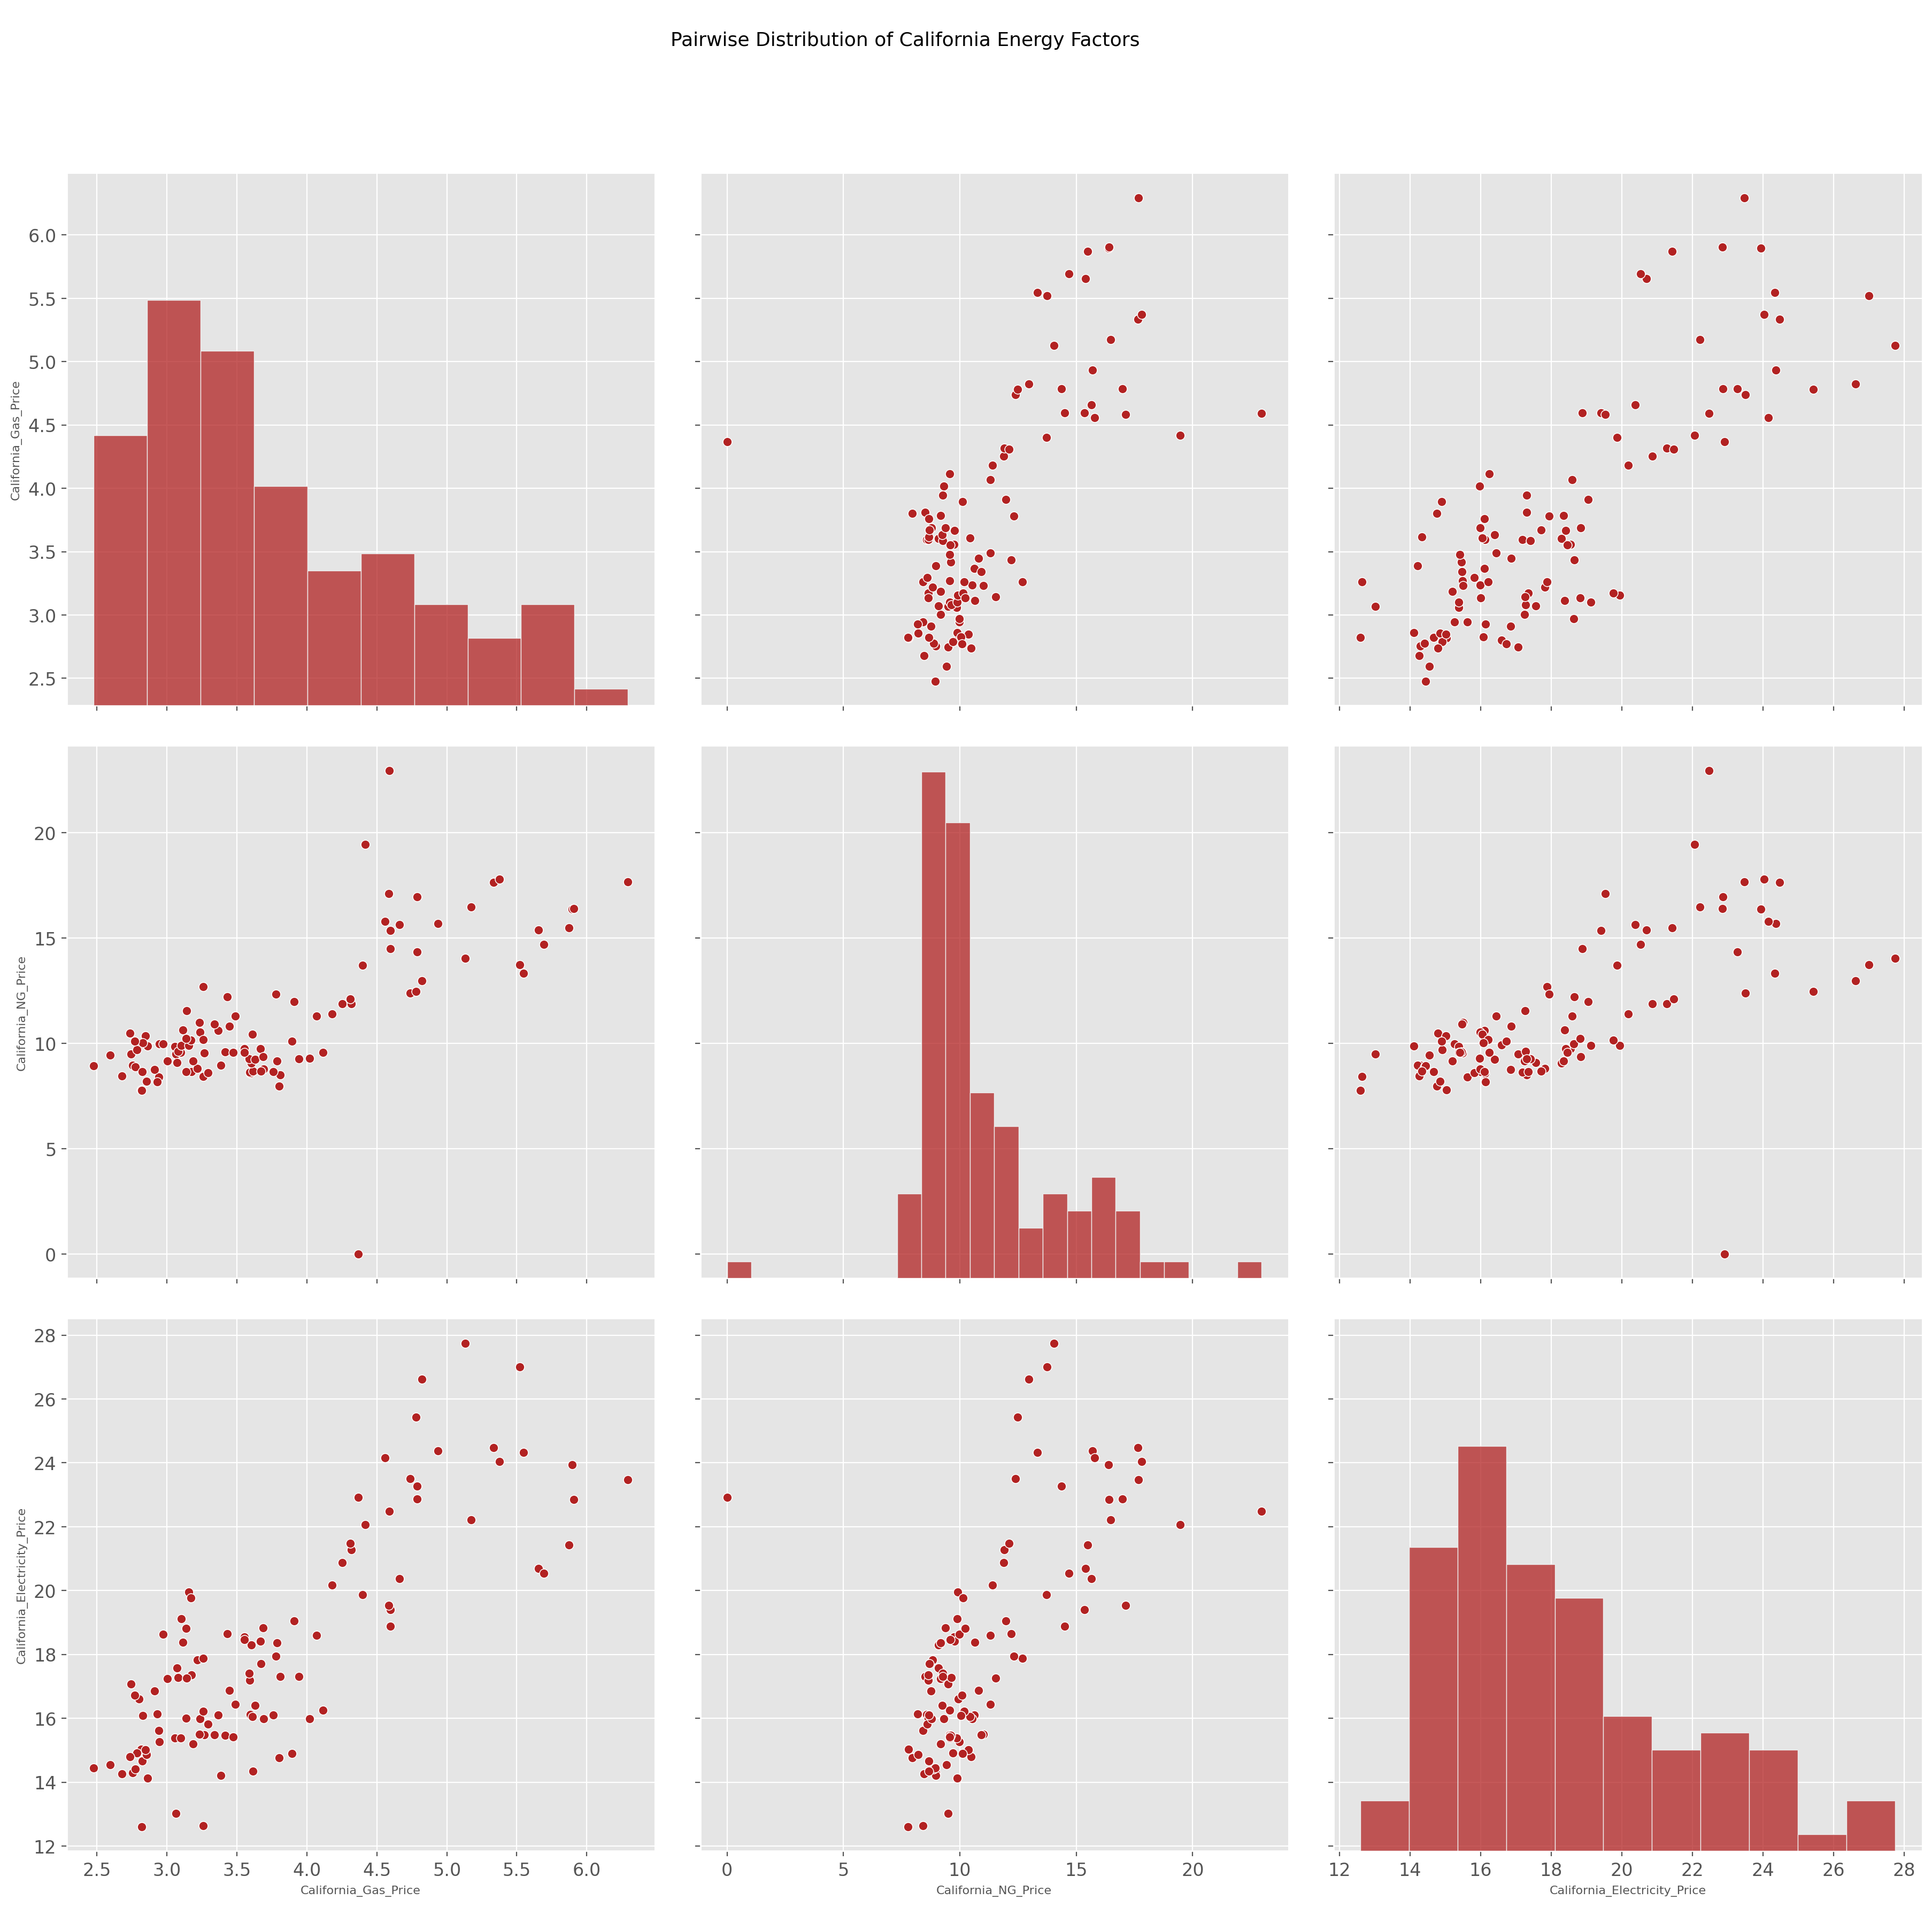

In [30]:
# Pairplot for CA Energy Data
pairplot = sns.pairplot(input_data[ca_energy], plot_kws={
                        'color': 'firebrick'}, diag_kws={'color': 'firebrick'})
pairplot.fig.suptitle(
    '\nPairwise Distribution of California Energy Factors\n\n', fontsize=13, y=1.06)
pairplot.fig.set_size_inches(20, 18)
# Adjust the font size of the leftmost y-axis labels
for i, ax in enumerate(pairplot.axes[:, 0]):
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Adjust the font size of the bottom x-axis labels
for ax in pairplot.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
plt.show()


## Summary of Data Review

The analysis of 216 monthly avocado price points spanning from January 2015 to December 2023, encompassing both organic and conventional avocados, yielded the following insights:

1. **Data Completeness:** No null values were found across all fields within the dataset.

2. **Price Stationarity:**
   - Visual inspection of price point distribution plots suggests stationarity.
   - Augmented Dickey-Fuller (ADF) Test results with a p-value of approximately 0.028, below the chosen significance level of 0.05, reject the null hypothesis, indicating that the price data is indeed stationary.

3. **Plantation Data Evaluation:**
   - Evaluation plots of plantation data from Fallbrook and Uruapan, assessed using Kernel Density Estimation (KDE) plots with automatic bandwidth selection, indicate normally distributed attributes without any outliers.

4. **Energy Data Evaluation:**
   - Similar KDE evaluation of energy data in California reveals normally distributed attributes with no identified outliers.

5. **Economic Data Correlation:**
   - Analysis of economic data using an attribute correlation heatmap reveals significant correlations between certain variables.
   - Notably, Unemployment_Level correlates highly with Unemployment_Rate; Average_Hourly_Earnings_of_All_Employees correlates with Personal_Consumption_Expenditures; and Employed_Persons_in_California correlates with Labor_Force_Participation_Rate_for_California.
   - Consequently, Unemployment_Level, Average_Hourly_Earnings_of_All_Employees, and Employed_Persons_in_California are excluded from the model development process.

6. **Economic Factors Manipulation:**
   - Economic factors are adjusted into leading indicators, implying that changes in economic factors may lag behind changes in avocado prices.
   - For example, a rise in unemployment may not immediately impact avocado prices within the same month but could affect the price changes two months later.
   - Considering this lag effect, each avocado price point incorporates economic factors not only from the month of avocado pricing but also from two months prior.


# Model Development

## Methodology and Model Development

To estimate avocado prices based on various input features, the linear regression model is commonly utilized. This model represents a linear combination of features and their respective coefficients. Advanced techniques in linear regression may involve mapping input attributes to higher-dimensional feature spaces and incorporating interaction terms to capture synergy effects. Additionally, local data fitting methods, such as locally weighted regression, can enhance model accuracy.

In the development of a linear regression model, selecting the most important features is crucial. Three commonly used feature selection techniques in linear regression are Forward Selection, Backward Elimination, and Recursive Feature Elimination. Below are descriptions of each technique:

### Forward Selection:
1. Begins with an empty set of selected features.
2. Iteratively selects the best feature to add to the selected set based on improvements in model performance.
3. Continues this process until the desired number of features is selected.

### Backward Elimination:
1. Starts with all features included in the selected features set.
2. Iteratively removes the worst-performing feature based on degradation in model performance.
3. Continues until the number of selected features reaches the minimum desired number.

### Recursive Feature Elimination:
1. Iterates through each remaining feature.
2. Adds the feature to the selected features.
3. Trains the model using the selected features.
4. Evaluates the model performance using a chosen metric.
5. If the model performance improves, updates the best score and best feature.
6. Backtracks by removing the feature to explore other features.

For this project, linear regression with feature elimination is not considered due to the simplicity of the linear regression model. While linear regression offers good interpretability compared to other regression models, its simplicity may not effectively model the complex nonlinear relationships inherent in avocado prices. Instead, regression trees and random forest models will be developed using 80% of the input data for training. The remaining 20% of the data will be used to evaluate the performance of the regression tree and random forest models.


# Part II: Model Development

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score


In [32]:
# Set plotting styles and configurations

# Set the plot style to 'ggplot' for consistent visual style
plt.style.use('ggplot')

# Configure matplotlib parameters to remove right and top spines, and set figure size
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]

# Set font size for plot labels and titles
rcParams['font.size'] = 12

# Set tick label sizes for both x and y axes
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Define custom colors for seaborn plots
custom_colors = ['#74a09e', '#86c1b2', '#98e2c6',
                 '#f3c969', '#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)

# Configure inline figure format for high-resolution displays
%config InlineBackend.figure_format = 'retina'

# Disable Jedi for auto-completion to potentially improve performance in large notebooks
%config Completer.use_jedi = False


In [33]:
# Load data and preprocess

# Set random seed for reproducibility
np.random.seed(42)

# Load data from Excel file into DataFrame
Input_Data = pd.read_excel('Data_project.xls')


# Columns to remove from the dataset
Remove_Col = ['Unemployment_Level', 'Average_Hourly_Earnings_of_All_Employees',
              'Employed_Persons_in_California', 'Unemployment_Level_Lead2',
              'Average_Hourly_Earnings_of_All_Employees_Lead2', 'Employed_Persons_in_California_Lead2']

# Filter columns to retain only those not in Remove_Col
filtered_columns = [col for col in Input_Data.columns if col not in Remove_Col]
filtered_input = Input_Data[filtered_columns]

# Split the filtered data into features (X) and labels (y)
features, labels = filtered_input.iloc[:, 1:31], filtered_input.iloc[:, 32]

# Split the data into training and testing sets using a 80%-20% split ratio
Xtrain, Xtest, ytrain, ytest = train_test_split(
    features, labels, test_size=0.2, shuffle=True, random_state=6)


In [34]:
Input_Data

Year_Month  Year  Month  Is_Organic  Unemployment_Level  \
0        201501  2015      1           0                8885   
1        201501  2015      1           1                8885   
2        201502  2015      2           0                8599   
3        201502  2015      2           1                8599   
4        201503  2015      3           0                8515   
..          ...   ...    ...         ...                 ...   
211      202310  2023     10           1                6443   
212      202311  2023     11           0                6262   
213      202311  2023     11           1                6262   
214      202312  2023     12           0                6268   
215      202312  2023     12           1                6268   

     Unemployment_Level_Lead2  Unemployment_Rate  Unemployment_Rate_Lead2  \
0                        9090                5.7                      5.8   
1                        9090                5.7                      5.8   
2                        8717                5.5                      5.6   
3                        8717                5.5                      5.6   
4                        8885                5.4                      5.7   
..                        ...                ...                      ...   
211                      6340                3.8                      3.8   
212                      6347                3.7                      3.8   
213                      6347                3.7                      3.8   
214                      6443                3.7                      3.8   
215                      6443                3.7                      3.8   

     Median_Consumer_Price_Index  Median_Consumer_Price_Index_Lead2  \
0                       1.947530                           2.256311   
1                       1.947530                           2.256311   
2                       1.954495                           2.383394   
3                       1.954495                           2.383394   
4                       2.433336                           1.947530   
..                           ...                                ...   
211                     3.497958                           4.358972   
212                     5.122615                           5.217921   
213                     5.122615                           5.217921   
214                     4.160125                           3.497958   
215                     4.160125                           3.497958   

     Personal_Consumption_Expenditures  \
0                              12066.7   
1                              12066.7   
2                              12116.6   
3                              12116.6   
4                              12176.1   
..                                 ...   
211                            18826.8   
212                            18903.0   
213                            18903.0   
214                            19013.7   
215                            19013.7   

     Personal_Consumption_Expenditures_Lead2  \
0                                    12083.9   
1                                    12083.9   
2                                    12096.1   
3                                    12096.1   
4                                    12066.7   
..                                       ...   
211                                  18651.6   
212                                  18791.5   
213                                  18791.5   
214                                  18826.8   
215                                  18826.8   

     Number_Unemployed_for_27_Weeks_&_over  \
0                                     2774   
1                                     2774   
2                                     2658   
3                                     2658   
4                                     2542   
..                                     ...   
211                                   1291   
212     

## Classification And Regression Tree

In [35]:
# Decision Tree parameter tuning with cross-validation

# Define a list of minimum samples per leaf to evaluate
min_sample_leaf = [i * 3 + 3 for i in range(10)]

# Lists to store mean R2 scores and their standard deviations
CART_r2 = []
std_CART_r2 = []

# Iterate over each value of min_samples_leaf
for num_sample in min_sample_leaf:
    # Initialize DecisionTreeRegressor with specified parameters
    DT_CV = DecisionTreeRegressor(random_state=42, min_samples_leaf=num_sample)

    # Perform cross-validation with 5 folds, using R2 as the scoring metric
    scores = cross_val_score(DT_CV, Xtrain, ytrain, cv=5, scoring='r2')

    # Append mean R2 score to CART_r2 list
    CART_r2.append(np.mean(scores))

    # Append standard deviation of R2 scores to std_CART_r2 list
    std_CART_r2.append(np.std(scores))

# Calculate upper and lower bounds of R2 scores for plotting error bars
R2_upper = np.array(CART_r2) + np.array(std_CART_r2)
R2_lower = np.array(CART_r2) - np.array(std_CART_r2)


<Figure size 1600x800 with 0 Axes>

Text(0.5, 0, 'Num of min_samples_leaf')

Text(0, 0.5, 'r2')

Text(2.2, 0.5419641857669162, '(3, 0.572)')

Text(5.2, 0.5951415027286562, '(6, 0.625)')

Text(8.2, 0.5744076206926568, '(9, 0.604)')

Text(11.2, 0.6041838217547283, '(12, 0.634)')

Text(14.2, 0.62274187411659, '(15, 0.653)')

Text(17.2, 0.5975570493749578, '(18, 0.628)')

Text(20.2, 0.5803802210871718, '(21, 0.610)')

Text(23.2, 0.5628477522088877, '(24, 0.593)')

Text(26.2, 0.5509404413896395, '(27, 0.581)')

Text(29.2, 0.5582629796903819, '(30, 0.588)')

(0.3, 1.0)

Text(0.5, 1.0, 'Result of 5-fold CV')

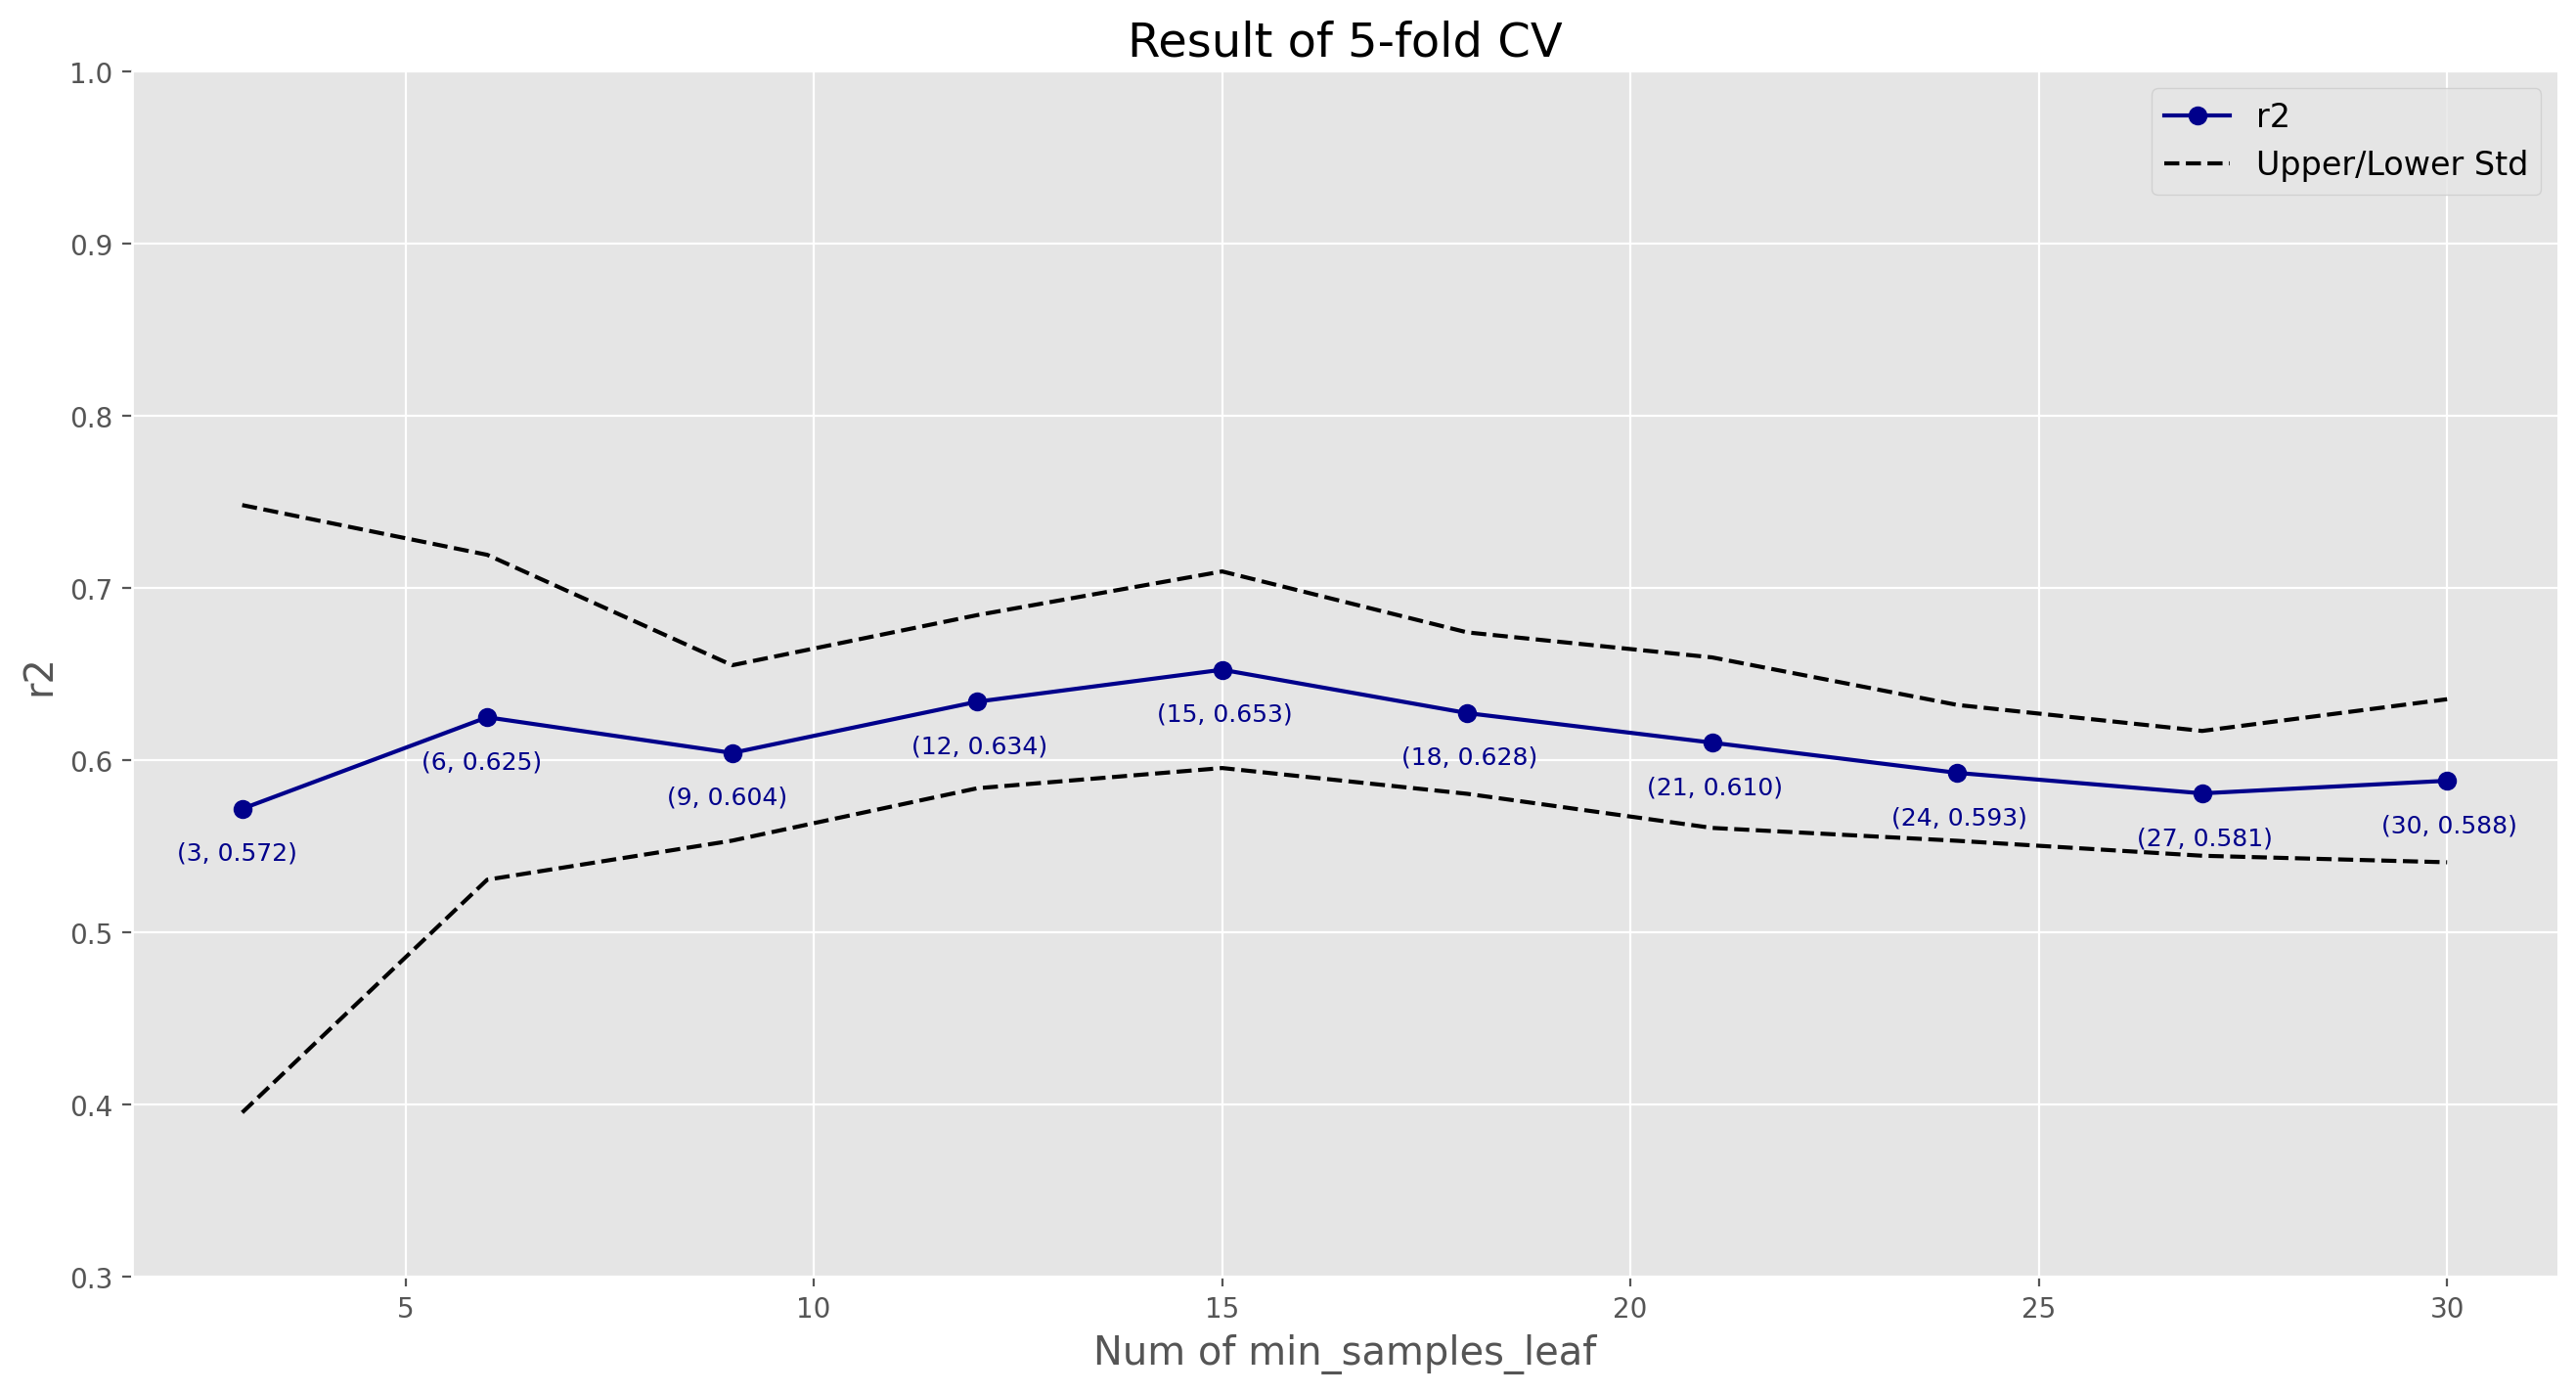

In [36]:
# Plotting CV results

# Set figure size
plt.figure(figsize=(16, 8))

# Plot mean R2 scores against min_samples_leaf
plt.plot(min_sample_leaf, CART_r2, marker='o', label='r2', color='darkblue')

# Plot upper and lower bounds for standard deviation of R2 scores
plt.plot(min_sample_leaf, R2_upper, linestyle='--',
         color='black', label='Upper/Lower Std')
plt.plot(min_sample_leaf, R2_lower, linestyle='--', color='black')

# Label x-axis and y-axis
plt.xlabel('Num of min_samples_leaf')
plt.ylabel('r2')

# Add text annotations for each point on the plot
for x, y in zip(min_sample_leaf, CART_r2):
    plt.text(x - 0.8, y - 0.03, f'({x}, {y:.3f})',
             ha='left', fontsize=9, color='darkblue')

# Set y-axis limits
plt.ylim(0.3, 1.0)

# Set plot title
plt.title('Result of 5-fold CV')

# Display legend in upper right corner
plt.legend(loc='upper right')

# Show the plot
plt.show()


DecisionTreeRegressor(min_samples_leaf=15, random_state=42)

<Figure size 2000x1000 with 0 Axes>

[Text(0.375, 0.9166666666666666, 'Is_Organic <= 0.5\nsquared_error = 0.13\nsamples = 172\nvalue = 1.503'),
 Text(0.16666666666666666, 0.75, 'Personal_Consumption_Expenditures_Lead2 <= 13072.9\nsquared_error = 0.042\nsamples = 89\nvalue = 1.234'),
 Text(0.08333333333333333, 0.5833333333333334, 'squared_error = 0.027\nsamples = 23\nvalue = 1.027'),
 Text(0.25, 0.5833333333333334, 'Dew_point_temperature_Fallbrook <= 13.664\nsquared_error = 0.026\nsamples = 66\nvalue = 1.306'),
 Text(0.16666666666666666, 0.4166666666666667, 'Federal_Funds_Effective_Rate <= 1.155\nsquared_error = 0.019\nsamples = 48\nvalue = 1.257'),
 Text(0.08333333333333333, 0.25, 'squared_error = 0.015\nsamples = 18\nvalue = 1.36'),
 Text(0.25, 0.25, 'Number_Unemployed_for_27_Weeks_&_over_Lead2 <= 1289.0\nsquared_error = 0.011\nsamples = 30\nvalue = 1.196'),
 Text(0.16666666666666666, 0.08333333333333333, 'squared_error = 0.009\nsamples = 15\nvalue = 1.237'),
 Text(0.3333333333333333, 0.08333333333333333, 'squared_error 

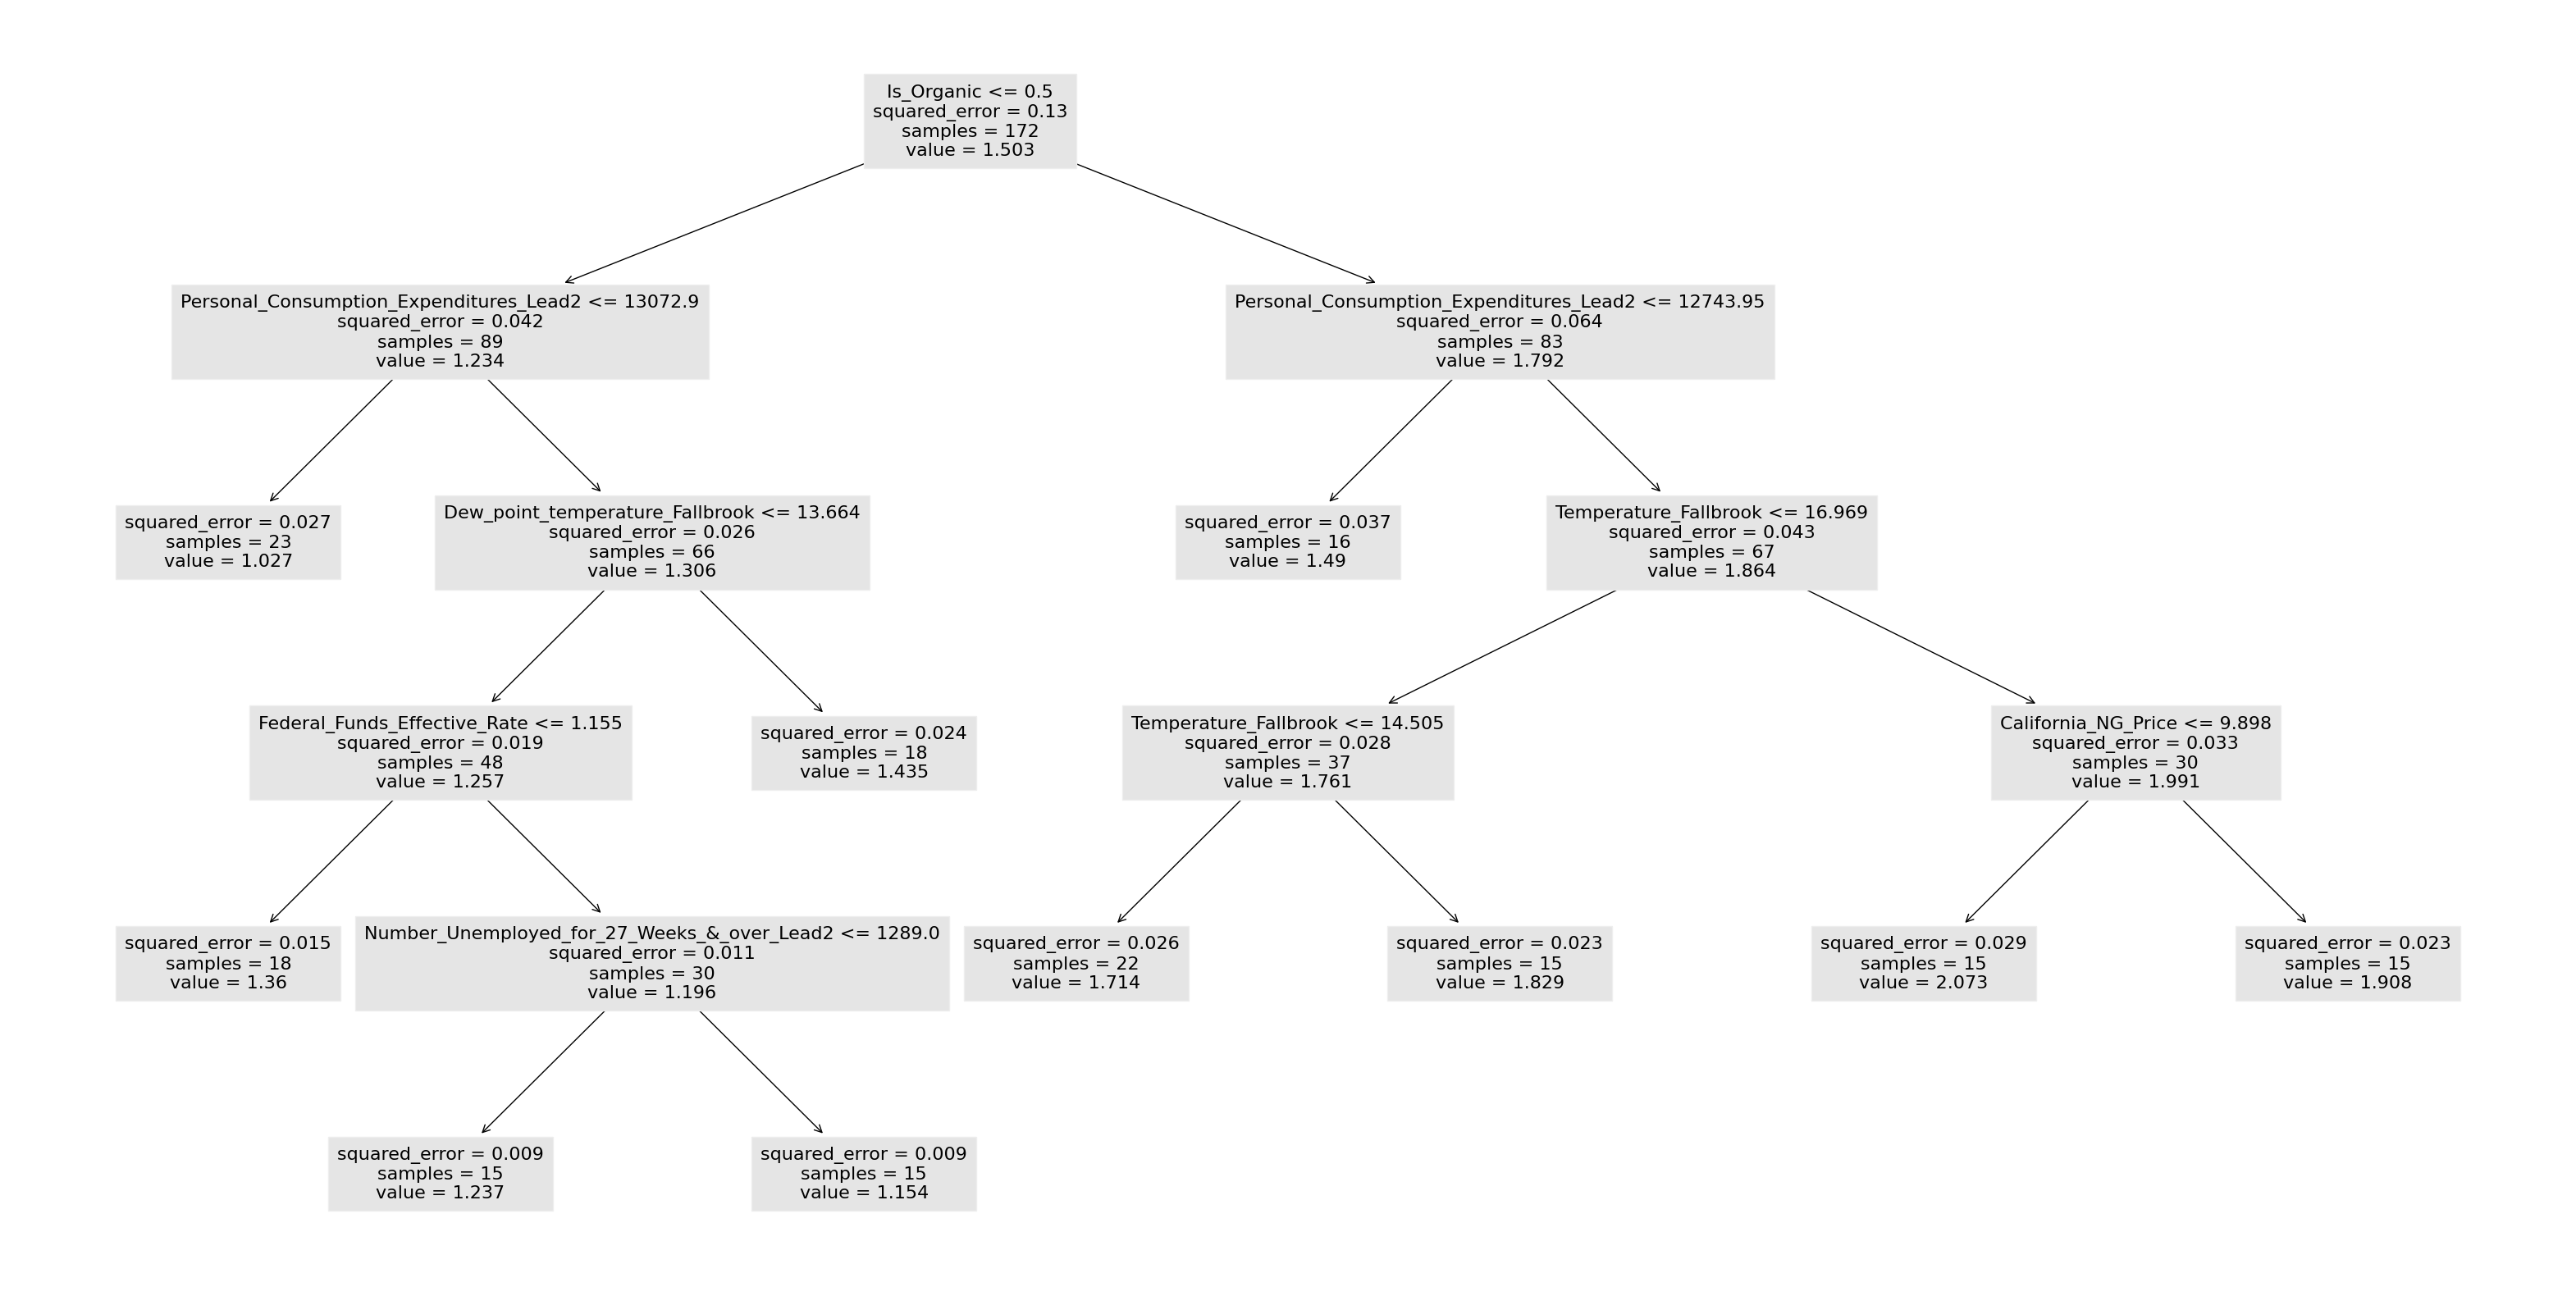

In [37]:
# Visualize the Decision Tree

# Initialize DecisionTreeRegressor with specified parameters
clf_CART = DecisionTreeRegressor(random_state=42, min_samples_leaf=15)

# Fit the Decision Tree model on training data
clf_CART.fit(Xtrain, ytrain)

# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(clf_CART, filled=False, feature_names=features.columns, fontsize=8)

# Display the plot
plt.show()


In [38]:
# Evaluate Decision Tree performance

# Predict on training and testing data
y_pred_train = clf_CART.predict(Xtrain)
y_pred_test = clf_CART.predict(Xtest)

# Calculate R2 scores for training and testing data
r2_train = r2_score(ytrain, y_pred_train)
r2_test = r2_score(ytest, y_pred_test)

# Print the R2 scores
print(f"R2 score on training data: {r2_train:.3f}")
print(f"R2 score on testing data: {r2_test:.3f}")


R2 score on training data: 0.827
R2 score on testing data: 0.589


In [39]:
# Calculate feature importances from the Decision Tree model
feature_importances = clf_CART.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': Xtrain.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False)

# Select the top 10 most important features
feature_importance_df = feature_importance_df.head(10)

# Display the DataFrame with the top 10 important features
feature_importance_df


Feature  Importance
2                                Is_Organic    0.723765
8   Personal_Consumption_Expenditures_Lead2    0.169634
24                    Temperature_Fallbrook    0.053859
29          Dew_point_temperature_Fallbrook    0.022358
11             Federal_Funds_Effective_Rate    0.016434
16                      California_NG_Price    0.011114
10  Number_Unemployed_for_27_Weeks_&_ove...    0.002836
27                     Wind_Speed_Fallbrook    0.000000
26                       Humidity_Fallbrook    0.000000
25             Sea_Level_Pressure_Fallbrook    0.000000

<Figure size 1400x600 with 0 Axes>

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, '')

Text(0.5, 1.0, '\nRegression Tree - Feature Importances (Top 10)')

Text(0.7337654938220523, 0.0, '0.724')

Text(0.17963381251014426, 1.0, '0.170')

Text(0.06385899591104413, 2.0, '0.054')

Text(0.032357560687732774, 3.0, '0.022')

Text(0.0264338995490829, 4.0, '0.016')

Text(0.02111378930348659, 5.0, '0.011')

Text(0.012836448216457136, 6.0, '0.003')

Text(0.01, 7.0, '0.000')

Text(0.01, 8.0, '0.000')

Text(0.01, 9.0, '0.000')

(0.0, 1.0)

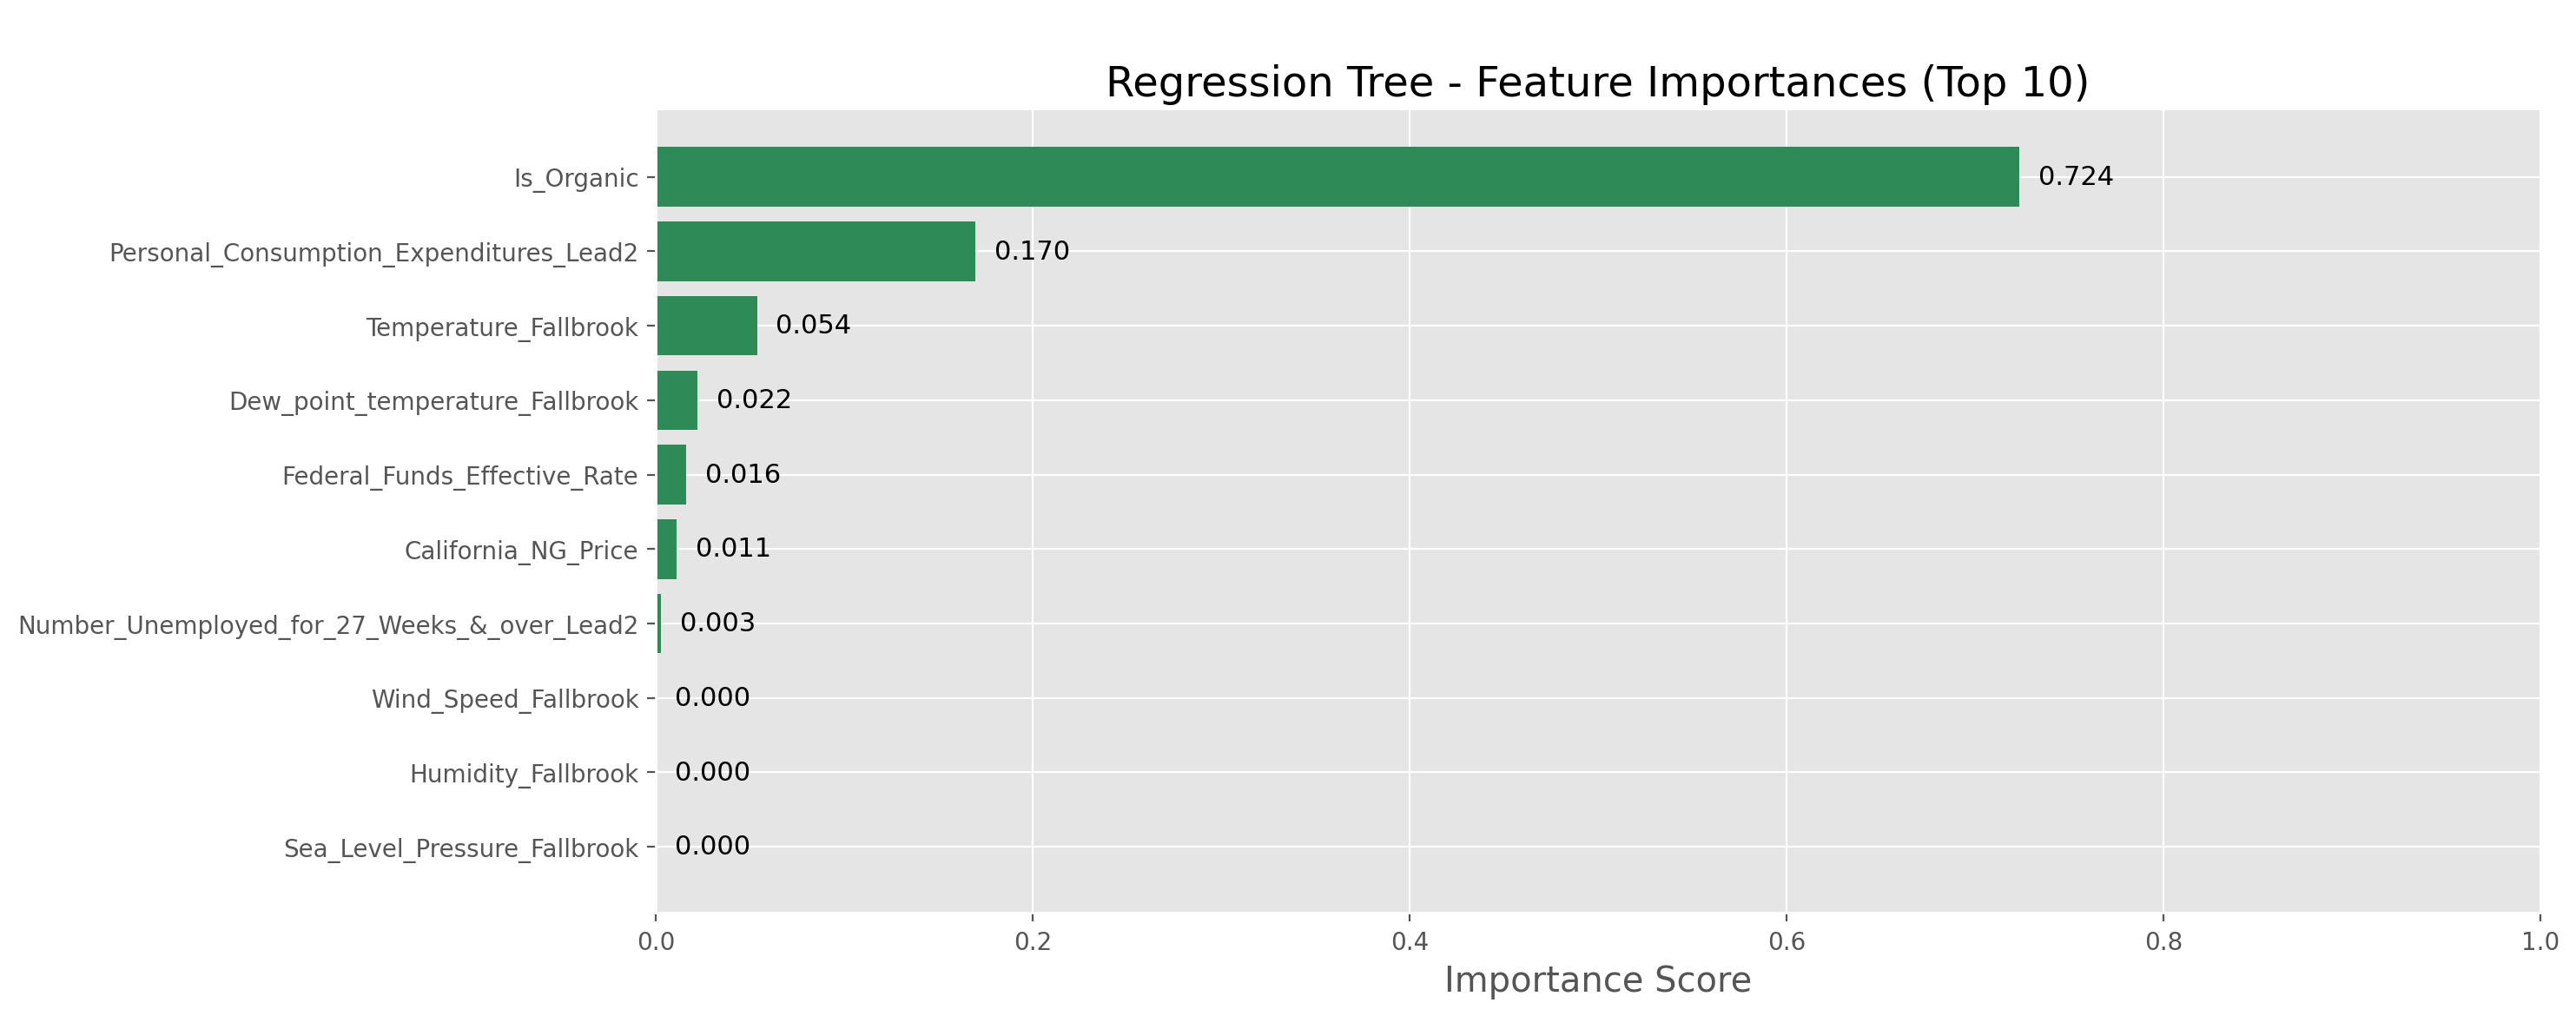

In [40]:
# Plotting the feature importances
plt.figure(figsize=(14, 6))

# Create horizontal bars for each feature, using importance scores as bar lengths
bars = plt.barh(feature_importance_df['Feature'],
                feature_importance_df['Importance'], color='seagreen')

# Set labels and title
plt.xlabel('Importance Score')
plt.ylabel('')
plt.title('\nRegression Tree - Feature Importances (Top 10)')

# Add text annotations showing the numerical value of each importance score next to its corresponding bar
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{importance:.3f}',
             va='center', ha='left', fontsize=11)

# Set limits and invert y-axis for better visualization
plt.xlim(0, 1)
plt.gca().invert_yaxis()

# Display the plot
plt.show()


## Random Forest

In [41]:
# Define lists of values for n_estimators and min_samples_leaf
# Generates values: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
num_sample = [i * 3 + 3 for i in range(10)]
# Generates values: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
num_tree = [i * 20 + 40 for i in range(10)]

# Define the parameter grid for Random Forest tuning
param_grid = {
    'n_estimators': num_tree,
    'min_samples_leaf': num_sample
}

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print(best_params)

# Convert grid search CV results into a DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

cv_results_df

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [3, 6, 9, 12, 15, 18, 21, 24, 27,
                                              30],
                         'n_estimators': [40, 60, 80, 100, 120, 140, 160, 180,
                                          200, 220]},
             scoring='r2')

{'min_samples_leaf': 3, 'n_estimators': 60}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.138444      0.001909         0.005966        0.000355   
1        0.212894      0.013818         0.007717        0.000883   
2        0.277188      0.011394         0.008253        0.000387   
3        0.342243      0.011323         0.012151        0.005294   
4        0.399282      0.001221         0.010707        0.000909   
..            ...           ...              ...             ...   
95       0.632766      0.020513         0.019193        0.005723   
96       0.493477      0.135966         0.016462        0.005966   
97       0.412797      0.009213         0.013629        0.000560   
98       0.454056      0.013071         0.014602        0.000716   
99       0.460707      0.056915         0.018209        0.008494   

   param_min_samples_leaf param_n_estimators  \
0                       3                 40   
1                       3                 60   
2                       3                 80   
3                       3                100   
4                       3                120   
..                    ...                ...   
95                     30                140   
96                     30                160   
97                     30                180   
98                     30                200   
99                     30                220   

                                     params  split0_test_score  \
0   {'min_samples_leaf': 3, 'n_estimator...           0.783895   
1   {'min_samples_leaf': 3, 'n_estimator...           0.792452   
2   {'min_samples_leaf': 3, 'n_estimator...           0.798336   
3   {'min_samples_leaf': 3, 'n_estimator...           0.799995   
4   {'min_samples_leaf': 3, 'n_estimator...           0.803332   
..                                      ...                ...   
95  {'min_samples_leaf': 30, 'n_estimato...           0.598694   
96  {'min_samples_leaf': 30, 'n_estimato...           0.599455   
97  {'min_samples_leaf': 30, 'n_estimato...           0.598365   
98  {'min_samples_leaf': 30, 'n_estimato...           0.599055   
99  {'min_samples_leaf': 30, 'n_estimato...           0.599012   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.768727           0.841186           0.749061   
1            0.766091           0.839555           0.753848   
2            0.766719           0.829675           0.754325   
3            0.764629           0.828543           0.753067   
4            0.765748           0.829903           0.750270   
..                ...                ...                ...   
95           0.598064           0.530462           0.607146   
96           0.597967           0.529536           0.607649   
97           0.598452           0.528730           0.608180   
98           0.598213           0.528509           0.608461   
99           0.598459           0.528422           0.608457   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.779108         0.784395        0.030814                4  
1            0.778245         0.786038        0.029665                1  
2            0.771234         0.784058        0.026959                5  
3            0.776010         0.784449        0.026962                3  
4            0.774298         0.784710        0.028437                2  
..                ...              ...             ...              ...  
95           0.550422         0.576958        0.030644               92  
96           0.550328         0.576987        0.031136               90  
97           0.550303         0.576806        0.031405               95  
98           0.550340         0.576916        0.031586               93  
99           0.550437         0.576958        0.031623               91  

[100 rows x 15 columns]

<Figure size 1300x800 with 0 Axes>

<Axes: xlabel='param_n_estimators', ylabel='param_min_samples_leaf'>

Text(0.5, 1.0, 'r2 Score Matrix')

Text(0.5, 58.7222222222222, 'n_estimators')

Text(133.22222222222223, 0.5, 'min_samples_leaf')

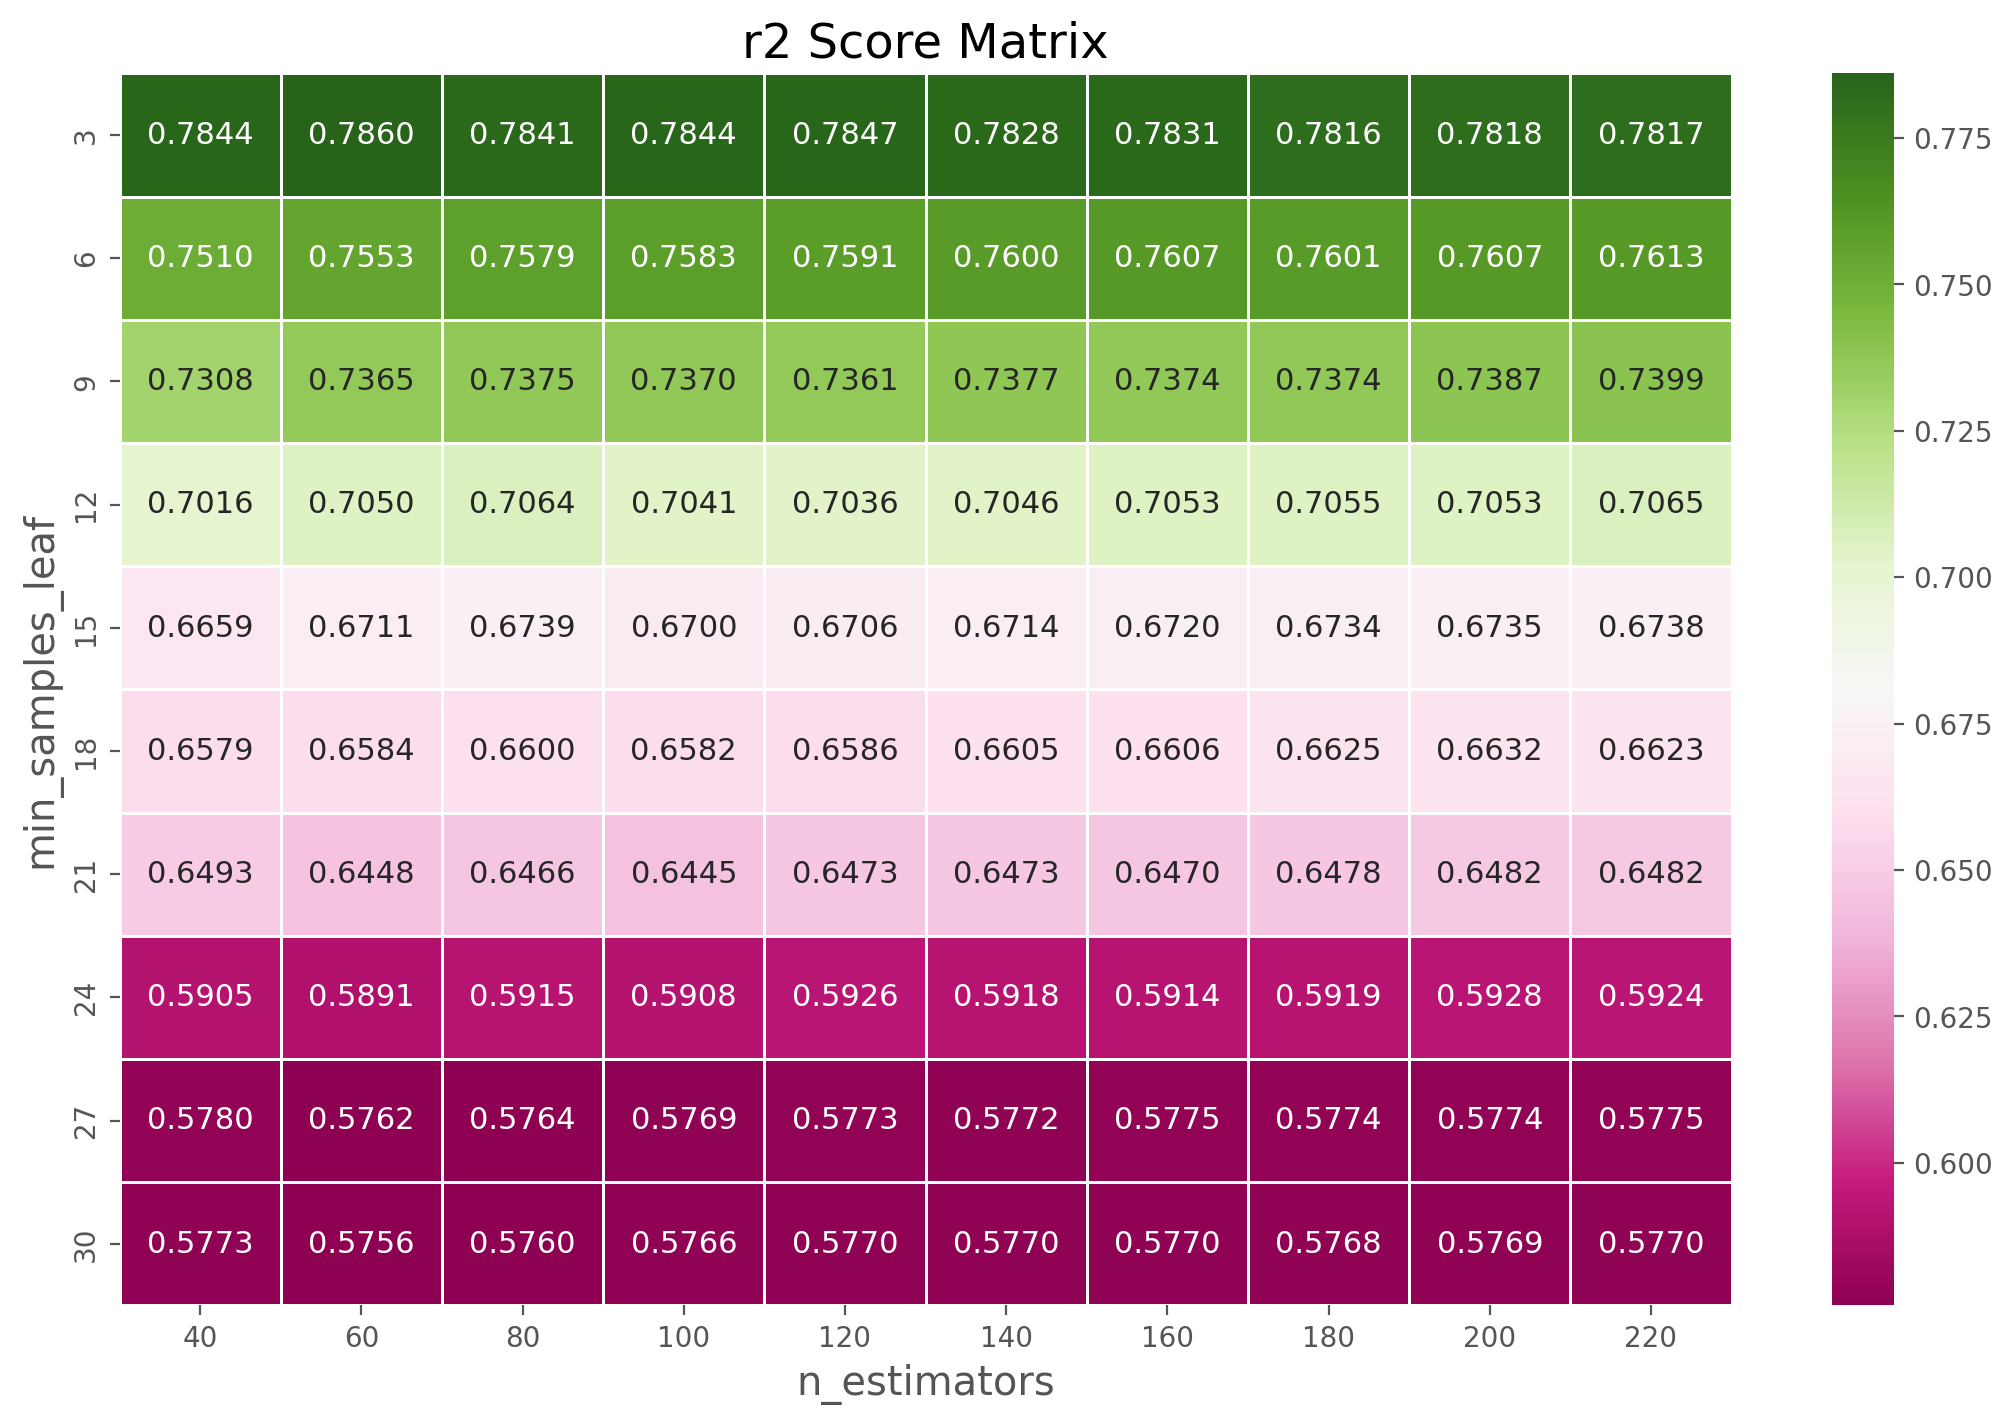

In [42]:
# Pivot the DataFrame to create a matrix for heatmap visualization
matrix_df = cv_results_df.pivot(
    index='param_min_samples_leaf', columns='param_n_estimators', values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(matrix_df, annot=True, fmt='.4f', cmap='PiYG',
            cbar=True, linewidths=0.5, annot_kws={'fontsize': 11})
plt.title('r2 Score Matrix')
plt.xlabel('n_estimators')
plt.ylabel('min_samples_leaf')
plt.show()


In [43]:
# Train Random Forest with best parameters obtained from GridSearchCV
rf_model_organic = RandomForestRegressor(
    random_state=42, min_samples_leaf=3, n_estimators=60)
rf_model_organic.fit(Xtrain, ytrain)

# Evaluate Random Forest performance on training data
y_pred_train = rf_model_organic.predict(Xtrain)
r2_train = r2_score(ytrain, y_pred_train)
print(f"R2 score on training data: {r2_train:.3f}")

# Evaluate Random Forest performance on testing data
y_pred_test = rf_model_organic.predict(Xtest)
r2_test = r2_score(ytest, y_pred_test)
print(f"R2 score on testing data: {r2_test:.3f}")


RandomForestRegressor(min_samples_leaf=3, n_estimators=60, random_state=42)

R2 score on training data: 0.947
R2 score on testing data: 0.798


In [44]:
# Calculate feature importances and their standard deviations
feature_importances = rf_model_organic.feature_importances_
std_importances = np.std(
    [tree.feature_importances_ for tree in rf_model_organic.estimators_], axis=0)

# Create a DataFrame to store feature importances and standard deviations
feature_importance_df = pd.DataFrame({
    'Feature': Xtrain.columns,
    'Importance': feature_importances,
    'Std': std_importances
})

# Sort the DataFrame by Importance in descending order and select the top 10 features
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False).head(10)
feature_importance_df


Feature  Importance       Std
2                                Is_Organic    0.615962  0.037595
8   Personal_Consumption_Expenditures_Lead2    0.092856  0.065031
24                    Temperature_Fallbrook    0.036723  0.033703
17             California_Electricity_Price    0.035480  0.053240
7         Personal_Consumption_Expenditures    0.032084  0.043673
22                       Visibility_Uruapan    0.017089  0.021050
29          Dew_point_temperature_Fallbrook    0.015214  0.022278
25             Sea_Level_Pressure_Fallbrook    0.014365  0.020864
15                     California_Gas_Price    0.014084  0.019424
1                                     Month    0.009497  0.024624

<Figure size 1400x600 with 0 Axes>

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Random Forest - Feature Importances (Top 10)')

Text(0.62596167516308, 0.0, '0.616')

Text(0.10285616137000084, 1.0, '0.093')

Text(0.04672286004637596, 2.0, '0.037')

Text(0.04547997856799104, 3.0, '0.035')

Text(0.042083941691795815, 4.0, '0.032')

Text(0.02708858774320544, 5.0, '0.017')

Text(0.025214405504405513, 6.0, '0.015')

Text(0.024364713078400345, 7.0, '0.014')

Text(0.02408448245406839, 8.0, '0.014')

Text(0.019496988264817425, 9.0, '0.009')

(0.0, 1.0)

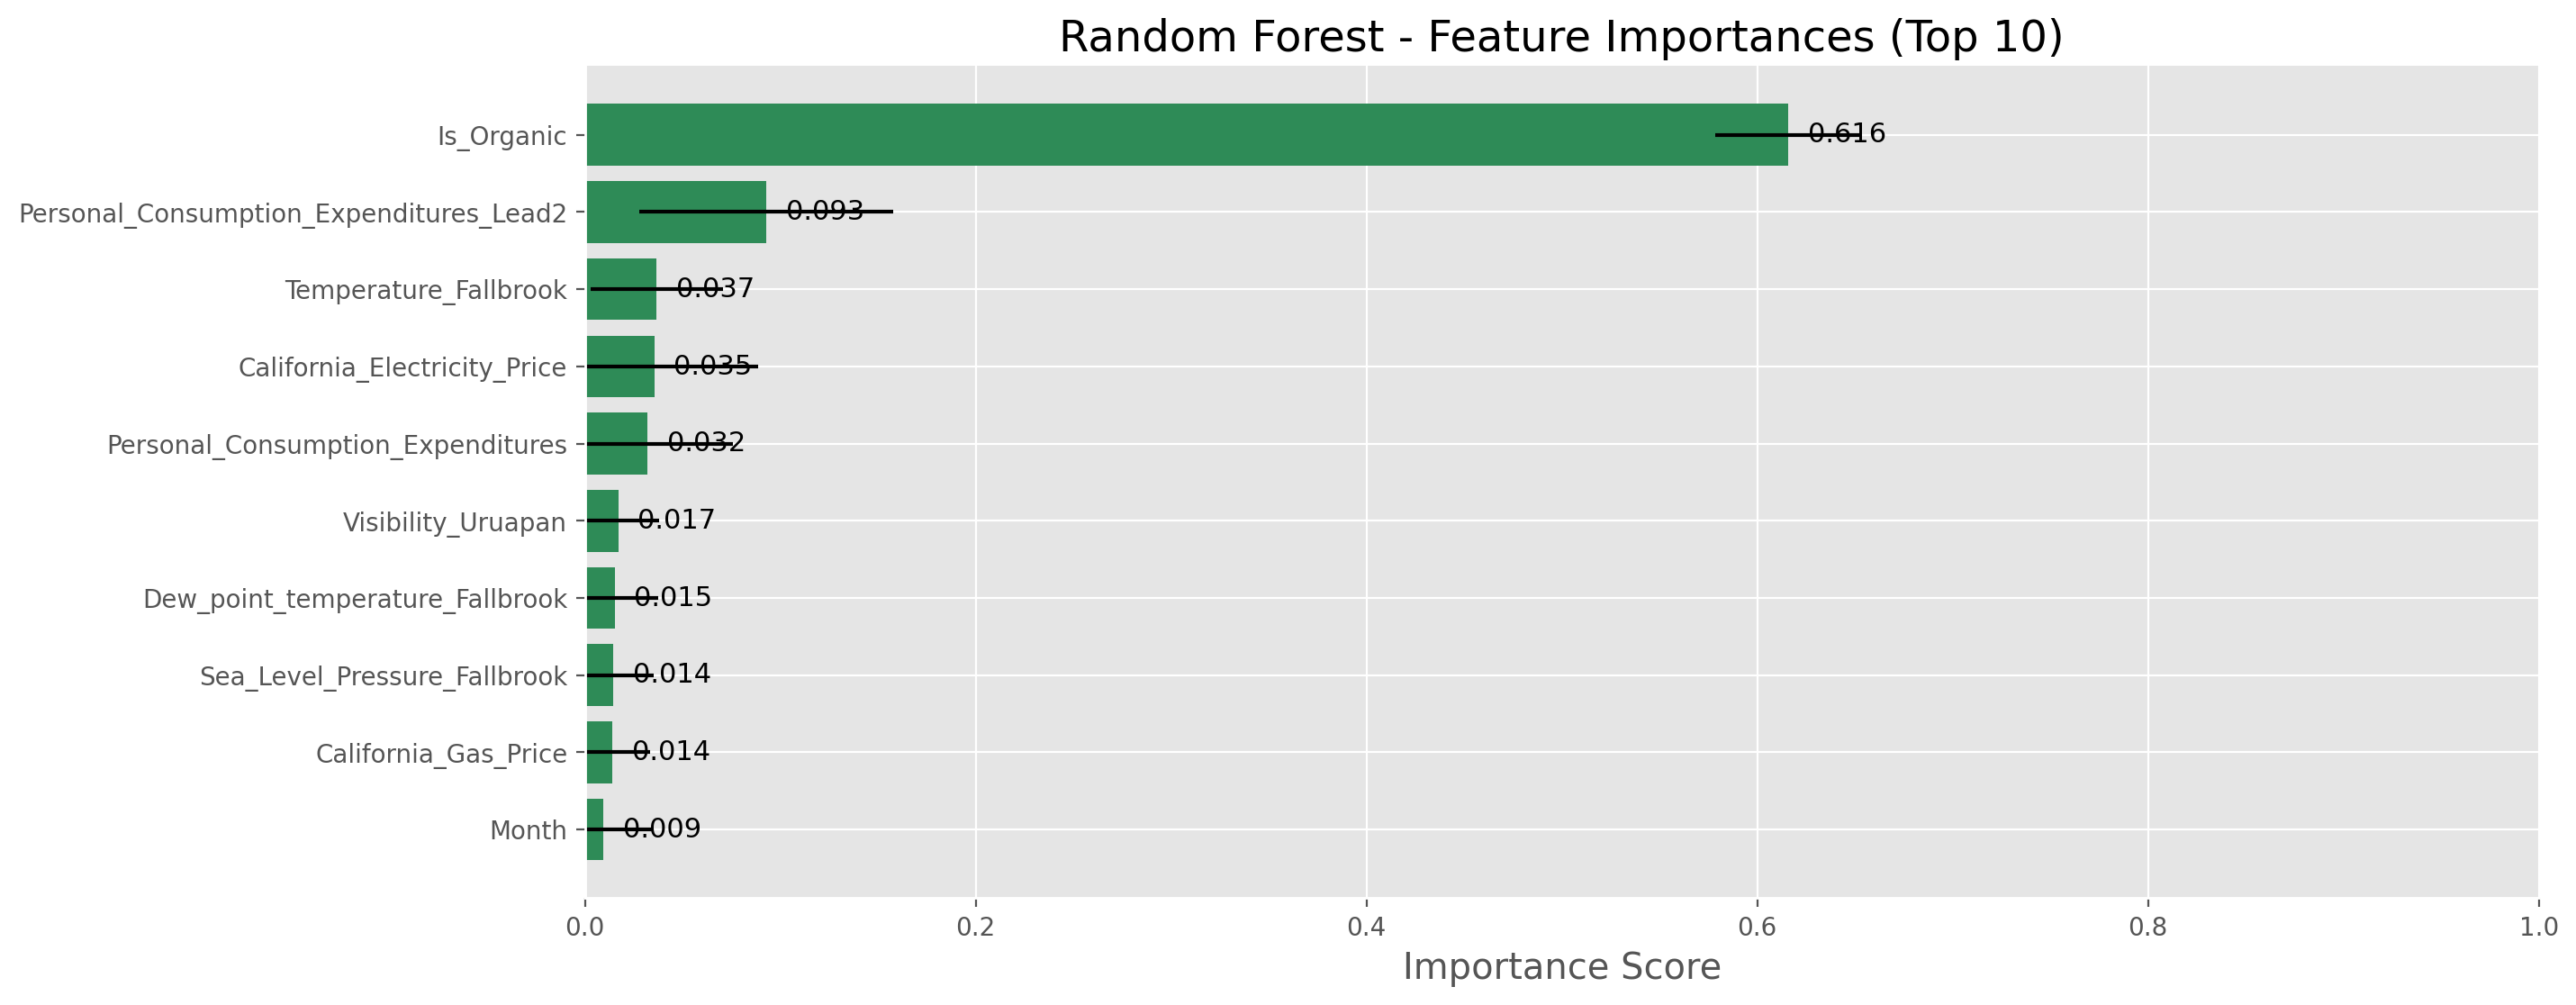

In [45]:
# Plotting the top 10 feature importances with error bars representing standard deviations
plt.figure(figsize=(14, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],
                xerr=feature_importance_df['Std'], color='seagreen')
plt.xlabel('Importance Score')
plt.ylabel('')
plt.title('Random Forest - Feature Importances (Top 10)')

# Adding text annotations for each bar showing the importance score
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{importance:.3f}',
             va='center', ha='left', fontsize=11)

plt.xlim(0, 1)  # Setting x-axis limit from 0 to 1
# Inverting y-axis to display the most important feature on top
plt.gca().invert_yaxis()
plt.show()  # Display the plot


# Conclusion

This project aimed to compare and evaluate the performance of two regression models—Regression Tree and Random Forest—for predicting avocado prices. Each model was rigorously assessed using a comprehensive dataset, with a focus on interpretability, generalizability, and feature importance.

**Regression Tree Analysis**

The Regression Tree model, while intuitive and capable of capturing complex relationships, demonstrated limitations in generalizing to unseen data. The model achieved a training $R^2$ score of 0.827, indicating a good fit to the training dataset. However, its testing $R^2$ score of 0.589 suggested a considerable drop in performance on new data, highlighting its susceptibility to overfitting.

**Random Forest Analysis**

In contrast, the Random Forest model addressed the overfitting issue by aggregating predictions from multiple decision trees. Tuned through grid search cross-validation, the optimal configuration of $\text{min_samples_leaf} = 3$ and $\text{n_estimators} = 60$ yielded robust results. The Random Forest achieved a high training $R^2$ score of 0.947 and a testing $R^2$ score of 0.798, showcasing superior generalizability and less sensitivity to overfitting compared to the Regression Tree.

**Feature Importance Insights**

Feature importance analysis revealed key drivers influencing avocado prices. Organic designation significantly impacted prices, aligning with consumer preferences for higher-priced organic produce. Changes in personal consumption expenditures influenced prices with a two-month lag, highlighting economic factors' delayed impact on avocado markets. Additionally, local weather conditions and electricity prices in California played minor yet discernible roles in price fluctuations.

**Conclusion and Implications**

In conclusion, while the Regression Tree provides transparency in decision-making, its limited generalizability compromises its utility for robust predictions on unseen data. The Random Forest model, leveraging ensemble learning, offers superior predictive performance and feature interpretability, making it suitable for practical applications where accuracy and resilience to overfitting are paramount.

This study's findings suggest that leveraging Random Forest models can enhance the accuracy of price predictions in agricultural markets, with implications for broader analyses of food price dynamics. Future research could expand this methodology to explore additional economic and environmental variables impacting food prices across regions.
